In [1]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import os
import sys

In [2]:
def new_LinearR(file,uvw2start,uvw2end,uvm2start,uvm2end,uvw1start,uvw1end,ustart,uend,vstart,vend,bstart,bend): 
    global m_uvw2, m_uvm2, m_uvw1, m_U, m_B, m_V #telling python that these are global variables
    #file needs to be in quotes
    #portion that sets up the arrays to plot the light curve using file and filter / name
    data = open(file, 'r')
    filename = file.rsplit(".", 1)[0] #gets rid of .txt extension when naming plots
    # Reading the data in from the photometry file
    for line in data:
        if not line[0] == "#":
            continue
        fil, mjd, mag, magerr = np.loadtxt(data, dtype=str, usecols = (0,1,2,3), unpack=True) #unpack lets you assign columns names
    for m in range(len(mag)):
        if mag[m]=='NULL':
            mag[m]='nan'
    for me in range(len(magerr)):
        if magerr[me]=="NULL":
            magerr[me]='nan'
    mjd1 = [float(date) for date in mjd]
    mag1 = [float(magnitude) for magnitude in mag]
    magerr1 = [float(magnitudeerr) for magnitudeerr in magerr]
    filters1 = fil
    # I needed to get rid of the NULL values in the ...15.1.dat files, so the next several lines are to make sure the 
    # program doesn't shut down because of them
    filterslist = []
    mjdlist  = []
    maglist = []
    magerrlist = []
    for ii in range(len(filters1)):
        if not np.isnan(mag1[ii]):
            filterslist.append(filters1[ii])
            maglist.append(mag1[ii])
            mjdlist.append(mjd1[ii])
            magerrlist.append(magerr1[ii])
    filters = np.array(filterslist)
    mjd = np.array(mjdlist) #modified julian date
    mag = np.array(maglist) #magnitude
    magerr = np.array(magerrlist) #magnitude error
    
    # Initializing lists needed to plot the different filters separately
    #making empty lists so they are ready to be filled
    uvw2mjd = []
    uvw2mag = []
    uvw2magerr = []
    uvw2_mjd_lr = [] 
    uvw2_mag_lr = []
    uvm2mjd = []
    uvm2mag = []
    uvm2magerr = []
    uvm2_mjd_lr = [] 
    uvm2_mag_lr = []
    uvw1mjd = []
    uvw1mag = []
    uvw1magerr = []
    uvw1_mjd_lr = [] 
    uvw1_mag_lr = []
    umjd = []
    umag = []
    umagerr = []
    u_mjd_lr = [] 
    u_mag_lr = []
    bmjd = []
    bmag = []
    bmagerr = []
    b_mjd_lr = [] 
    b_mag_lr = []
    vmjd = []
    vmag = []
    vmagerr = []
    v_mjd_lr = [] 
    v_mag_lr = [] 
    
    # breaking up the filters, mjd, mag, and magerr arrays into separate arrays to make plotting easier
    for i in range(len(filters)):
        if filters[i] == 'UVW2':
            uvw2mjd.append(mjd[i]) #i means which row
            uvw2mag.append(mag[i])
            uvw2magerr.append(magerr[i])
        if filters[i] == 'UVM2':
            uvm2mjd.append(mjd[i])
            uvm2mag.append(mag[i])
            uvm2magerr.append(magerr[i])
        if filters[i] == 'UVW1':
            uvw1mjd.append(mjd[i])
            uvw1mag.append(mag[i])
            uvw1magerr.append(magerr[i])
        if filters[i] == 'U':
            umjd.append(mjd[i])
            umag.append(mag[i])
            umagerr.append(magerr[i])
        if filters[i] == 'B':
            bmjd.append(mjd[i])
            bmag.append(mag[i])
            bmagerr.append(magerr[i])
        if filters[i] == 'V':
            vmjd.append(mjd[i])
            vmag.append(mag[i])
            vmagerr.append(magerr[i])
            
    if uvw2start and uvw2end != '0':
        for i in range(len(uvw2mjd)):
                if uvw2mjd[i] > uvw2start and uvw2mjd[i] < uvw2end:
                    uvw2_mjd_lr.append(uvw2mjd[i])
                    uvw2_mag_lr.append(uvw2mag[i])
        #uvw2 LR
        X1 = np.array(uvw2_mjd_lr)
        Y1 = np.array(uvw2_mag_lr)
        x1 = X1.reshape(-1, 1) 
        y1 = Y1.reshape(-1, 1)  
        linear_regressor = LinearRegression()  
        linear_regressor.fit(x1,y1)  
        y1_pred = linear_regressor.predict(x1)
        M1 = (uvw2_mag_lr[-1]-uvw2_mag_lr[0])/(uvw2_mjd_lr[-1]-uvw2_mjd_lr[0]) #getting the slope of uvw2 LR line
        
        #plotting code
        plt.ion() #turns on interactive plotting
        fig = plt.figure()
        ax = fig.add_subplot(111) 
        #m_uvw2.append(M1) 
        if len(uvw2mag) > 0:
            ax.scatter(uvw2mjd, uvw2mag, linewidth=1,marker='o', facecolors='none', edgecolors='r', s=30, label='uvw2', color = 'r')
            #ax.errorbar(uvw2mjd, uvw2mag, yerr=uvw2magerr, elinewidth=2, capthick = 2, color = 'r') #red
            ax.legend(bbox_to_anchor=(1.32,0.83))
            ax.set_xlabel('Modified Julian Date')
            ax.set_ylabel('Observed Magnitude')
            ax.axis([int(min(uvw2mjd))-1, math.ceil(np.amax(uvw2mjd))+1,math.ceil(np.amax(mag)+np.amax(magerr)), int(mag.min())-0.25])
            xlim_1 = plt.xlim(uvw2mjd[0]-1,uvw2mjd[-1]+1)
            ylim_1 = plt.ylim(uvw2mag[0]-2,uvw2mag[-1]+2)
            plt.gca().get_xaxis().get_major_formatter().set_useOffset(False)
            plt.plot(x1,y1_pred,color='black')
            # Define text position as a percentage of the x and y limits
            x1_pos = xlim_1[0] + 0.6 * (xlim_1[1] - xlim_1[0])  # 60% across the x-axis
            y1_pos = ylim_1[0] + 0.8 * (ylim_1[1] - ylim_1[0])  # 80% across the y-axis
            plt.text(x1_pos,y1_pos, f"m = {M1:.3f}", fontsize = 12, color = 'red') 
            plt.title(f"Linear Regression and Light Curve for {filename} UVW2")
            #plt.savefig(f"C:/Users/Savannah Stratton/aggienova_stuff/SN_plots/{filename}_UVW2.png", dpi=300, bbox_inches="tight")
            plt.show()
            
    if uvm2start and uvm2end != '0':
        for i in range(len(uvm2mjd)):
                if uvm2mjd[i] > uvm2start and uvm2mjd[i] < uvm2end:
                    uvm2_mjd_lr.append(uvm2mjd[i])
                    uvm2_mag_lr.append(uvm2mag[i])
        #uvm2 LR
        X2 = np.array(uvm2_mjd_lr) 
        Y2 = np.array(uvm2_mag_lr)
        x2 = X2.reshape(-1, 1)  
        y2 = Y2.reshape(-1, 1)  
        linear_regressor = LinearRegression()  
        linear_regressor.fit(x2,y2)  
        y2_pred = linear_regressor.predict(x2) 
        M2 = (uvm2_mag_lr[-1] - uvm2_mag_lr[0])/(uvm2_mjd_lr[-1] - uvm2_mjd_lr[0]) 
        #m_uvm2.append(M2)

        #plotting code
        plt.ion() #turns on interactive plotting
        fig = plt.figure()
        ax = fig.add_subplot(111)
        if len(uvm2mag) > 0:
            ax.scatter(uvm2mjd, uvm2mag, linewidth=1,marker='o',facecolors='none', edgecolors='m', s=30, label='uvm2', color= 'm')
            #ax.errorbar(uvm2mjd, uvm2mag, yerr=uvm2magerr, elinewidth=2, capthick = 2, color='m') #magenta
            ax.legend(bbox_to_anchor=(1.32,0.83))
            ax.set_xlabel('Modified Julian Date')
            ax.set_ylabel('Observed Magnitude')
            ax.axis([int(mjd.min())-1, math.ceil(np.amax(uvw2mjd))+1,math.ceil(np.amax(mag)+np.amax(magerr)), int(mag.min())-0.25])
            xlim_2 = plt.xlim(uvm2mjd[0]-1,uvm2mjd[-1]+1)
            ylim_2 = plt.ylim(uvm2mag[0]-2,uvm2mag[-1]+2)
            plt.gca().get_xaxis().get_major_formatter().set_useOffset(False)
            # Define text position as a percentage of the x and y limits
            x2_pos = xlim_2[0] + 0.6 * (xlim_2[1] - xlim_2[0])  # 60% across the x-axis
            y2_pos = ylim_2[0] + 0.8 * (ylim_2[1] - ylim_2[0])  # 80% across the y-axis
            plt.text(x2_pos,y2_pos, f"m = {M2:.3f}", fontsize = 12, color = 'red') 
            plt.plot(x2,y2_pred,color='black')
            plt.title(f"Linear Regression and Light Curve for {filename} UVM2")
            #plt.savefig(f"C:/Users/Savannah Stratton/aggienova_stuff/SN_plots/{filename}_UVM2.png", dpi=300, bbox_inches="tight")
            plt.show()
            
    if uvw1start and uvw1end != '0':
        for i in range(len(uvw1mjd)):
            if uvw1mjd[i] > uvw1start and uvw1mjd[i] < uvw1end:
                uvw1_mjd_lr.append(uvw1mjd[i])
                uvw1_mag_lr.append(uvw1mag[i])
        
        #uvw1 LR 
        X = np.array(uvw1_mjd_lr) #gotta make it an array
        Y = np.array(uvw1_mag_lr)
        x = X.reshape(-1, 1)  # values converts it into a numpy array
        y = Y.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
        linear_regressor = LinearRegression()  # create object for the class
        linear_regressor.fit(x,y)  # perform linear regression
        y_pred = linear_regressor.predict(x)  # make predictions
        M = (uvw1_mag_lr[-1] - uvw1_mag_lr[0])/(uvw1_mjd_lr[-1] - uvw1_mjd_lr[0])
        #m_uvw1.append(M)
       
        
        #plotting code
        plt.ion() #turns on interactive plotting
        fig = plt.figure()
        ax = fig.add_subplot(111)
        if len(uvw1mag) > 0:
            ax.scatter(uvw1mjd, uvw1mag, linewidth=1, marker='o', facecolors='none', edgecolors='k', s=30, label='uvw1', color= 'k')
            #ax.errorbar(uvw1mjd, uvw1mag, yerr=uvw1magerr, elinewidth=2, capthick = 2, color='k') # black
            ax.legend(bbox_to_anchor=(1.32,0.83))
            ax.set_xlabel('Modified Julian Date')
            ax.set_ylabel('Observed Magnitude')
            ax.axis([int(mjd.min())-1, math.ceil(np.amax(uvw1mjd))+1,math.ceil(np.amax(mag)+np.amax(magerr)), int(mag.min())-0.25])
            xlim = plt.xlim(uvw1mjd[0]-1,uvw1mjd[-1]+1) #had to expand x-axis b/c data wasnt graphing right
            ylim = plt.ylim(uvw1mag[0]-2,uvw1mag[-1]+2)
            plt.gca().get_xaxis().get_major_formatter().set_useOffset(False)
            # Define text position as a percentage of the x and y limits
            x_pos = xlim[0] + 0.6 * (xlim[1] - xlim[0])  # 60% across the x-axis
            y_pos = ylim[0] + 0.8 * (ylim[1] - ylim[0])  # 80% across the y-axis
            plt.text(x_pos,y_pos, f"m = {M:.3f}", fontsize = 12, color = 'red') 
            plt.plot(x,y_pred,color='red')
            plt.title(f"Linear Regression and Light Curve for {filename} UVW1")
            #plt.savefig(f"C:/Users/Savannah Stratton/aggienova_stuff/SN_plots/{filename}_UVW1.png", dpi=300, bbox_inches="tight")
            plt.show() 
            
    if ustart and uend != '0':
        for i in range(len(umjd)):
            if umjd[i] > ustart and umjd[i] < uend:
                u_mjd_lr.append(umjd[i])
                u_mag_lr.append(umag[i])
        
        #U LR
        X3 = np.array(u_mjd_lr) 
        Y3 = np.array(u_mag_lr)
        x3 = X3.reshape(-1, 1)  
        y3 = Y3.reshape(-1, 1)  
        linear_regressor = LinearRegression()  
        linear_regressor.fit(x3,y3)  
        y3_pred = linear_regressor.predict(x3)
        M3 = (u_mag_lr[-1] - u_mag_lr[0])/(u_mjd_lr[-1] - u_mjd_lr[0])
        #m_U.append(M3)
        
        #plotting code
        plt.ion() #turns on interactive plotting
        fig = plt.figure()
        ax = fig.add_subplot(111)
        if len(umag) > 0:
            ax.scatter(umjd, umag, linewidth=1, marker='o', facecolors='none', edgecolors='c', s=30, label='uvot u', color= 'c')
            #ax.errorbar(umjd, umag, yerr=umagerr, elinewidth=2, capthick = 2, color='c') #cyan
            ax.legend(bbox_to_anchor=(1.32,0.83))
            ax.set_xlabel('Modified Julian Date')
            ax.set_ylabel('Observed Magnitude')
            ax.axis([int(min(umjd))-1, math.ceil(np.amax(umjd))+1,math.ceil(np.amax(mag)+np.amax(magerr)), int(mag.min())-0.25])
            xlim_3 = plt.xlim(umjd[0]-1,umjd[-1]+1)
            ylim_3 = plt.ylim(umag[0]-2,umag[-1]+2)
            # Define text position as a percentage of the x and y limits
            x3_pos = xlim_3[0] + 0.6 * (xlim_3[1] - xlim_3[0])  # 60% across the x-axis
            y3_pos = ylim_3[0] + 0.8 * (ylim_3[1] - ylim_3[0])  # 80% across the y-axis
            plt.text(x3_pos,y3_pos, f"m = {M3:.3f}", fontsize = 12, color = 'red') 
            plt.gca().get_xaxis().get_major_formatter().set_useOffset(False)
            plt.plot(x3,y3_pred,color='black')
            plt.title(f"Linear Regression and Light Curve for {filename} U")
            #plt.savefig(f"C:/Users/Savannah Stratton/aggienova_stuff/SN_plots/{filename}_U.png", dpi=300, bbox_inches="tight")
            plt.show()
            
    if bstart and bend != '0':
        for i in range(len(bmjd)):
            if bmjd[i] > bstart and bmjd[i] < bend:
                b_mjd_lr.append(bmjd[i])
                b_mag_lr.append(bmag[i])

        #B LR
        X5 =np.array(b_mjd_lr) 
        Y5 =np.array(b_mag_lr)
        x5 = X5.reshape(-1, 1)  
        y5 = Y5.reshape(-1, 1) 
        linear_regressor = LinearRegression()  
        linear_regressor.fit(x5,y5)  
        y5_pred = linear_regressor.predict(x5)  
        M5 = (b_mag_lr[-1] - b_mag_lr[0])/(b_mjd_lr[-1] - b_mjd_lr[0])
        #m_B.append(M5)
        
        
        #plotting code
        plt.ion() #turns on interactive plotting
        fig = plt.figure()
        ax = fig.add_subplot(111)
        if len(bmag) > 0:
            ax.scatter(bmjd, bmag, linewidth=1,marker='o',facecolors='none', edgecolors='b', s=50, label='uvot b', color= 'b')
            #ax.errorbar(bmjd, bmag, yerr=bmagerr, elinewidth=2, capthick = 2, color='b') #blue
            ax.legend(bbox_to_anchor=(1.32,0.83))
            ax.set_xlabel('Modified Julian Date')
            ax.set_ylabel('Observed Magnitude')
            ax.axis([int(min(bmjd))-1, math.ceil(np.amax(bmjd))+1,math.ceil(np.amax(mag)+np.amax(magerr)), int(mag.min())-0.25])
            xlim_5 = plt.xlim(bmjd[0]-1,bmjd[-1]+1)
            ylim_5 = plt.ylim(bmag[0]-2,bmag[-1]+2)
            # Define text position as a percentage of the x and y limits
            x5_pos = xlim_5[0] + 0.6 * (xlim_5[1] - xlim_5[0])  # 60% across the x-axis
            y5_pos = ylim_5[0] + 0.8 * (ylim_5[1] - ylim_5[0])  # 80% across the y-axis
            plt.text(x5_pos,y5_pos, f"m = {M5:.3f}", fontsize = 12, color = 'red') 
            plt.gca().get_xaxis().get_major_formatter().set_useOffset(False)
            plt.plot(x5,y5_pred,color='black')
            plt.title(f"Linear Regression and Light Curve for {filename} B")
            #plt.savefig(f"C:/Users/Savannah Stratton/aggienova_stuff/SN_plots/{filename}_B.png", dpi=300, bbox_inches="tight")
            plt.show()
            
    if vstart and vend != '0':
        for i in range(len(vmjd)):
            if vmjd[i] > vstart and vmjd[i] < vend:
                v_mjd_lr.append(vmjd[i])
                v_mag_lr.append(vmag[i])
        #V LR
        X4 = np.array(v_mjd_lr) 
        Y4 = np.array(v_mag_lr)
        x4 = X4.reshape(-1, 1)  
        y4 = Y4.reshape(-1, 1)  
        linear_regressor = LinearRegression()  
        linear_regressor.fit(x4,y4)  
        y4_pred = linear_regressor.predict(x4) 
        M4 = (v_mag_lr[-1] - v_mag_lr[0]) / (v_mjd_lr[-1] - v_mjd_lr[0])
        #m_V.append(M4)
        
        
        #plotting code
        plt.ion() #turns on interactive plotting
        fig = plt.figure()
        ax = fig.add_subplot(111)
        if len(vmag) > 0:
            ax.scatter(vmjd, vmag, linewidth=1,marker='o',facecolors='none', edgecolors='g', s=30, label='uvot v', color= 'g')
            #ax.errorbar(vmjd, vmag, yerr=vmagerr, elinewidth=2, capthick = 2, color='g') #green
            ax.legend(bbox_to_anchor=(1.32,0.83))
            ax.set_xlabel('Modified Julian Date')
            ax.set_ylabel('Observed Magnitude')
            ax.axis([int(min(vmjd))-1, math.ceil(np.amax(vmjd))+1,math.ceil(np.amax(mag)+np.amax(magerr)), int(mag.min())-0.25])
            xlim_4 = plt.xlim(vmjd[0]-1,vmjd[-1]+1)
            ylim_4 = plt.ylim(vmag[0]-2,vmag[-1]+2)
            # Define text position as a percentage of the x and y limits
            x4_pos = xlim_4[0] + 0.6 * (xlim_4[1] - xlim_4[0])  # 60% across the x-axis
            y4_pos = ylim_4[0] + 0.8 * (ylim_4[1] - ylim_4[0])  # 80% across the y-axis
            plt.text(x4_pos,y4_pos, f"m = {M4:.3f}", fontsize = 12, color = 'red') 
            plt.gca().get_xaxis().get_major_formatter().set_useOffset(False)
            plt.plot(x4,y4_pred,color='black')
            plt.title(f"Linear Regression and Light Curve for {filename} V")
            #plt.savefig(f"C:/Users/Savannah Stratton/aggienova_stuff/SN_plots/{filename}_V.png", dpi=300, bbox_inches="tight")
            plt.show()  
            
    #printing all the slopes for each line and rounding to 3 decimal places     
    if uvw2start and uvw2end != '0':
        print(f"UVW2: {M1:.3f}") 
    if uvm2start and uvm2end != '0':
        print(f"UVM2: {M2:.3f}")
    if uvw1start and uvw1end != '0':
        print(f"UVW1: {M:.3f}")
    if ustart and uend != '0':
        print(f"U: {M3:.3f}")
    if bstart and bend != '0':
        print(f"B: {M5:.3f}")
    if vstart and vend != '0':
        print(f"V: {M4:.3f}")  

In [3]:
import importlib
import run_from_csv  # No .py
importlib.reload(run_from_csv)

from run_from_csv import run_all_fits

Running fit for SN2005CS.txt...
Trying to open: SN2005CS.txt


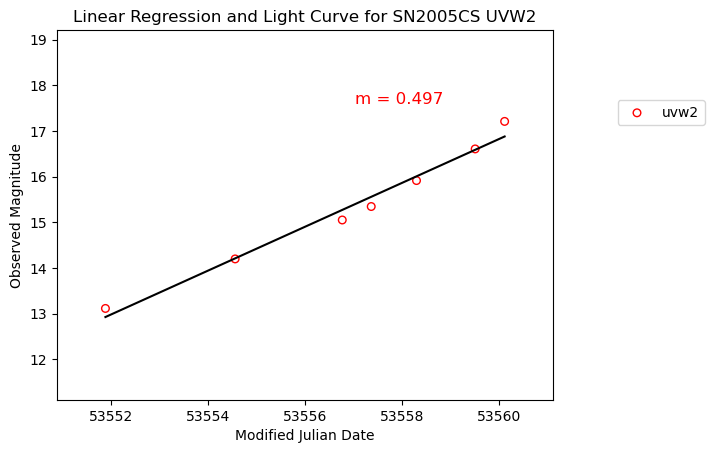

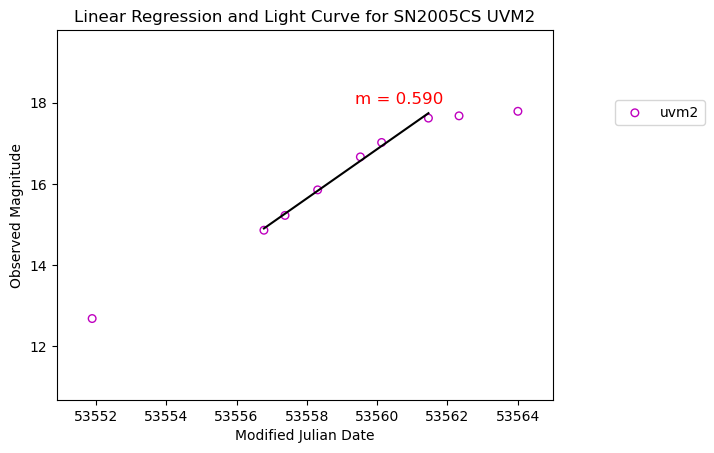

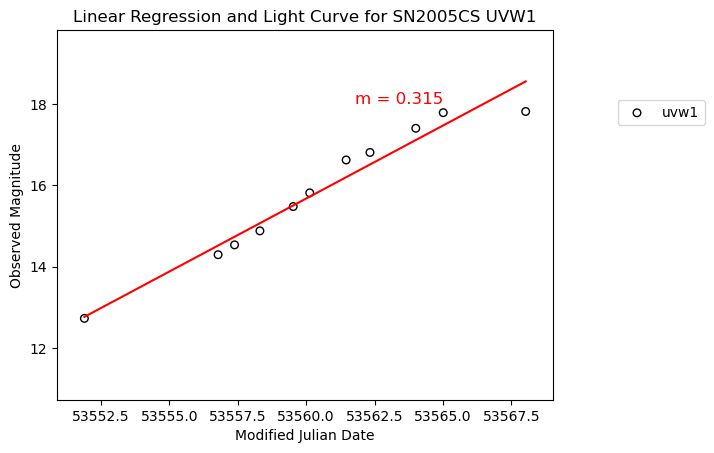

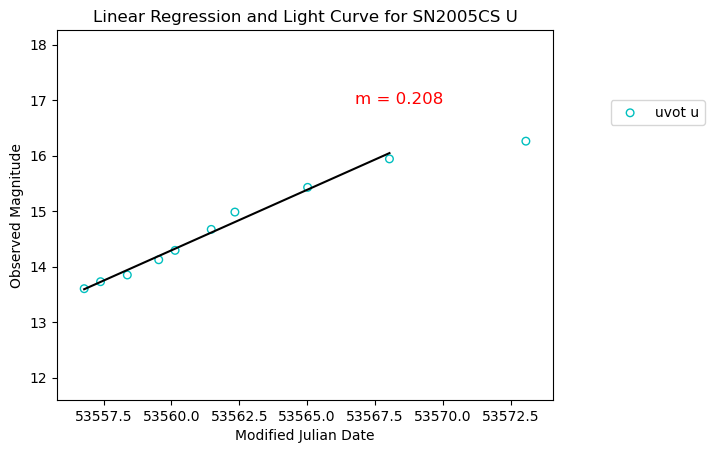

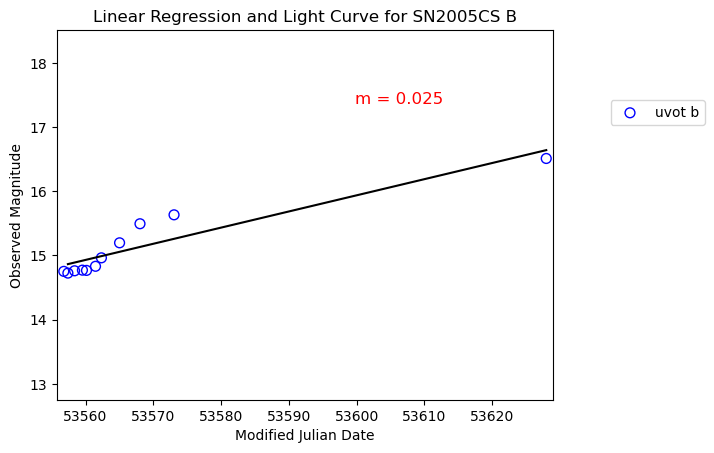

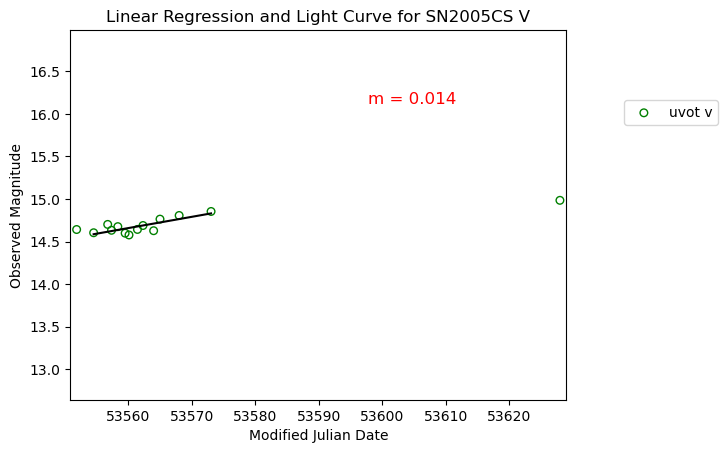

UVW2: 0.497
UVM2: 0.590
UVW1: 0.315
U: 0.208
B: 0.025
V: 0.014
Running fit for SN2006at.txt...
Trying to open: SN2006at.txt


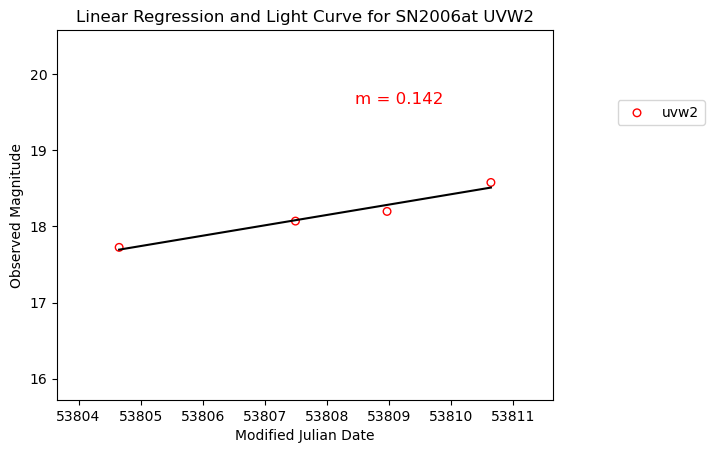

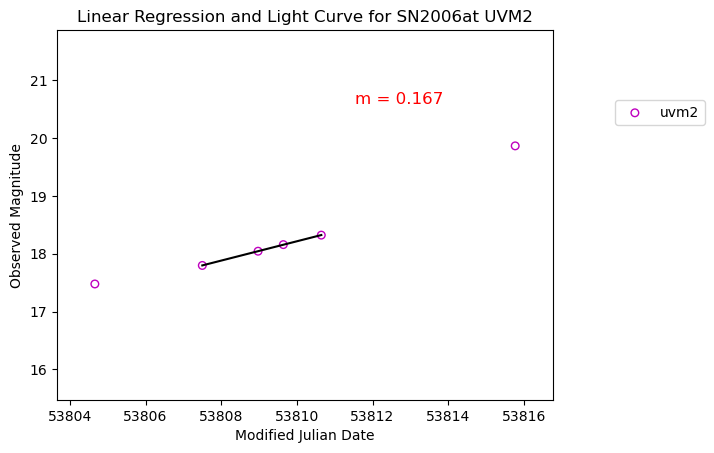

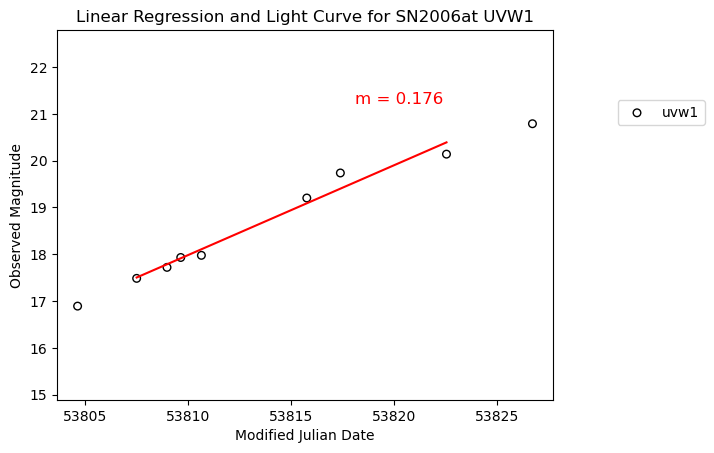

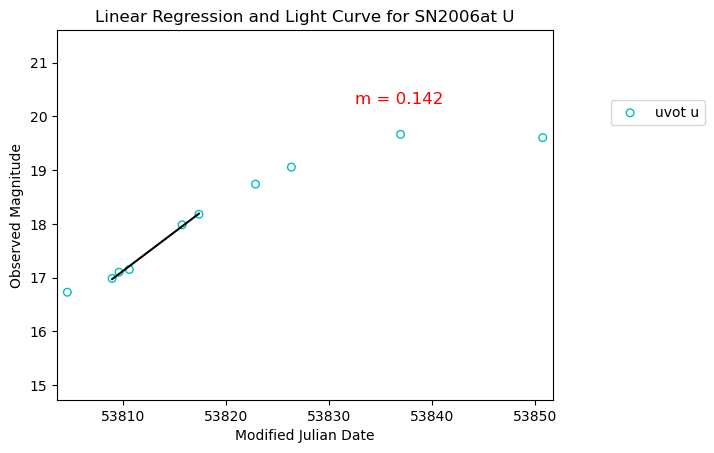

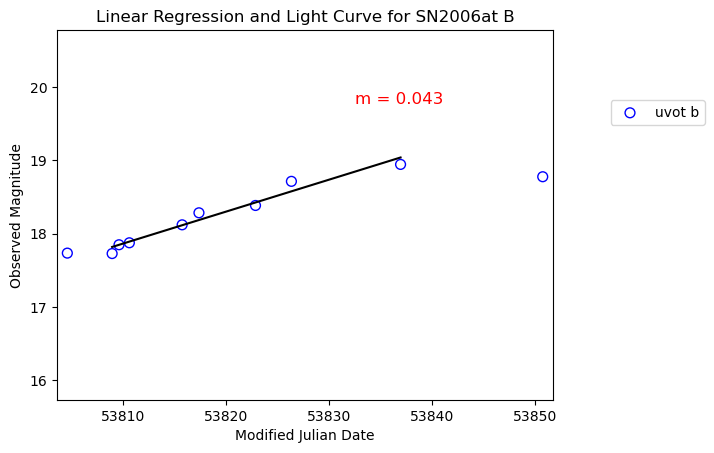

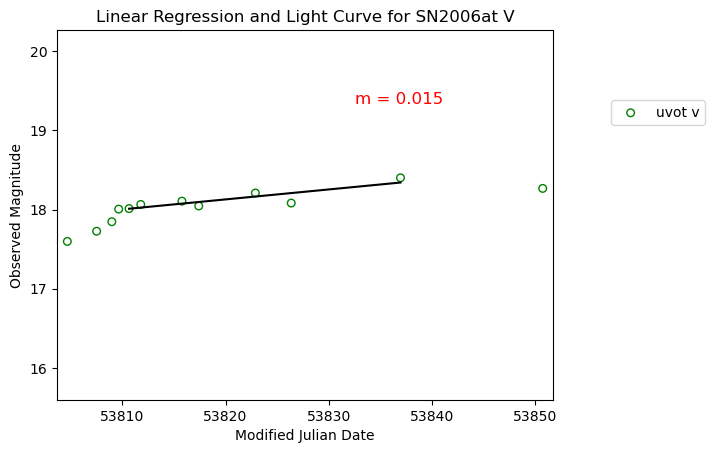

UVW2: 0.142
UVM2: 0.167
UVW1: 0.176
U: 0.142
B: 0.043
V: 0.015
Running fit for ASASSN-13co.txt...
Trying to open: ASASSN-13co.txt


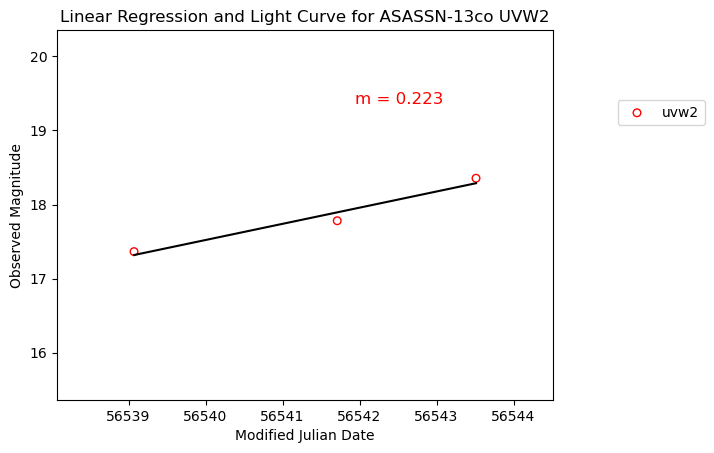

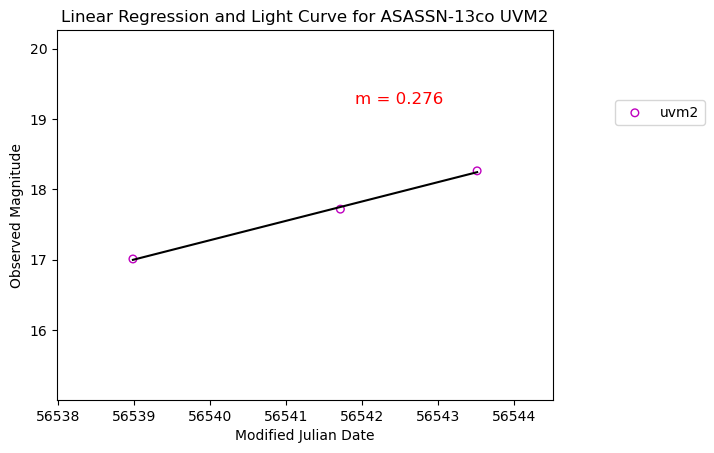

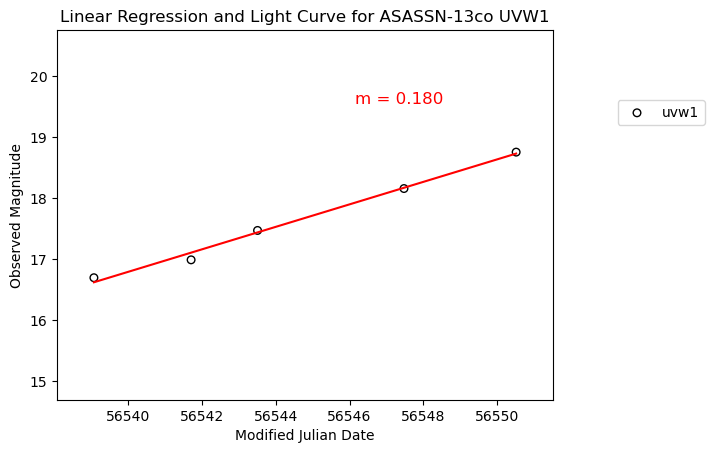

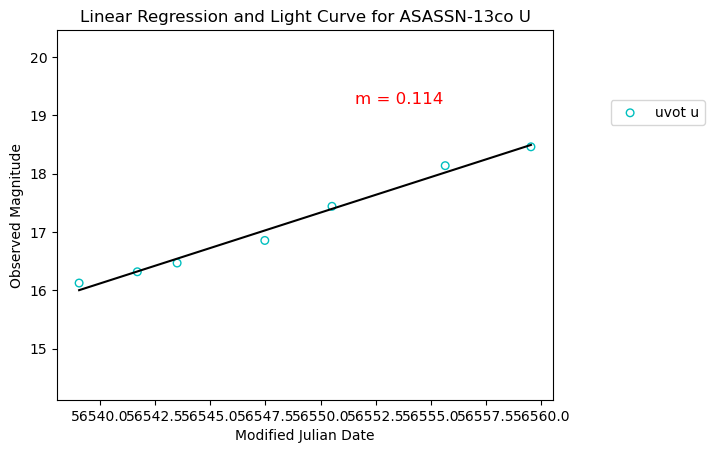

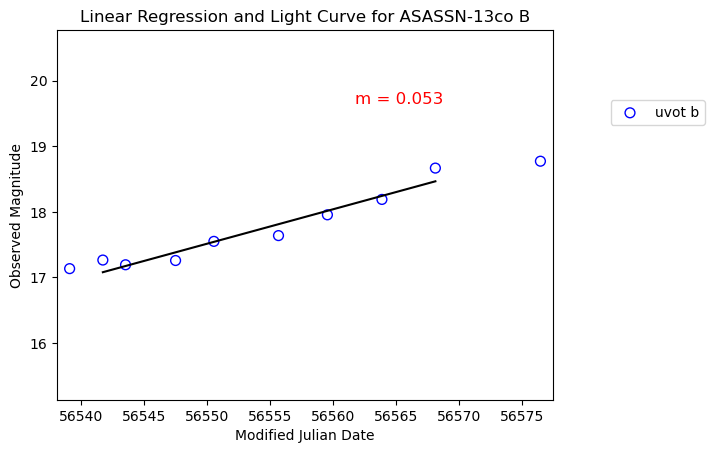

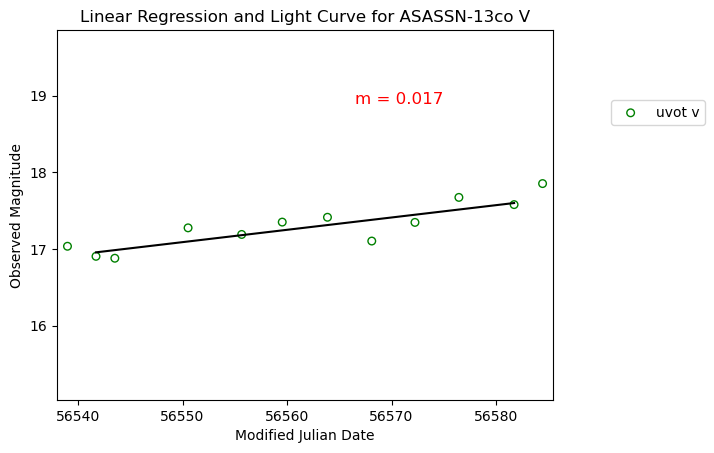

UVW2: 0.223
UVM2: 0.276
UVW1: 0.180
U: 0.114
B: 0.053
V: 0.017
Running fit for ASASSN-14ha.txt...
Trying to open: ASASSN-14ha.txt


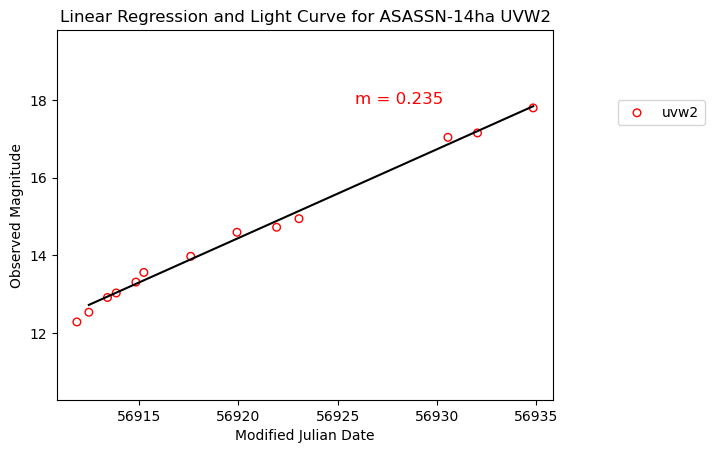

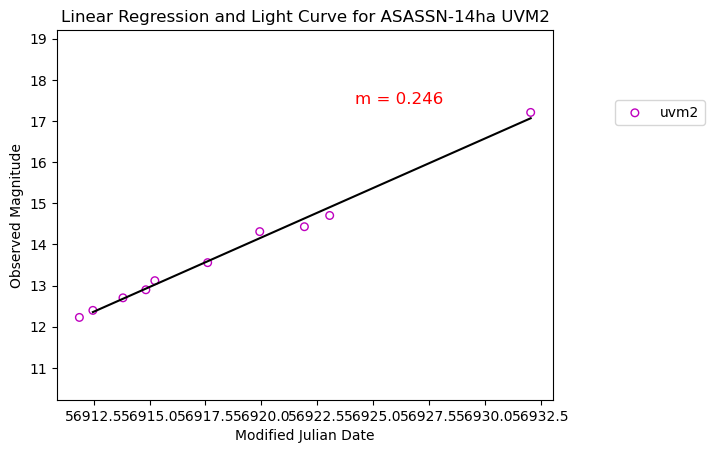

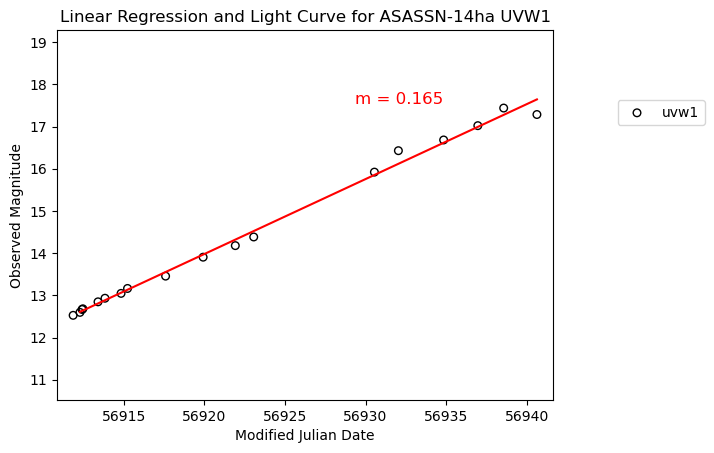

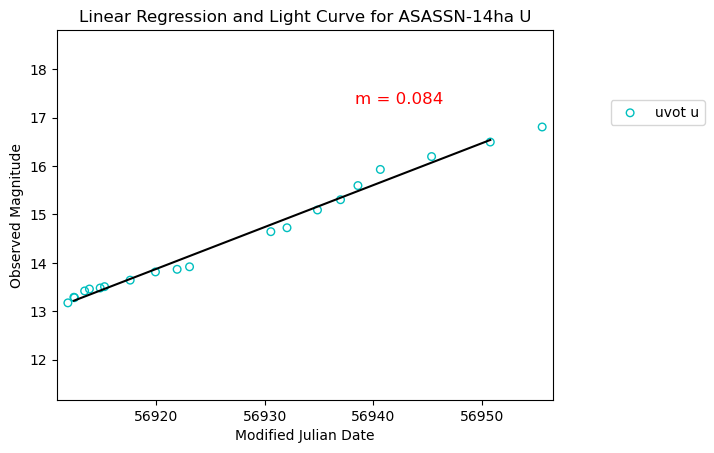

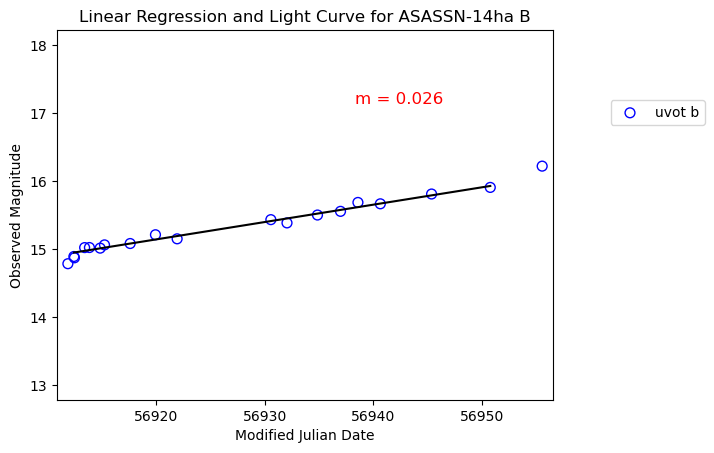

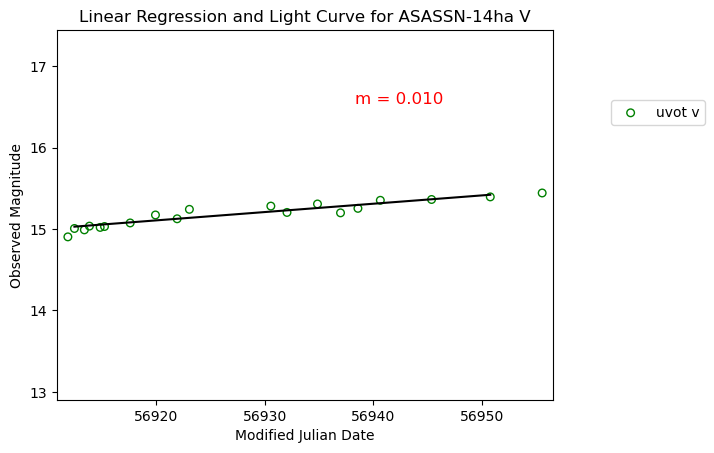

UVW2: 0.235
UVM2: 0.246
UVW1: 0.165
U: 0.084
B: 0.026
V: 0.010
Running fit for PTF11qax.txt...
Trying to open: PTF11qax.txt


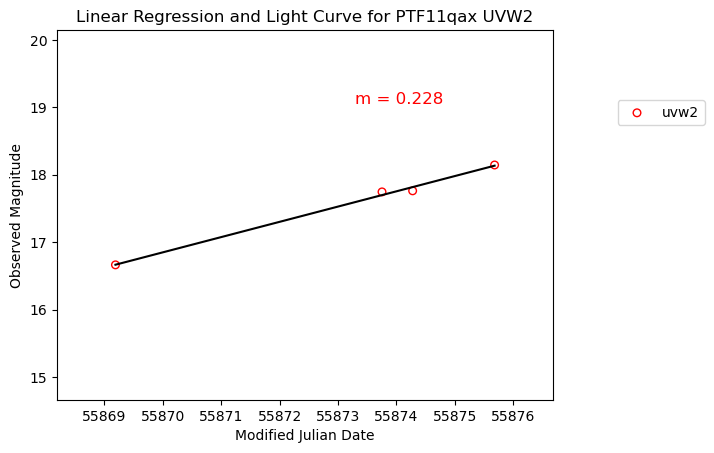

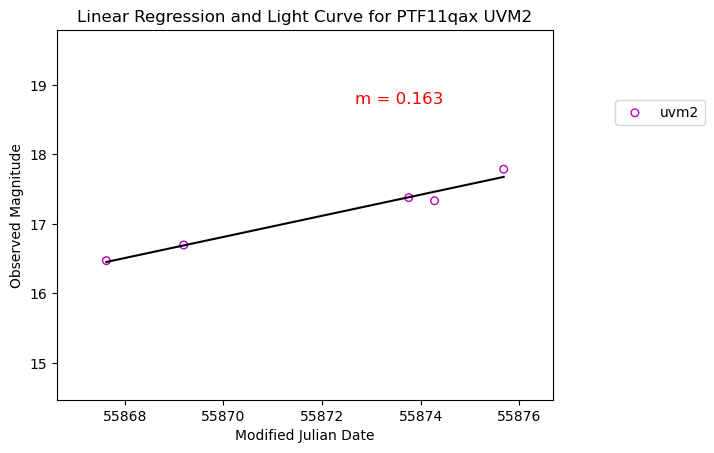

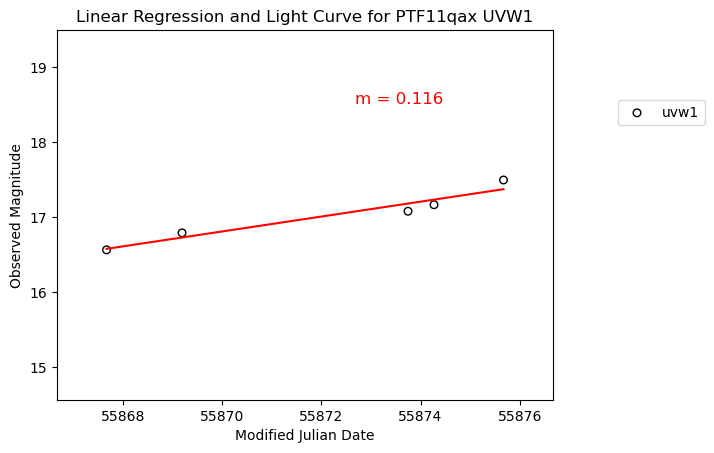

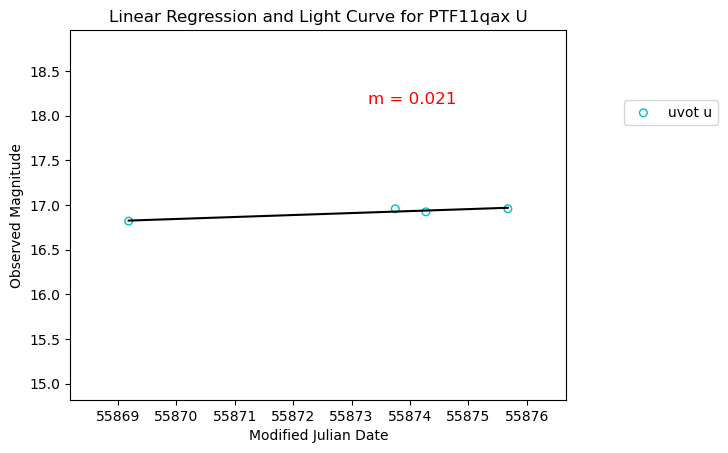

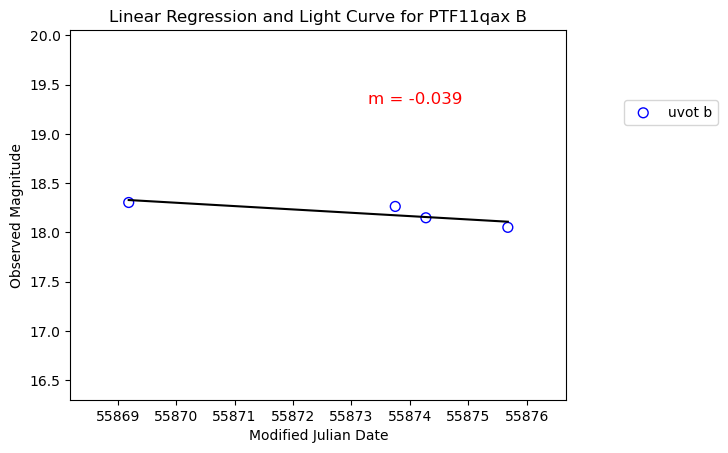

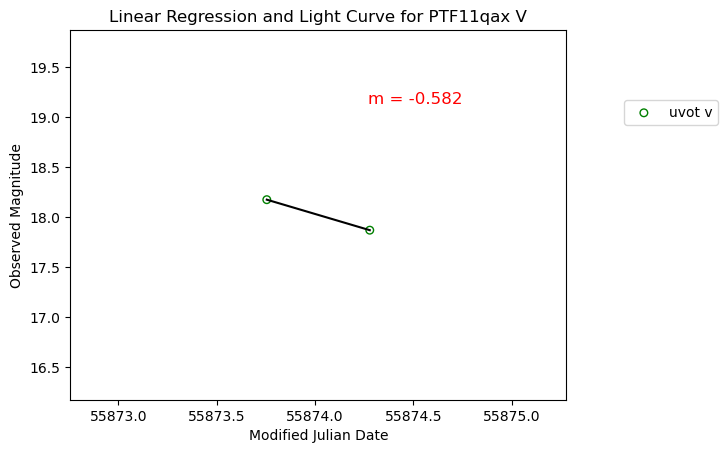

UVW2: 0.228
UVM2: 0.163
UVW1: 0.116
U: 0.021
B: -0.039
V: -0.582
Running fit for SN2006bc.txt...
Trying to open: SN2006bc.txt


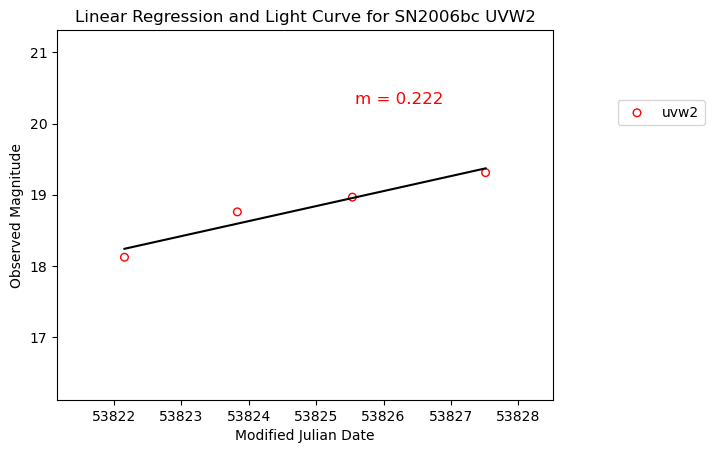

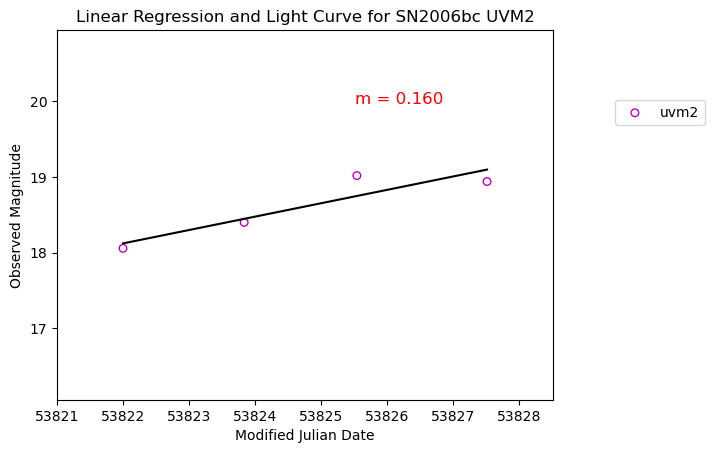

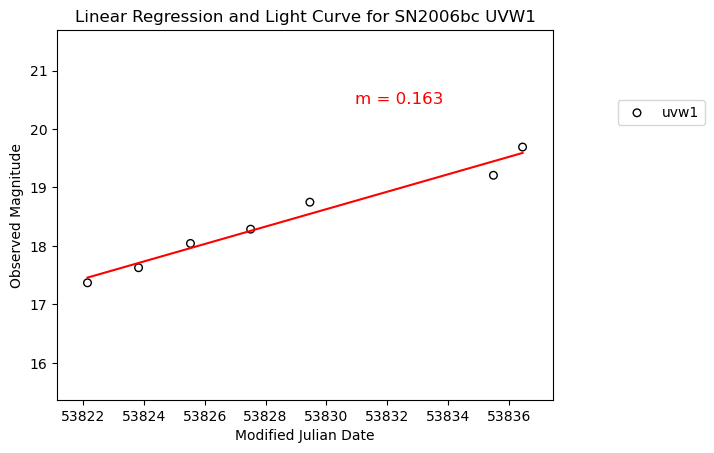

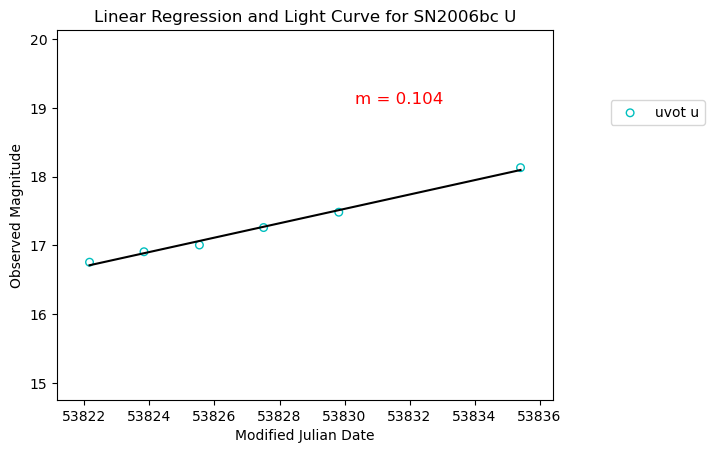

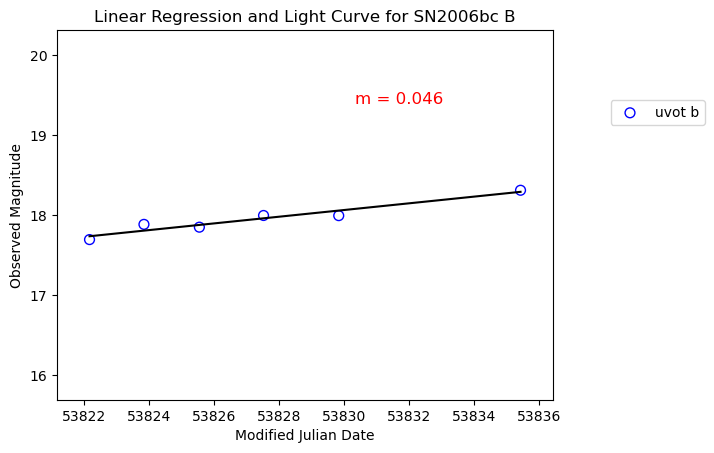

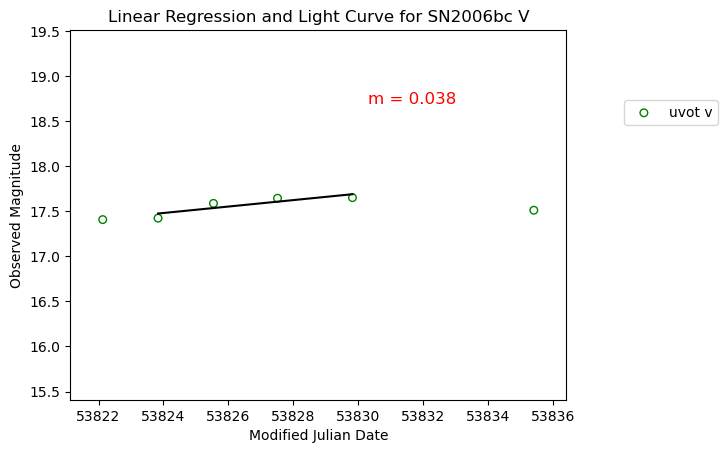

UVW2: 0.222
UVM2: 0.160
UVW1: 0.163
U: 0.104
B: 0.046
V: 0.038
Running fit for SN2007od.txt...
Trying to open: SN2007od.txt


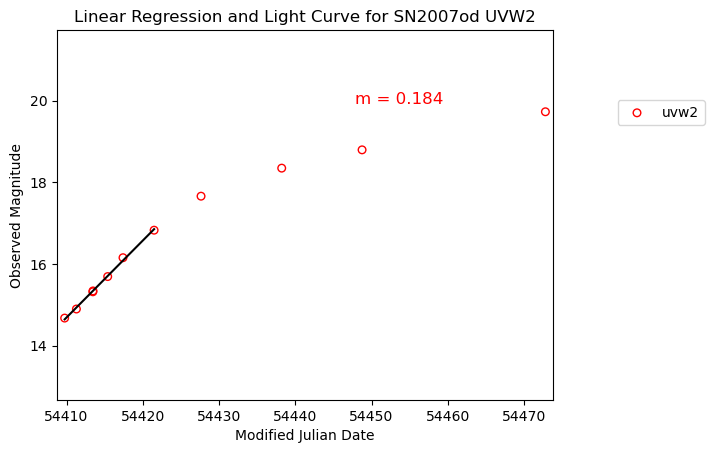

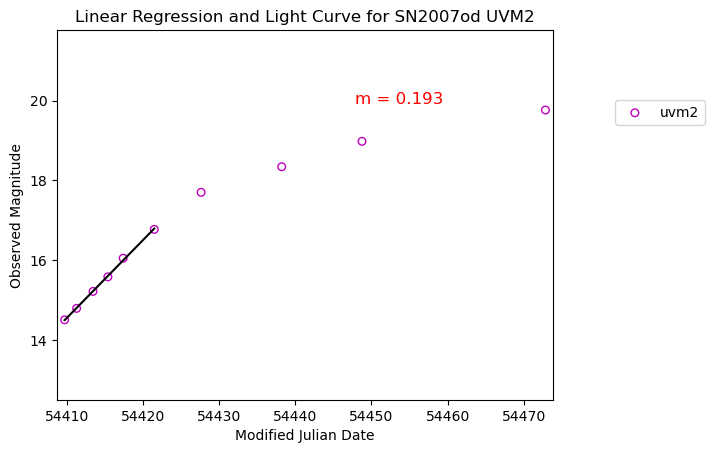

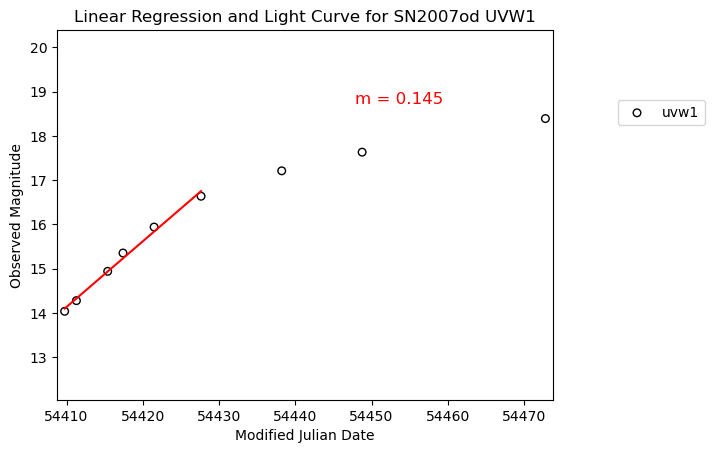

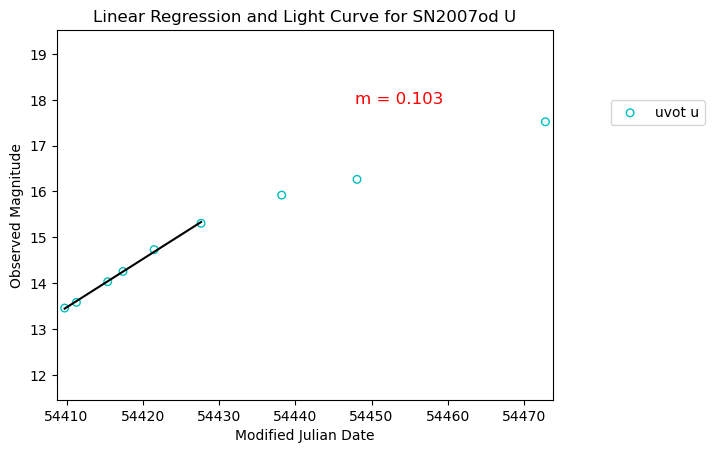

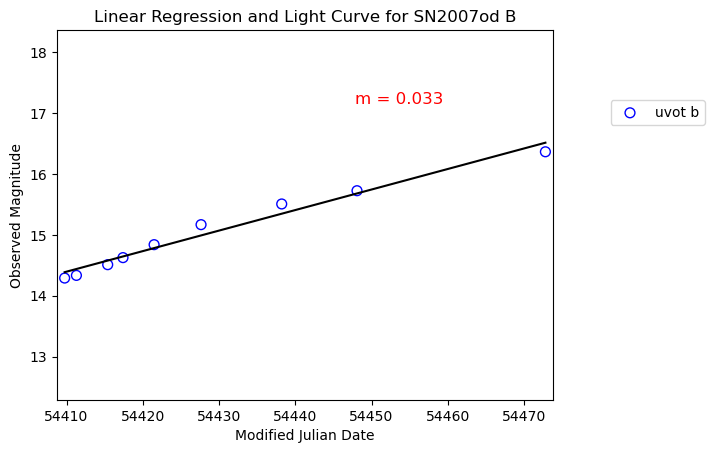

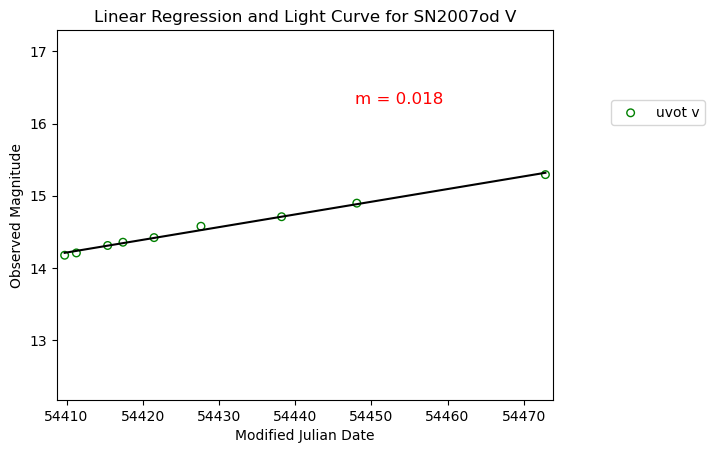

UVW2: 0.184
UVM2: 0.193
UVW1: 0.145
U: 0.103
B: 0.033
V: 0.018
Running fit for SN2008aw.txt...
Trying to open: SN2008aw.txt


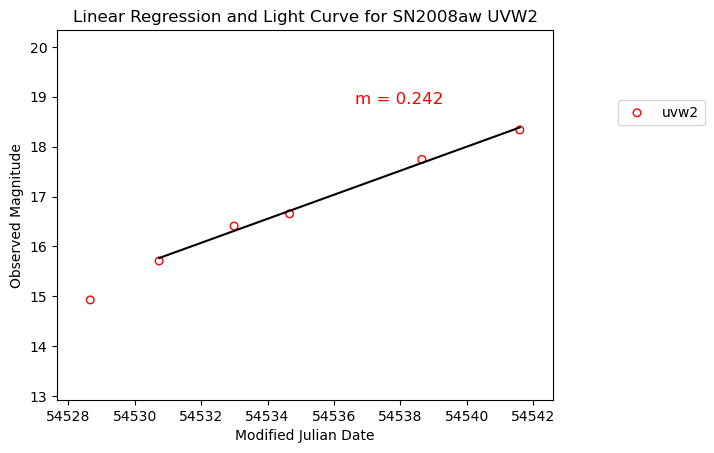

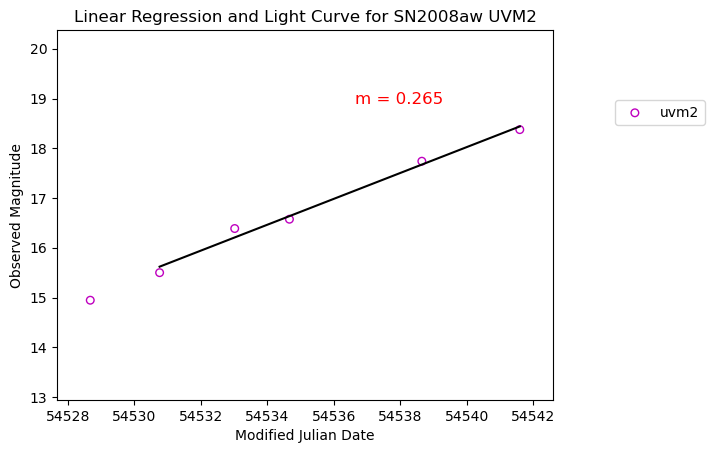

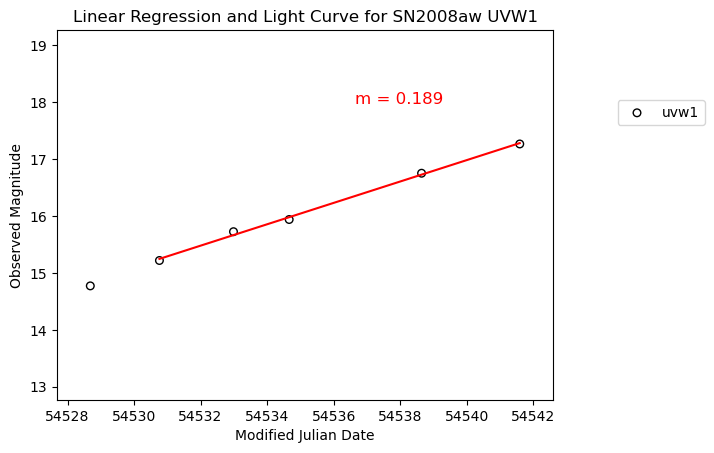

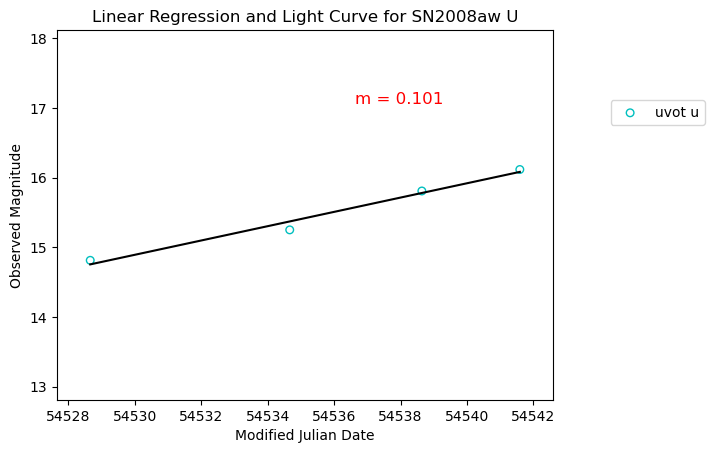

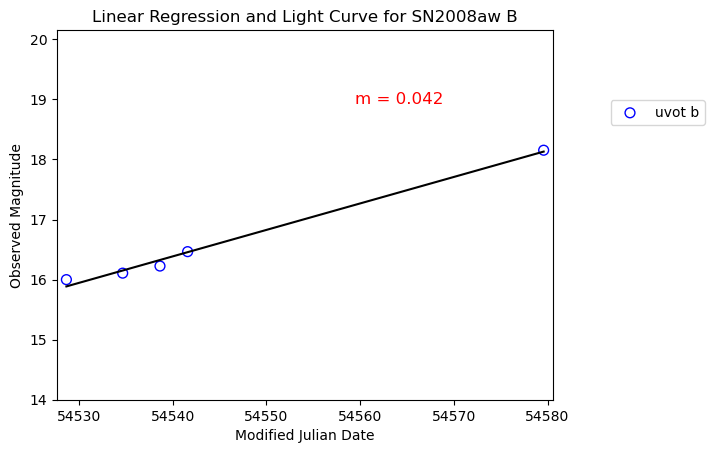

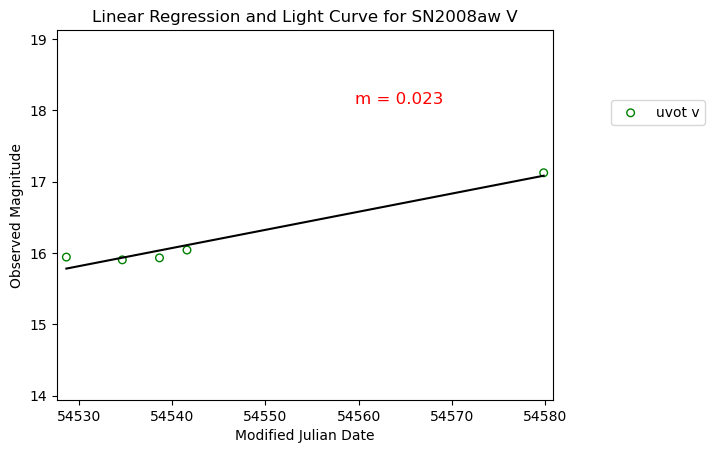

UVW2: 0.242
UVM2: 0.265
UVW1: 0.189
U: 0.101
B: 0.042
V: 0.023
Running fit for SN2008ij.txt...
Trying to open: SN2008ij.txt


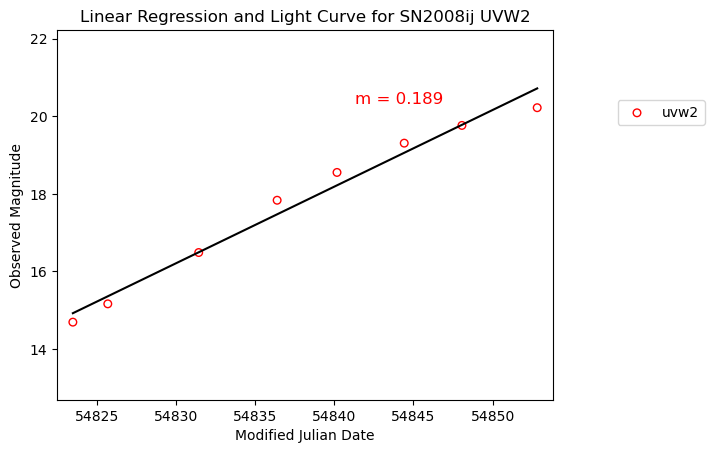

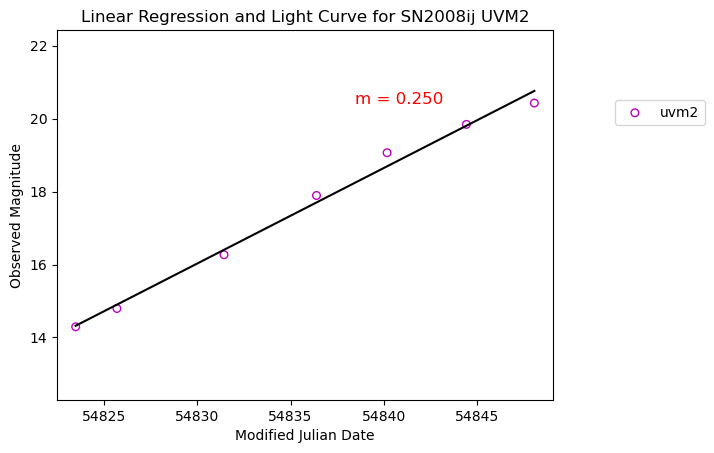

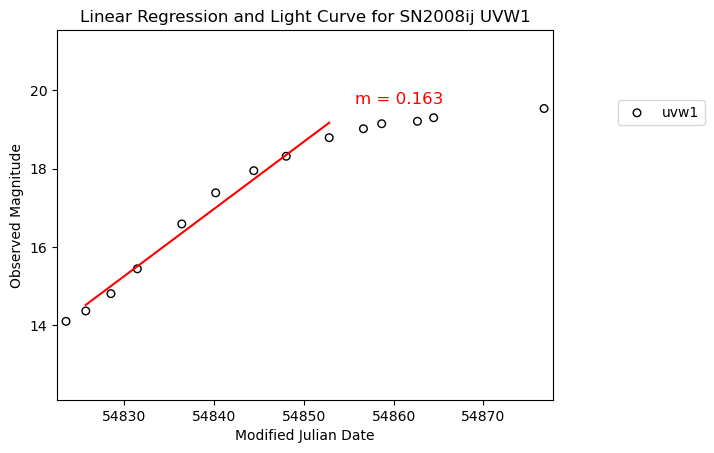

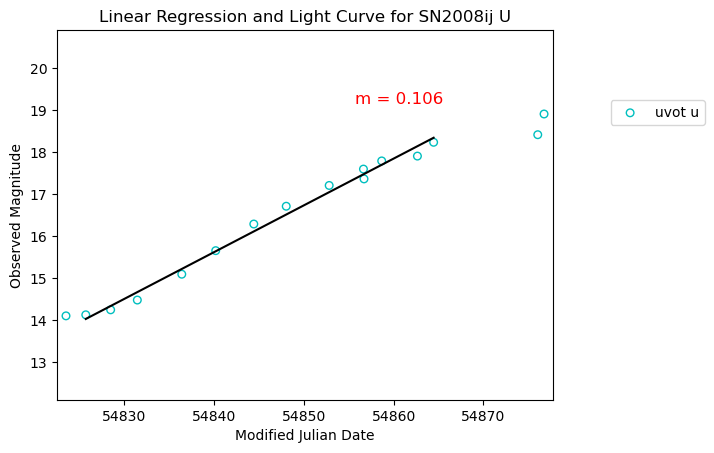

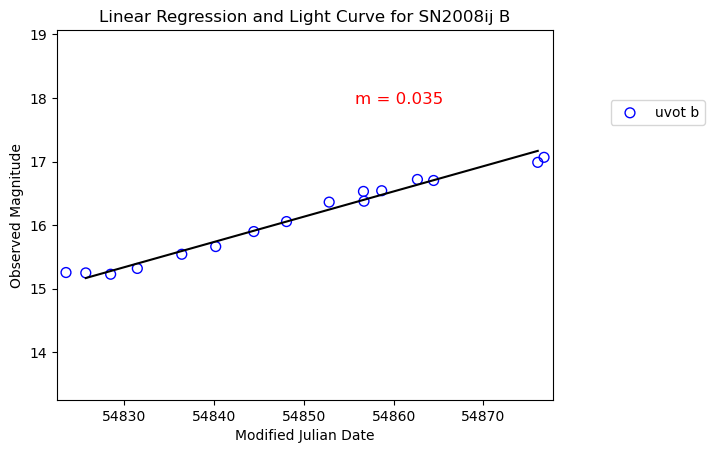

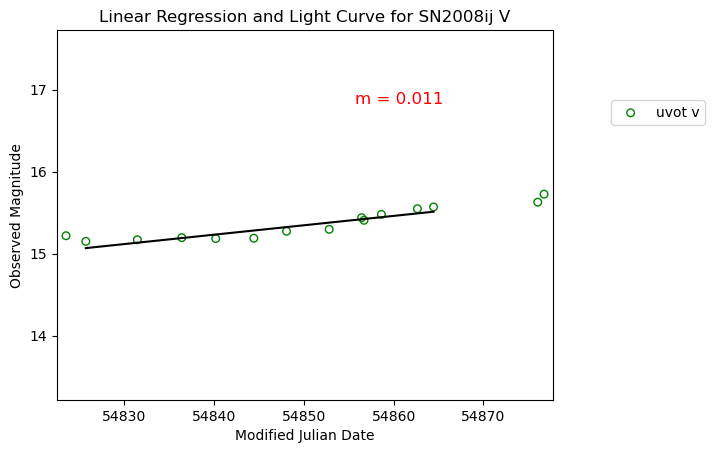

UVW2: 0.189
UVM2: 0.250
UVW1: 0.163
U: 0.106
B: 0.035
V: 0.011
Running fit for SN2008M.txt...
Trying to open: SN2008M.txt


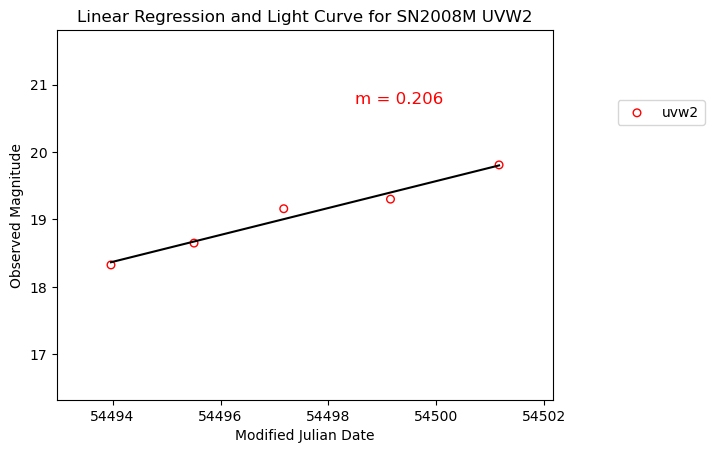

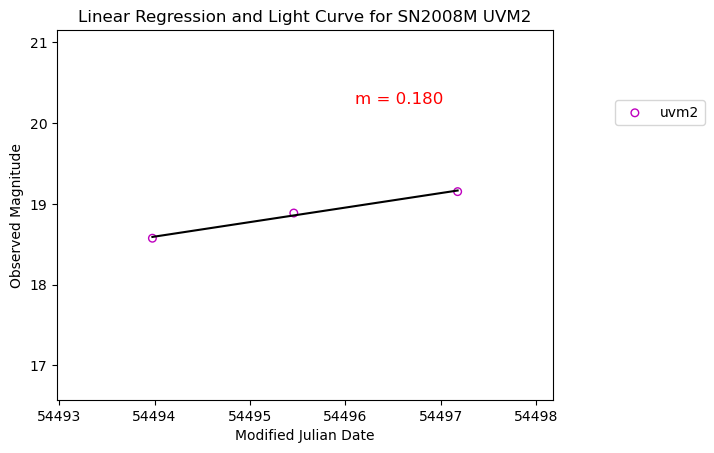

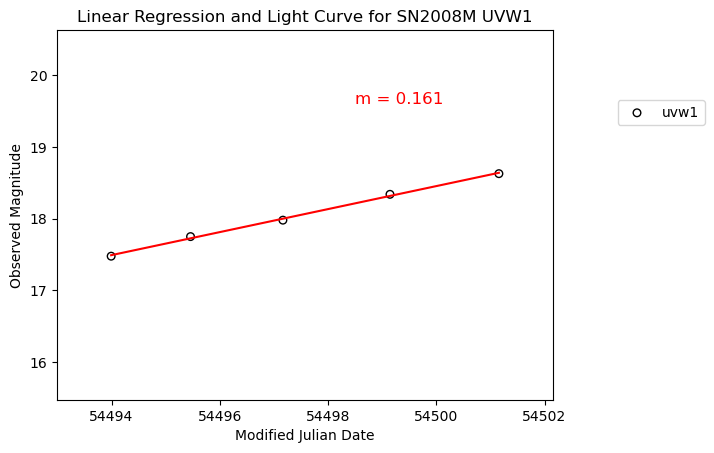

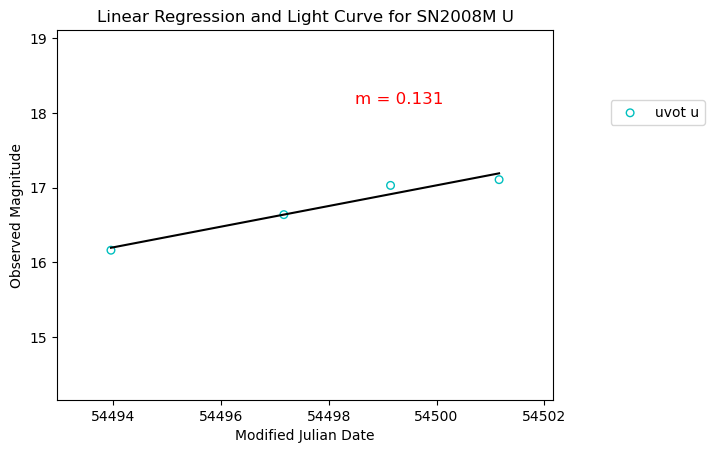

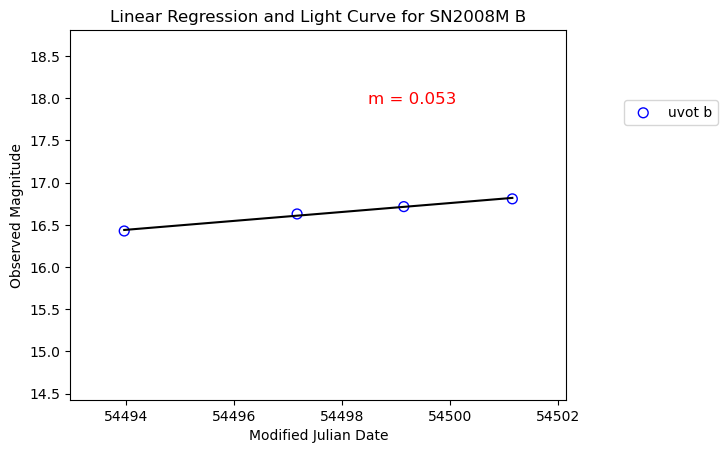

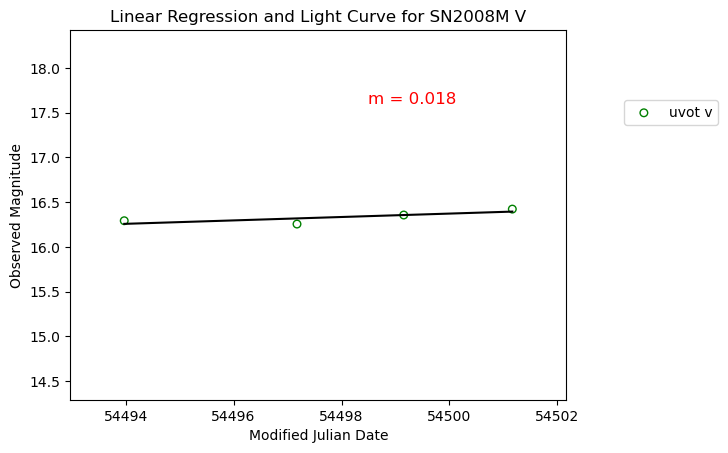

UVW2: 0.206
UVM2: 0.180
UVW1: 0.161
U: 0.131
B: 0.053
V: 0.018
Running fit for SN2009at.txt...
Trying to open: SN2009at.txt


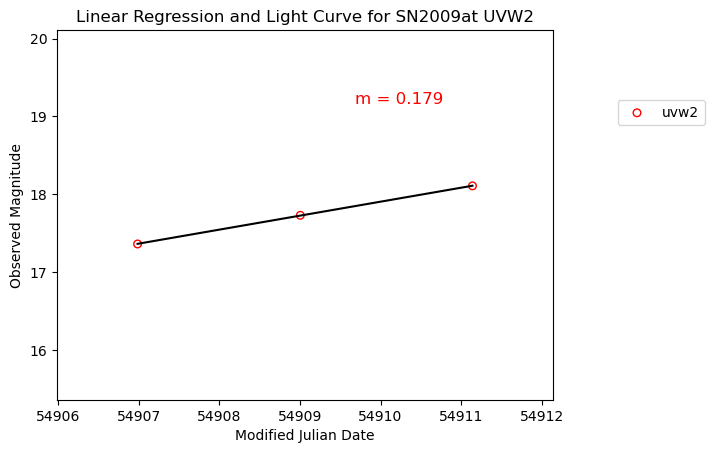

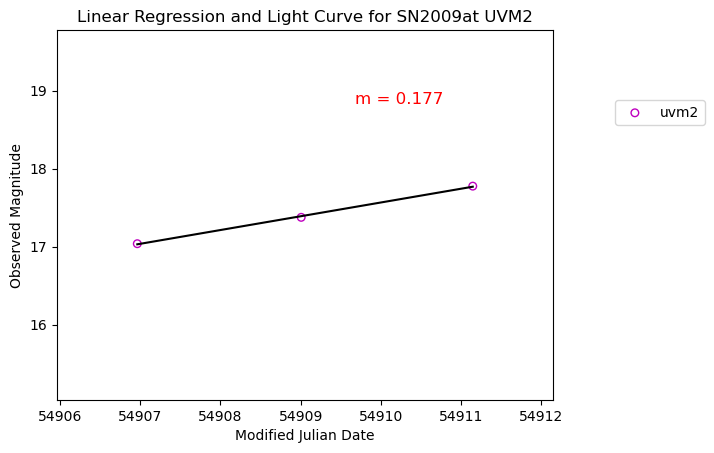

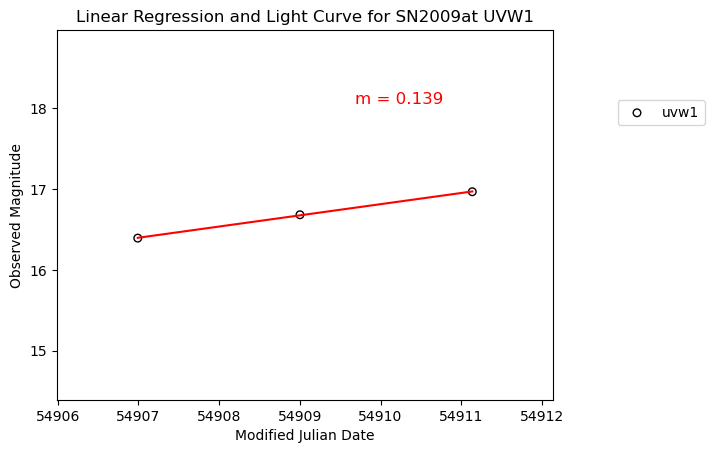

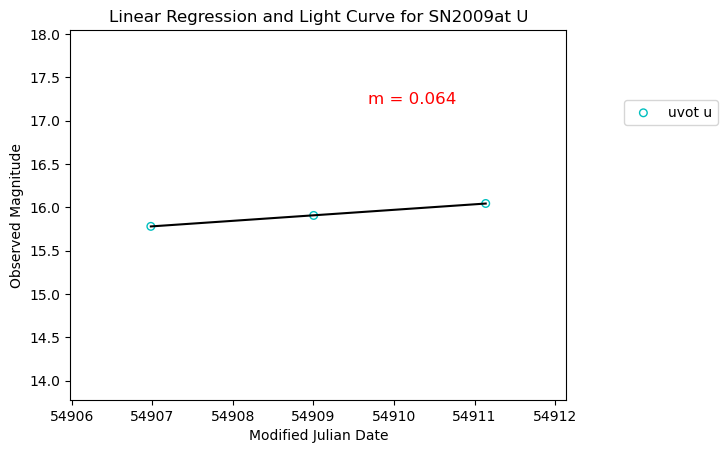

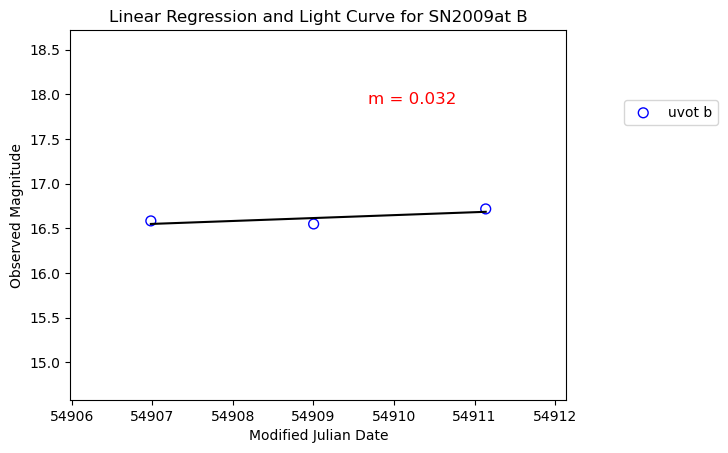

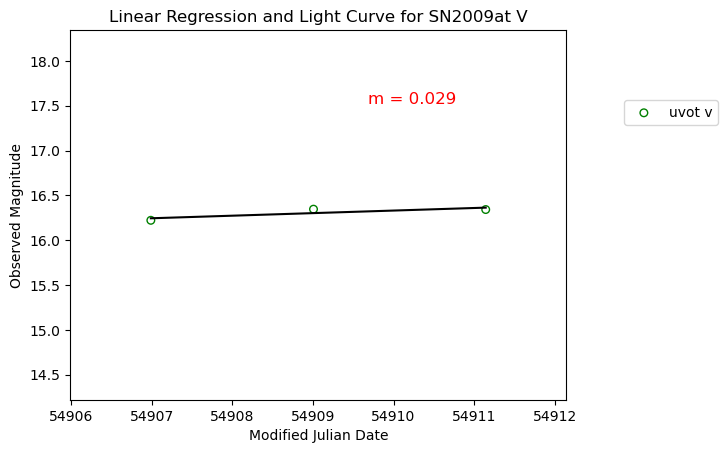

UVW2: 0.179
UVM2: 0.177
UVW1: 0.139
U: 0.064
B: 0.032
V: 0.029
Running fit for SN2009dd.txt...
Trying to open: SN2009dd.txt


C:\Users\Savannah Stratton\AppData\Local\Temp\ipykernel_7932\3736516747.py:112: RuntimeWarning: invalid value encountered in scalar divide
  M1 = (uvw2_mag_lr[-1]-uvw2_mag_lr[0])/(uvw2_mjd_lr[-1]-uvw2_mjd_lr[0]) #getting the slope of uvw2 LR line


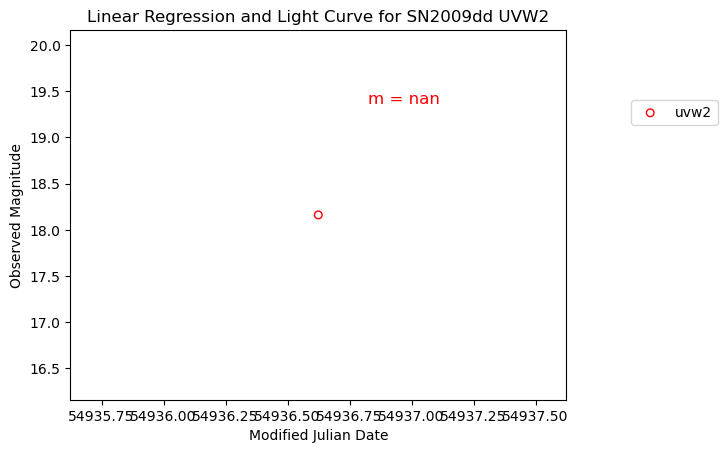

C:\Users\Savannah Stratton\AppData\Local\Temp\ipykernel_7932\3736516747.py:151: RuntimeWarning: invalid value encountered in scalar divide
  M2 = (uvm2_mag_lr[-1] - uvm2_mag_lr[0])/(uvm2_mjd_lr[-1] - uvm2_mjd_lr[0])


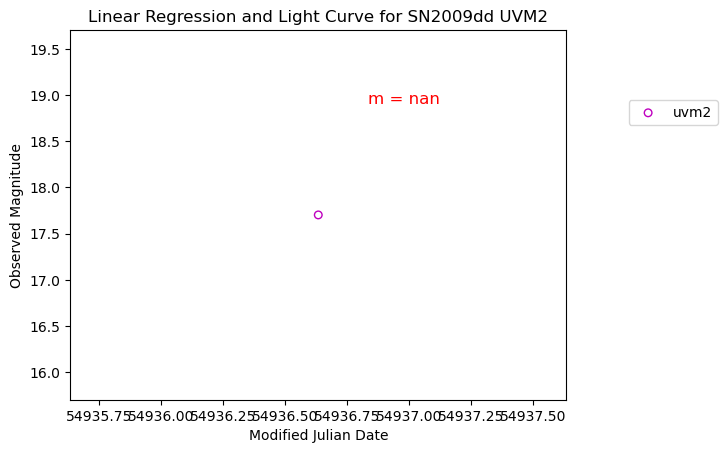

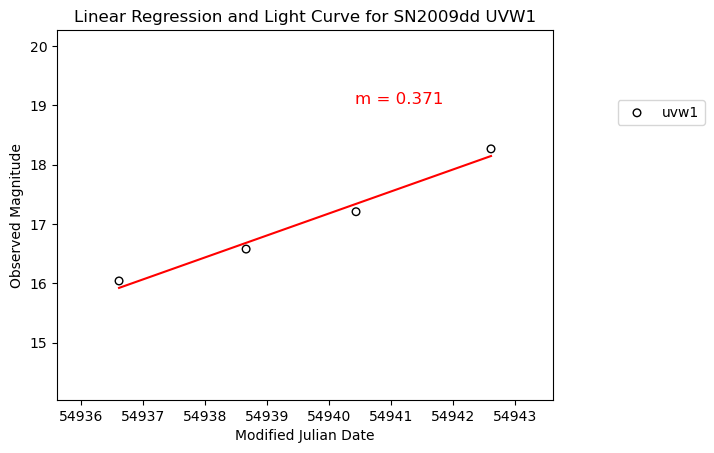

Failed on SN2009dd.txt: Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required by LinearRegression.
Running fit for SN2010F.txt...
Trying to open: SN2010F.txt


Traceback (most recent call last):
  File "C:\Users\Savannah Stratton\run_from_csv.py", line 29, in run_all_fits
    new_LinearR(
  File "C:\Users\Savannah Stratton\AppData\Local\Temp\ipykernel_7932\3736516747.py", line 230, in new_LinearR
    linear_regressor.fit(x3,y3)
  File "C:\Users\Savannah Stratton\anaconda3\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Savannah Stratton\anaconda3\Lib\site-packages\sklearn\linear_model\_base.py", line 609, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Savannah Stratton\anaconda3\Lib\site-packages\sklearn\base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Savannah Stratton\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 1301, in check_X_y
    X = check_array(
        ^^^^^^^^

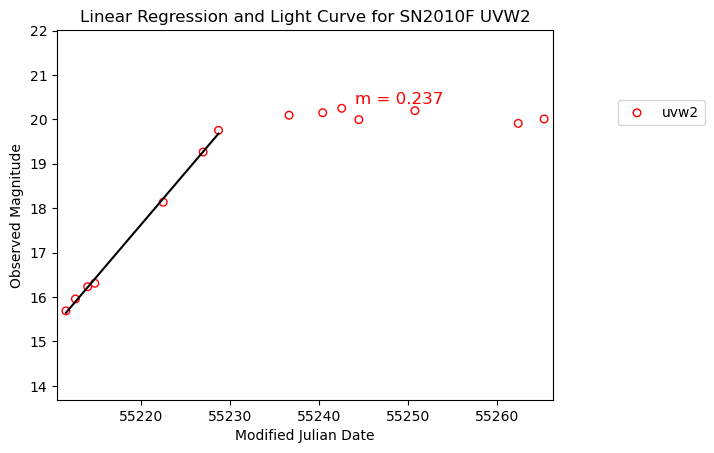

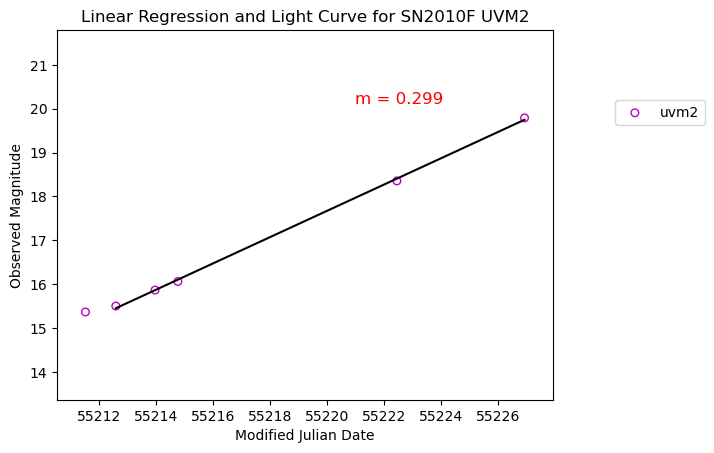

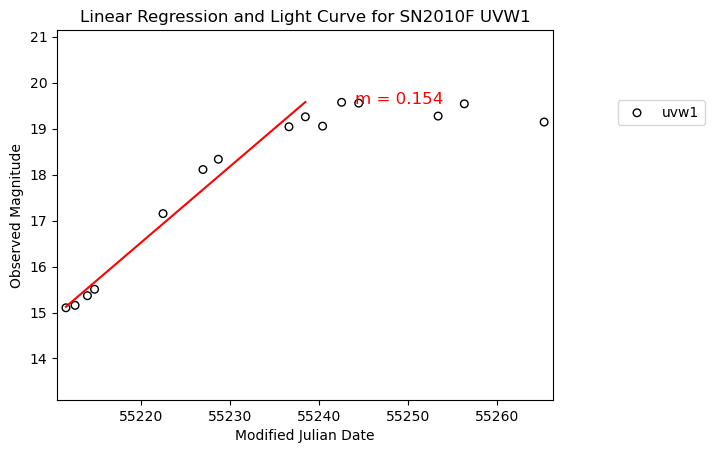

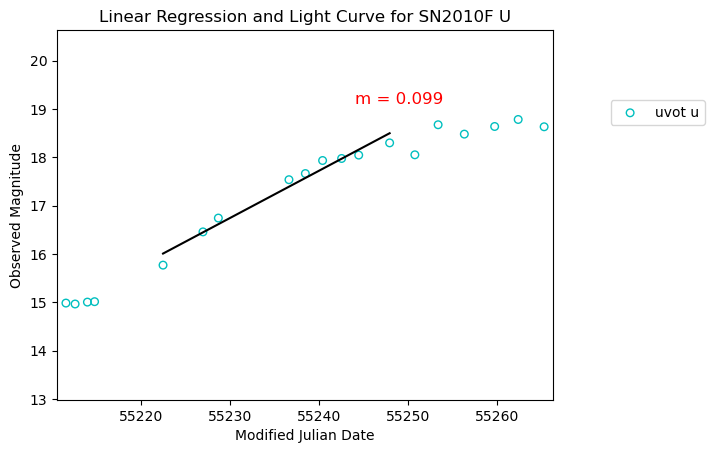

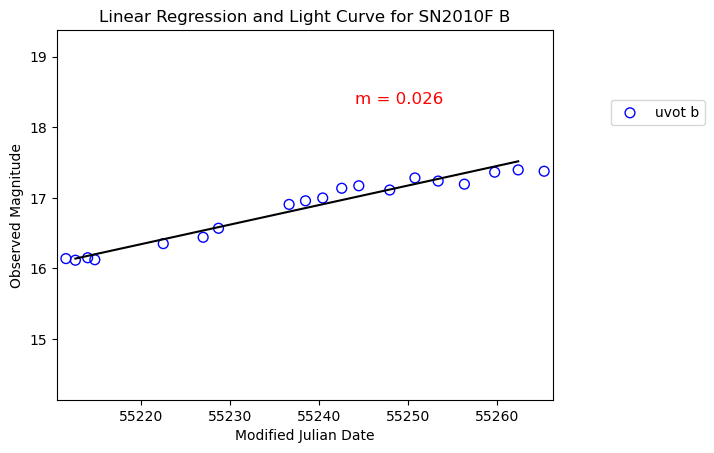

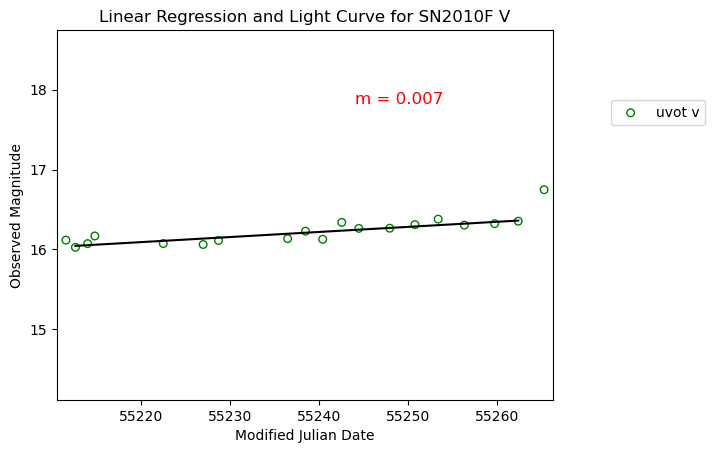

UVW2: 0.237
UVM2: 0.299
UVW1: 0.154
U: 0.099
B: 0.026
V: 0.007
Running fit for SN2012A.txt...
Trying to open: SN2012A.txt


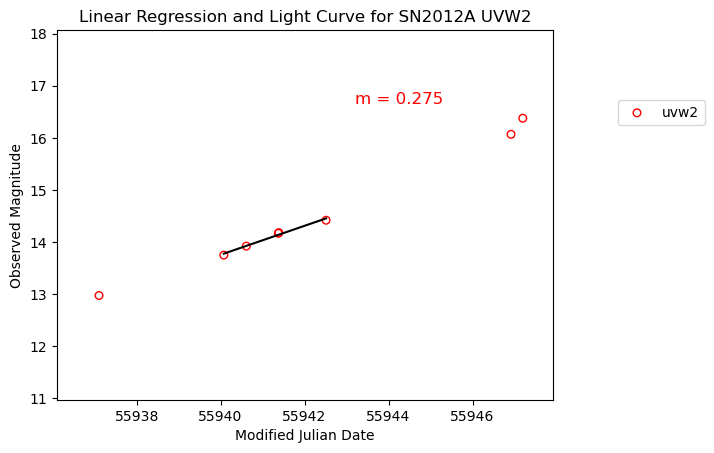

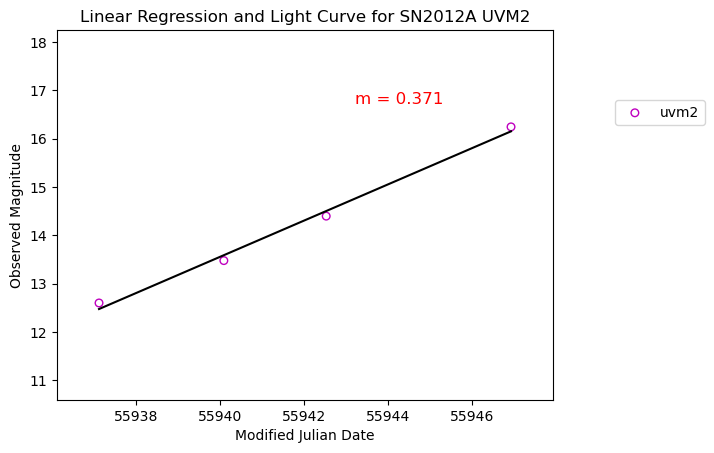

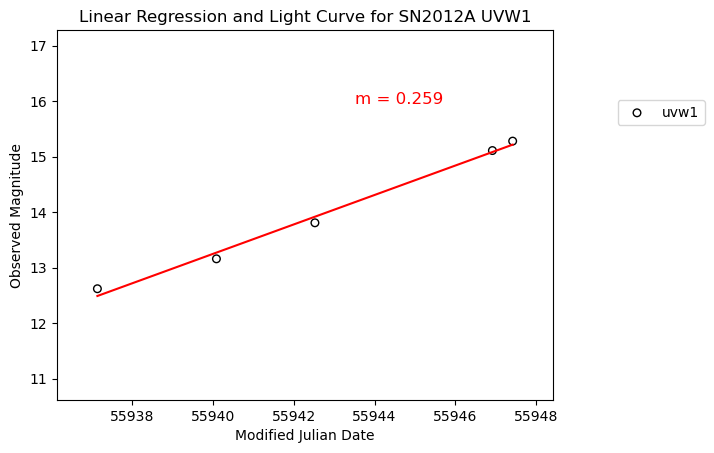

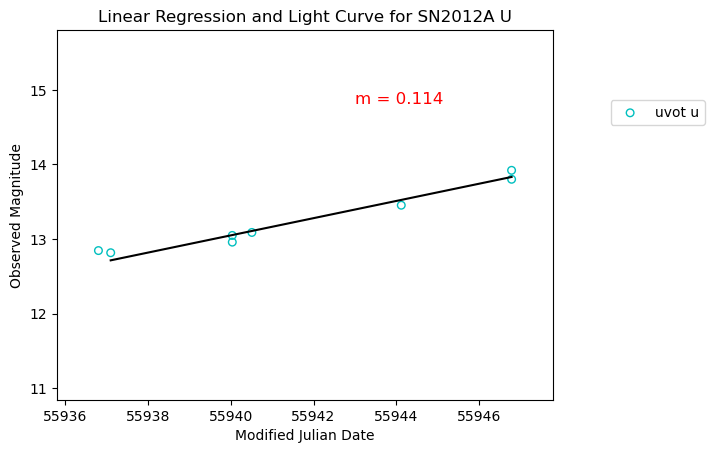

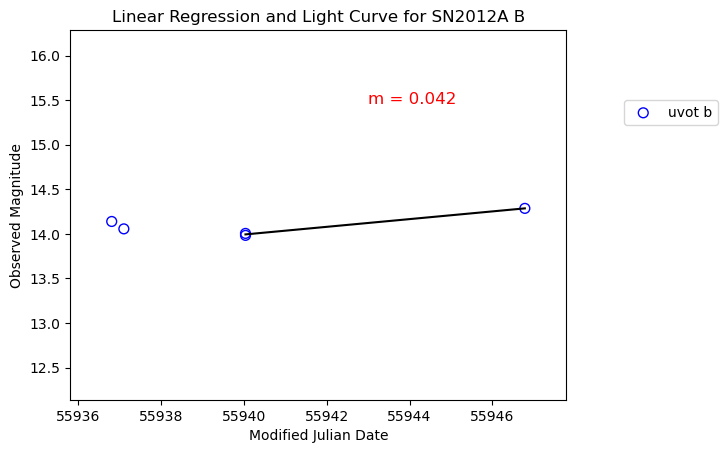

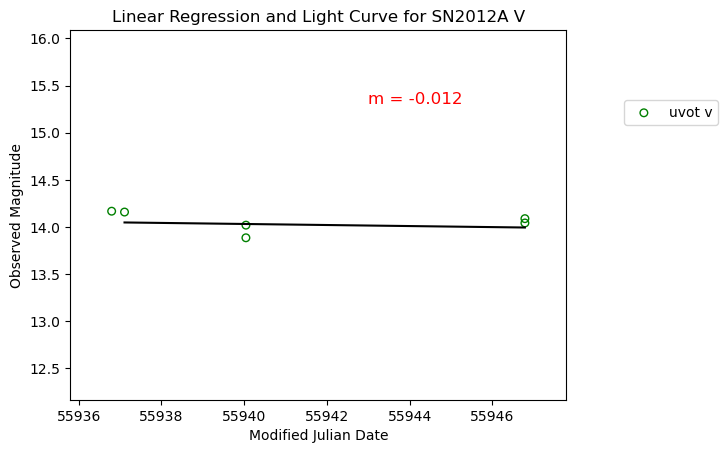

UVW2: 0.275
UVM2: 0.371
UVW1: 0.259
U: 0.114
B: 0.042
V: -0.012
Running fit for SN2013ak.txt...
Trying to open: SN2013ak.txt


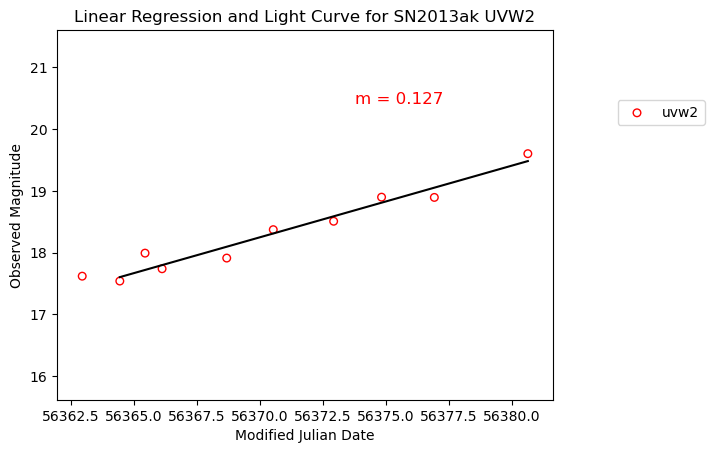

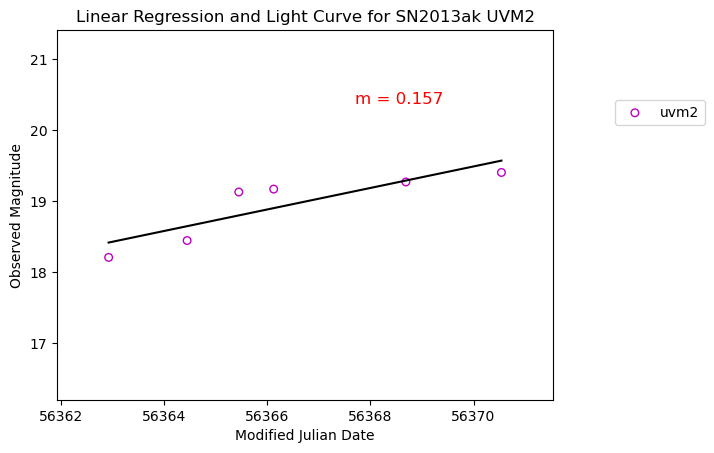

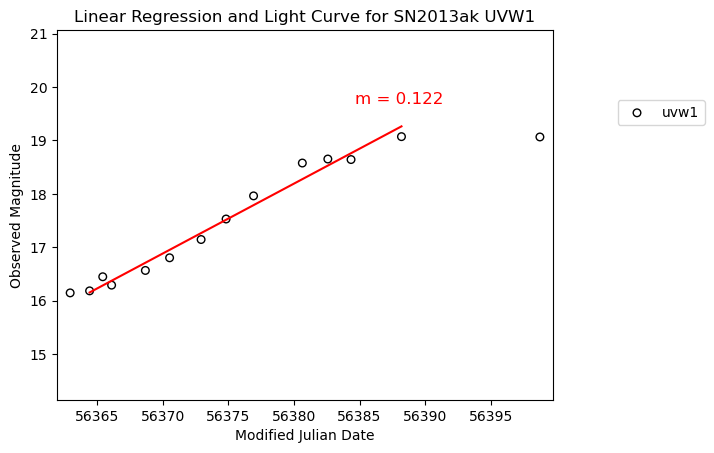

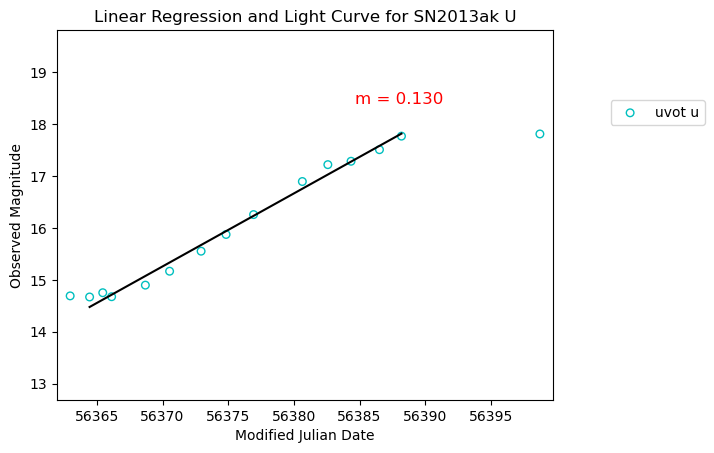

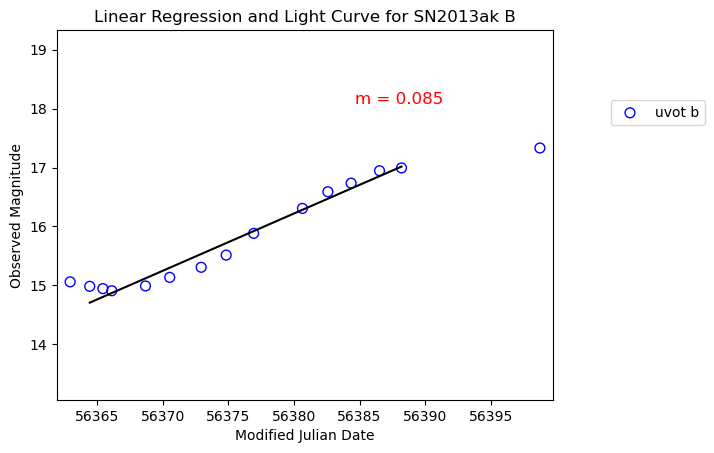

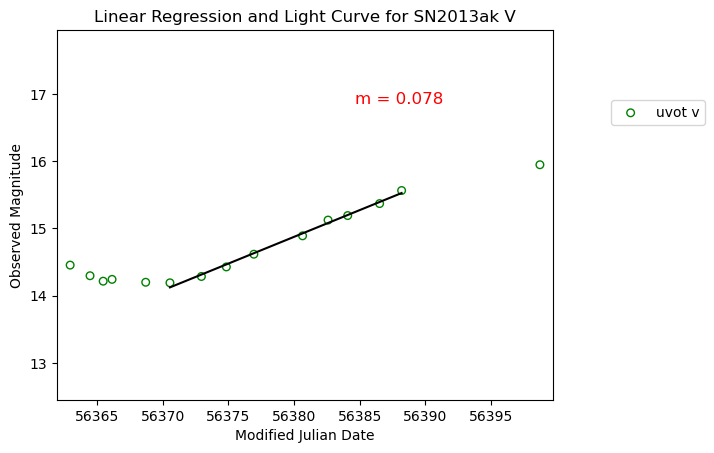

UVW2: 0.127
UVM2: 0.157
UVW1: 0.122
U: 0.130
B: 0.085
V: 0.078
Running fit for SN2013am.txt...
Trying to open: SN2013am.txt


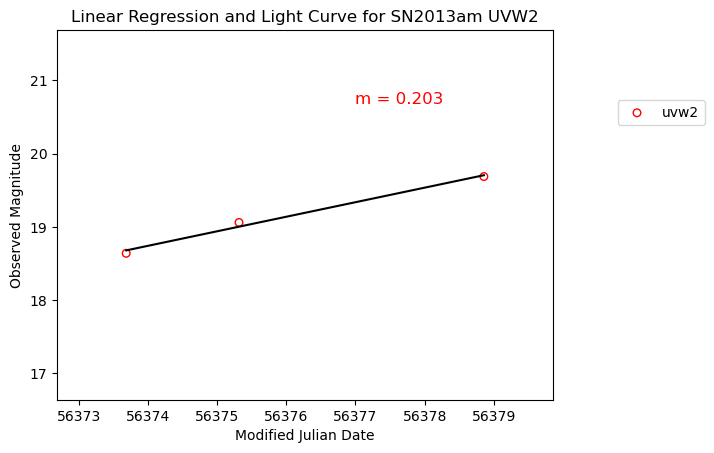

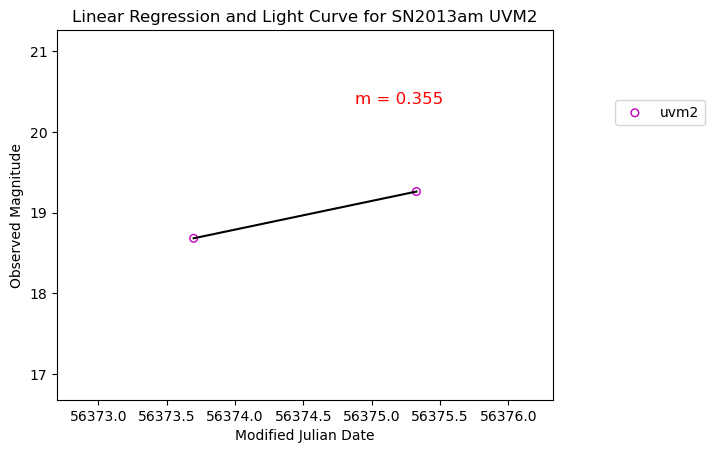

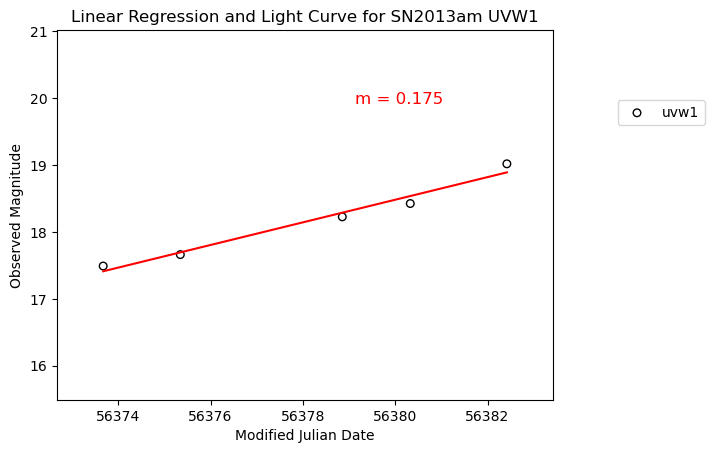

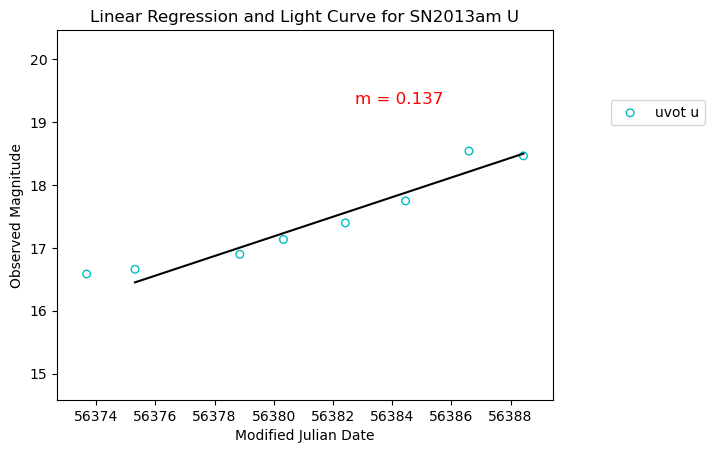

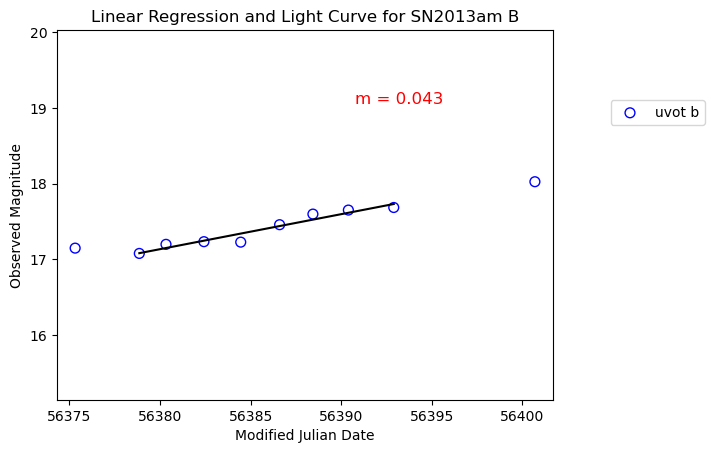

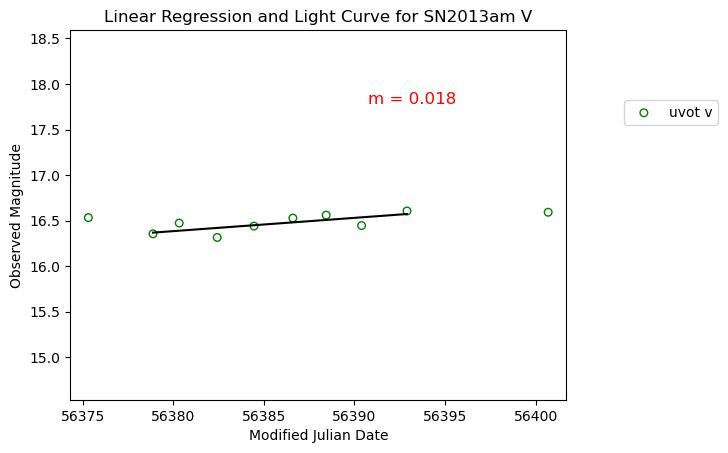

UVW2: 0.203
UVM2: 0.355
UVW1: 0.175
U: 0.137
B: 0.043
V: 0.018
Running fit for SN2013df.txt...
Trying to open: SN2013df.txt


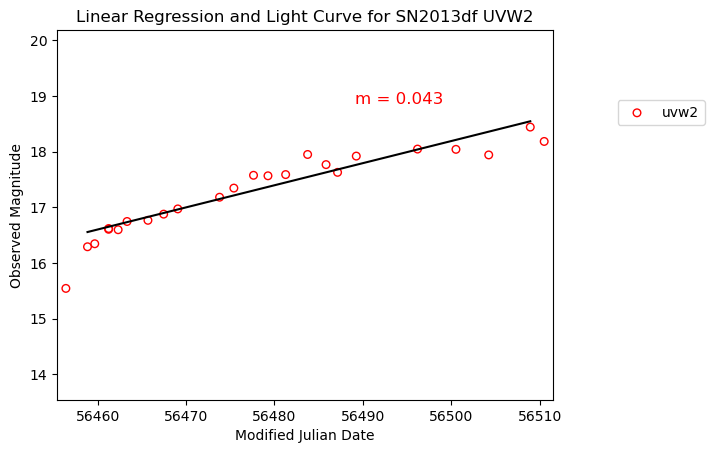

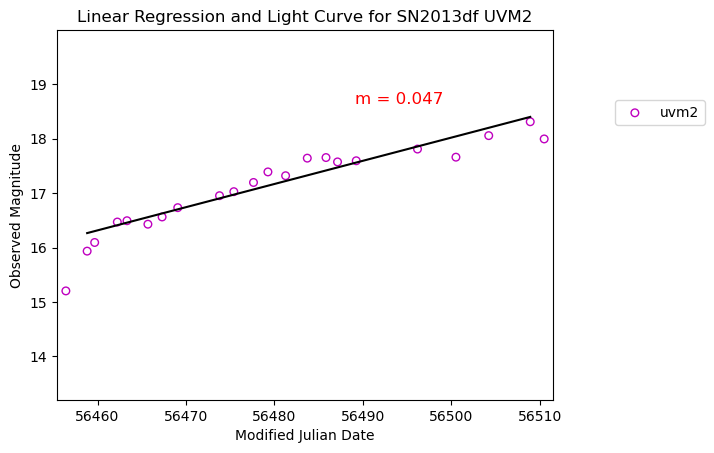

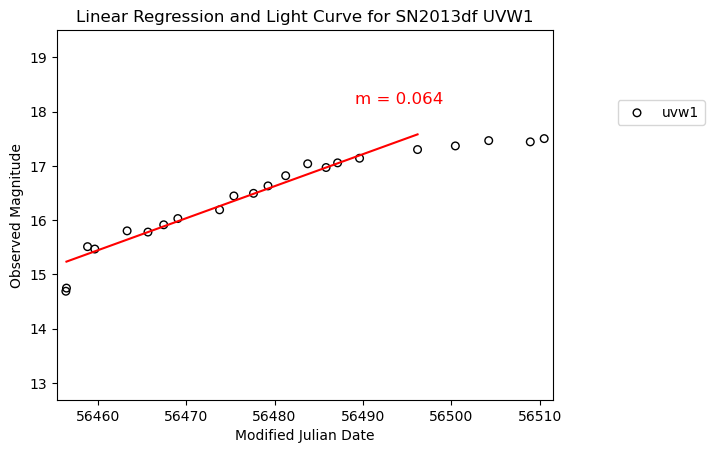

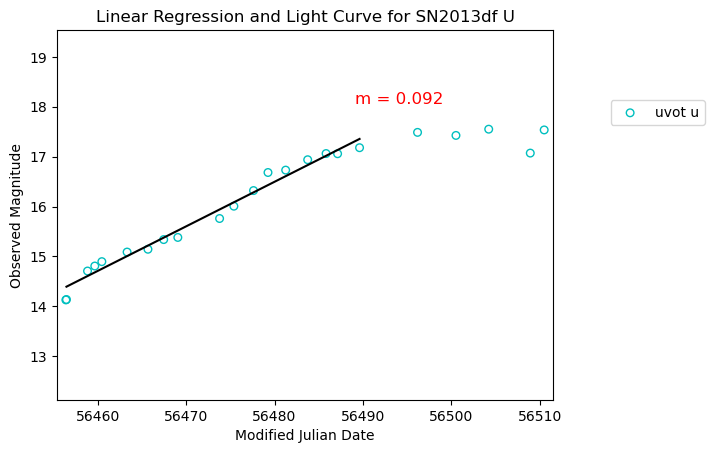

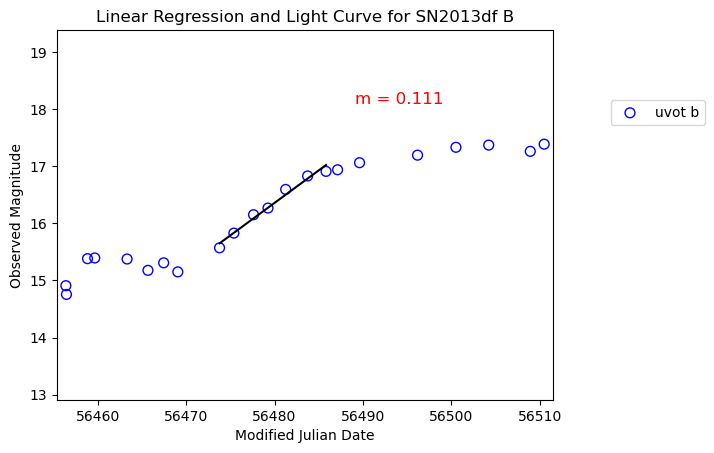

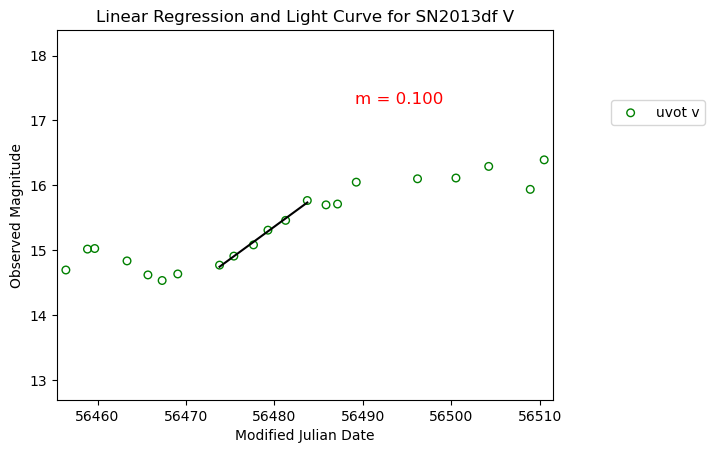

UVW2: 0.043
UVM2: 0.047
UVW1: 0.064
U: 0.092
B: 0.111
V: 0.100
Running fit for SN2013ej.txt...
Trying to open: SN2013ej.txt


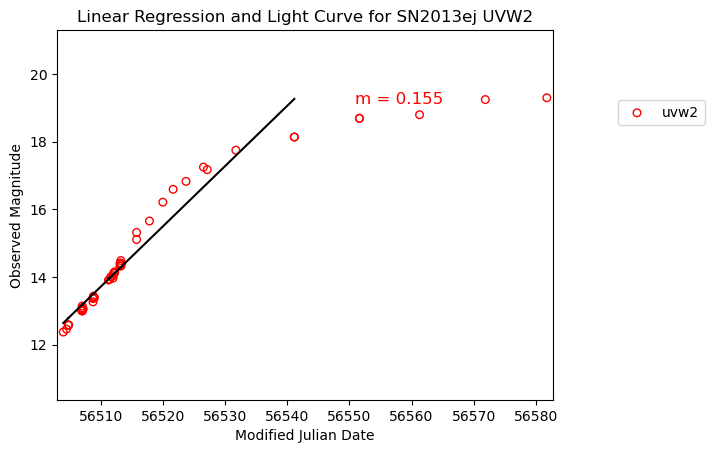

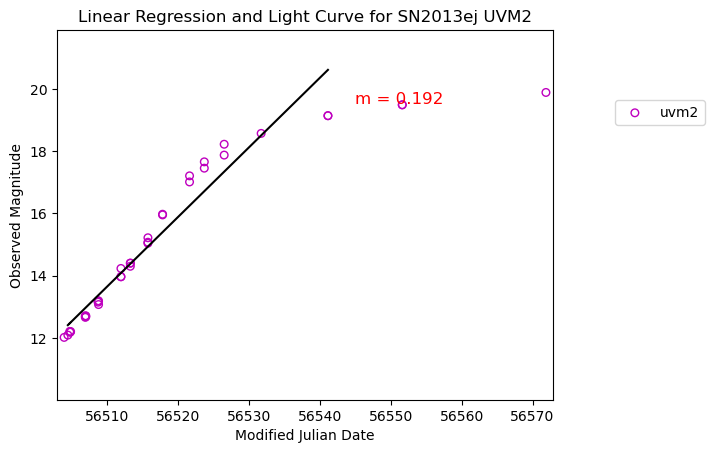

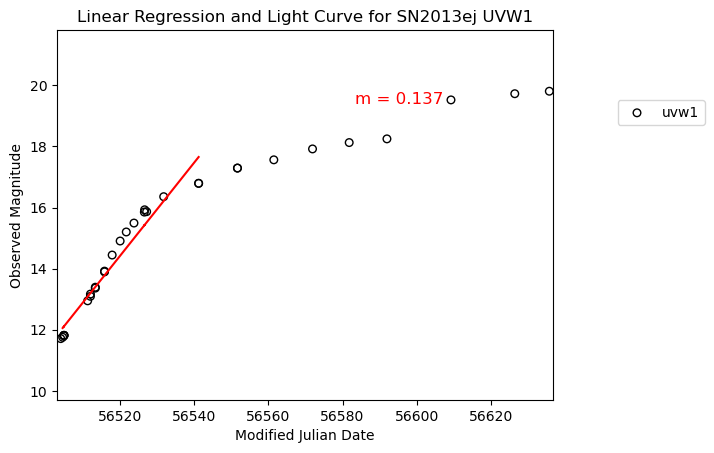

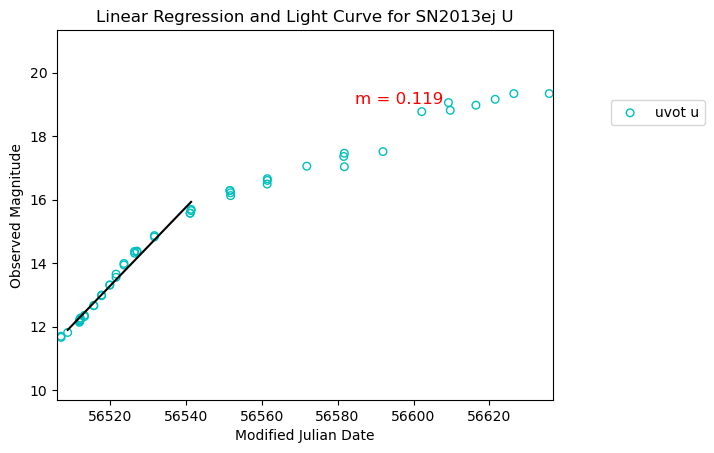

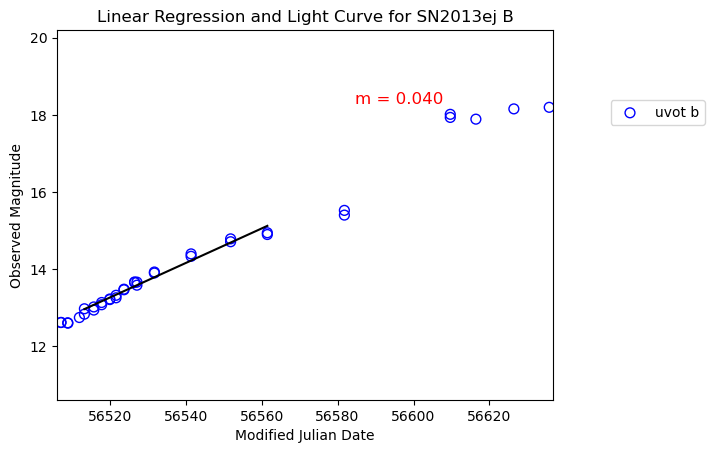

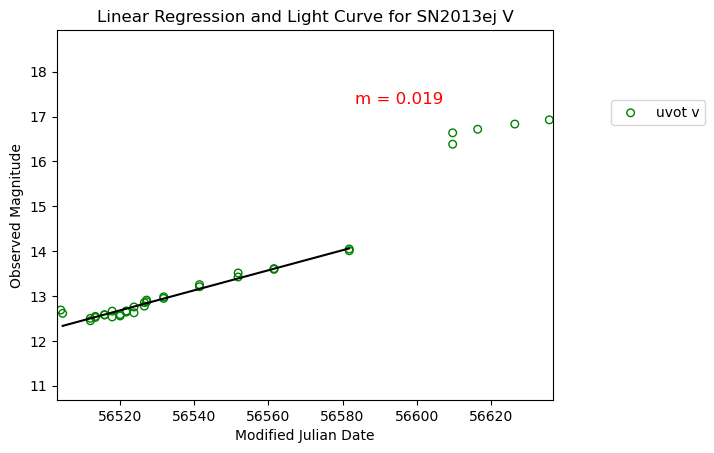

UVW2: 0.155
UVM2: 0.192
UVW1: 0.137
U: 0.119
B: 0.040
V: 0.019
Running fit for SN2014cx.txt...
Trying to open: SN2014cx.txt


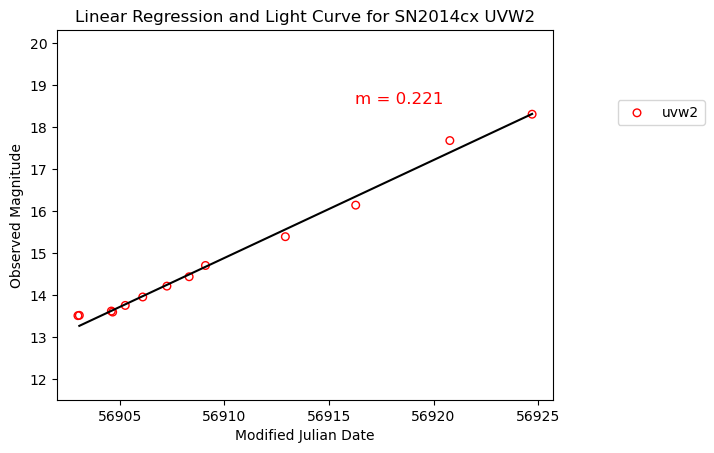

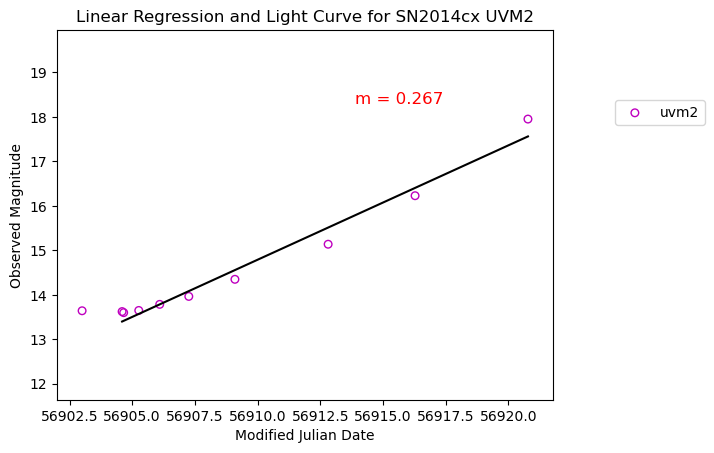

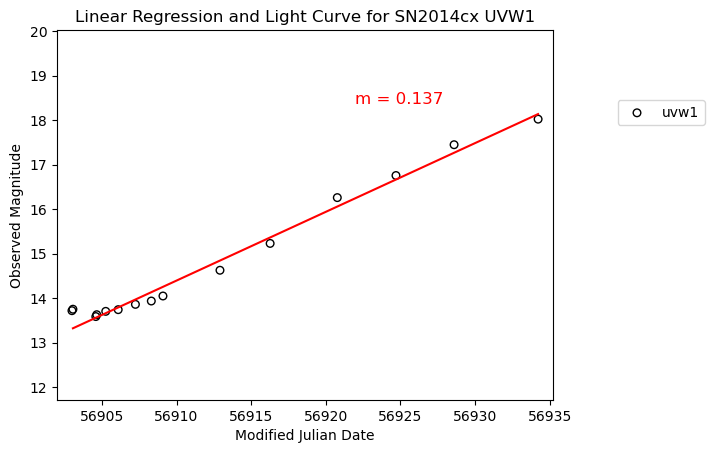

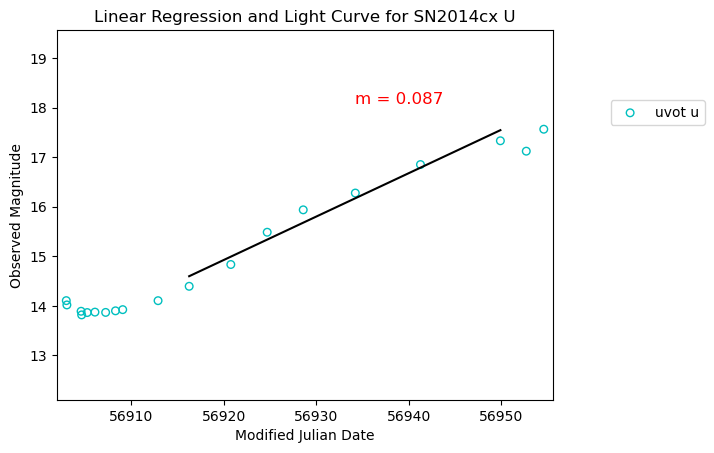

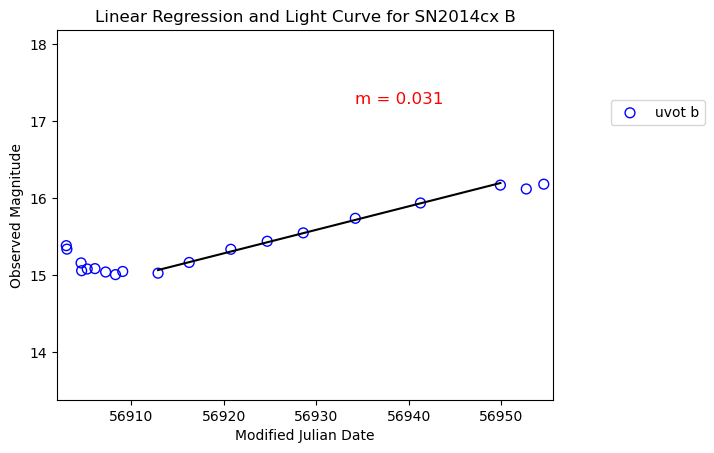

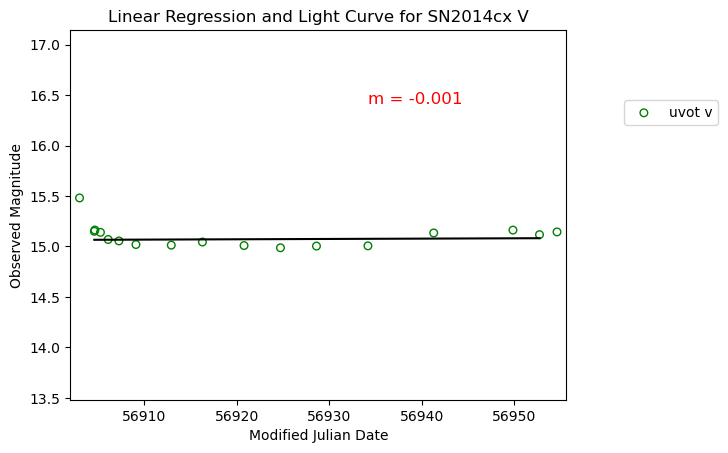

UVW2: 0.221
UVM2: 0.267
UVW1: 0.137
U: 0.087
B: 0.031
V: -0.001
Running fit for SN2015as.txt...
Trying to open: SN2015as.txt


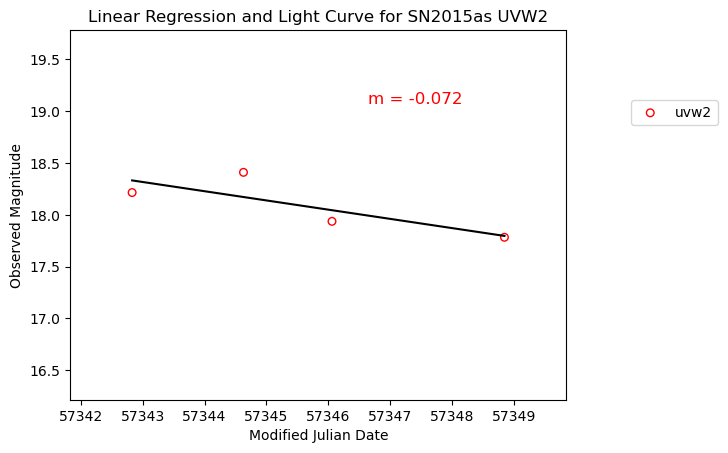

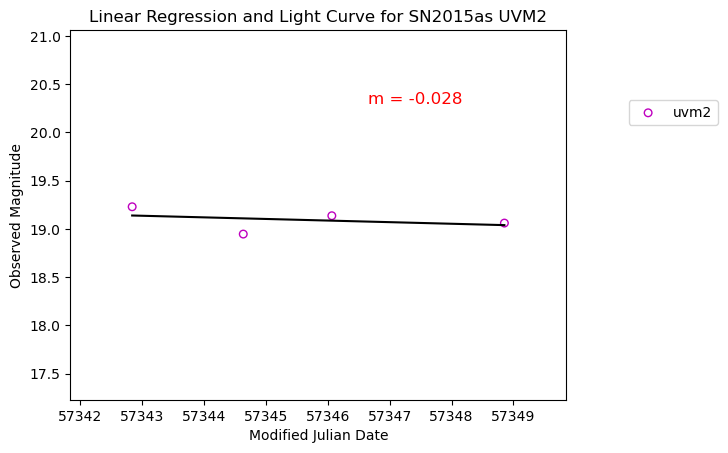

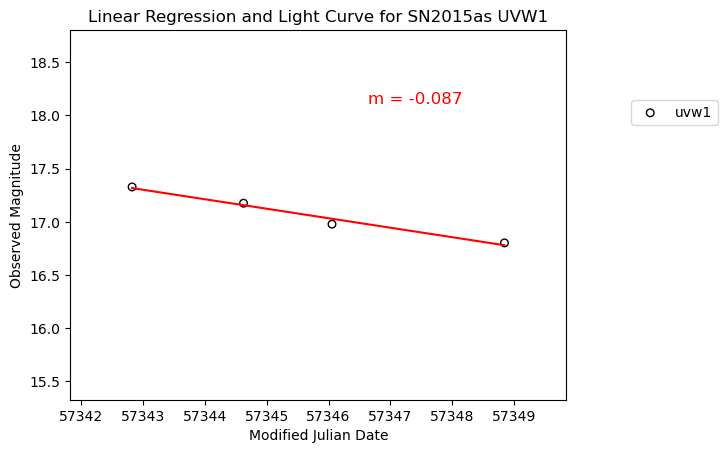

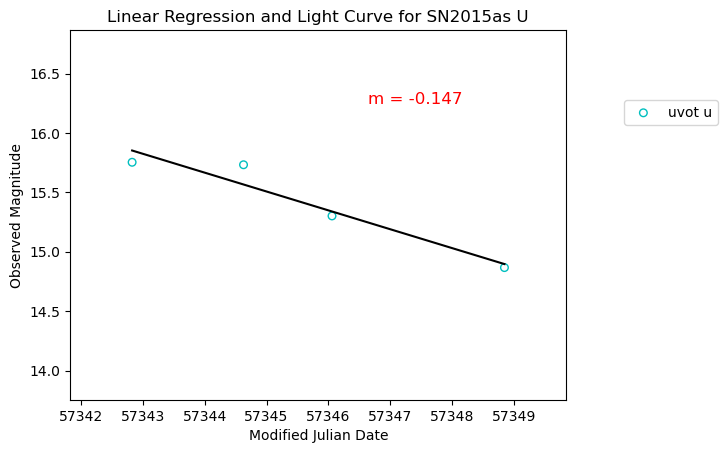

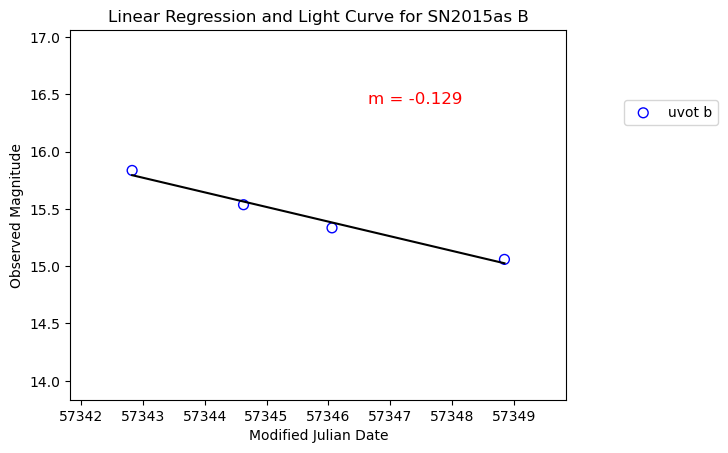

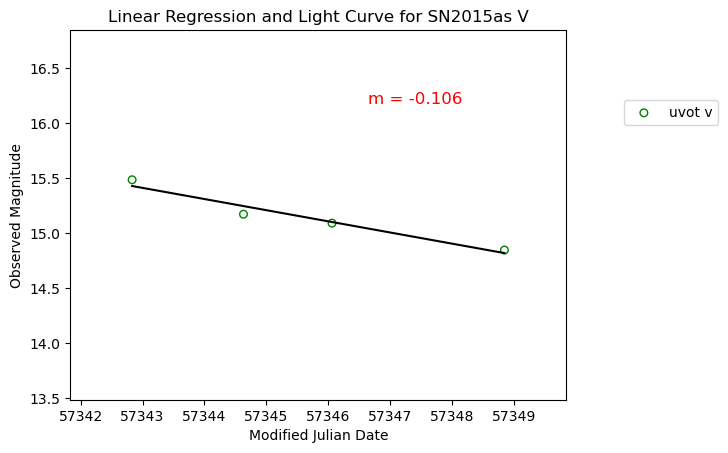

UVW2: -0.072
UVM2: -0.028
UVW1: -0.087
U: -0.147
B: -0.129
V: -0.106
Running fit for SN2016aqf.txt...
Trying to open: SN2016aqf.txt


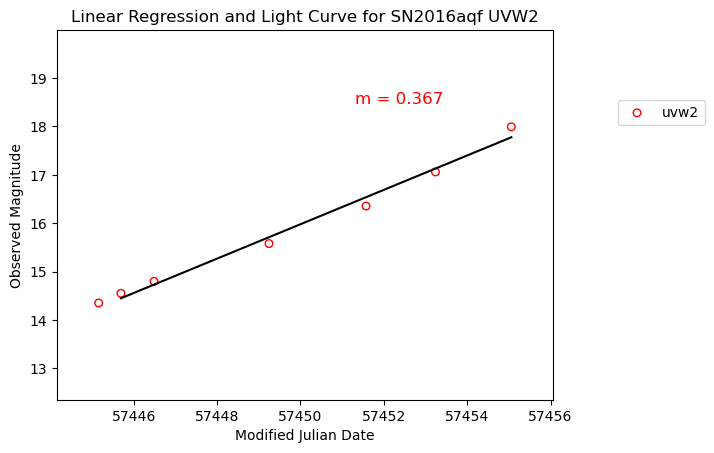

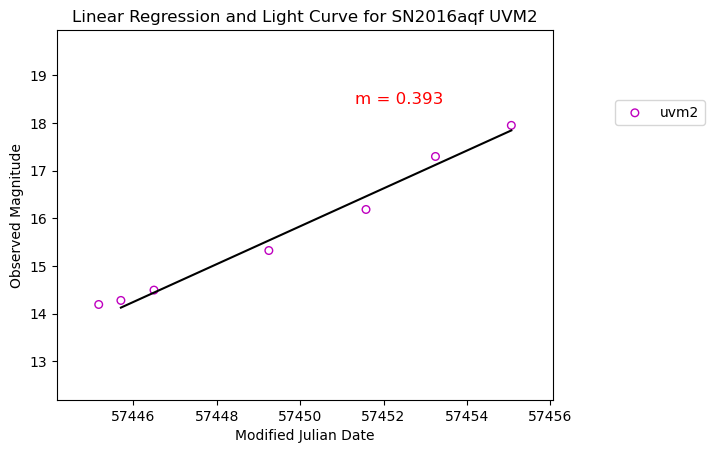

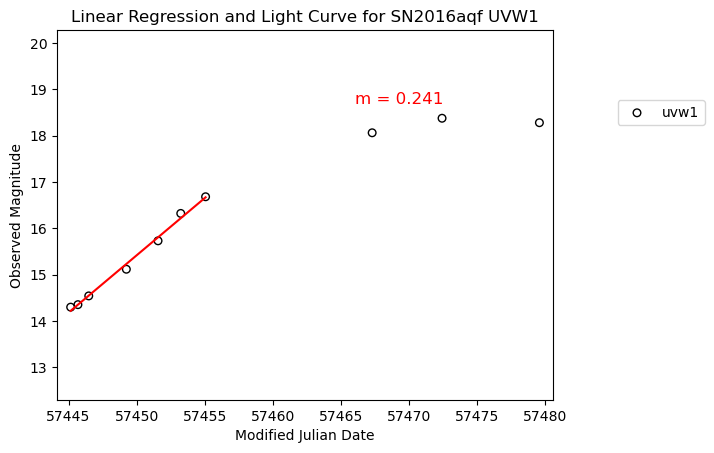

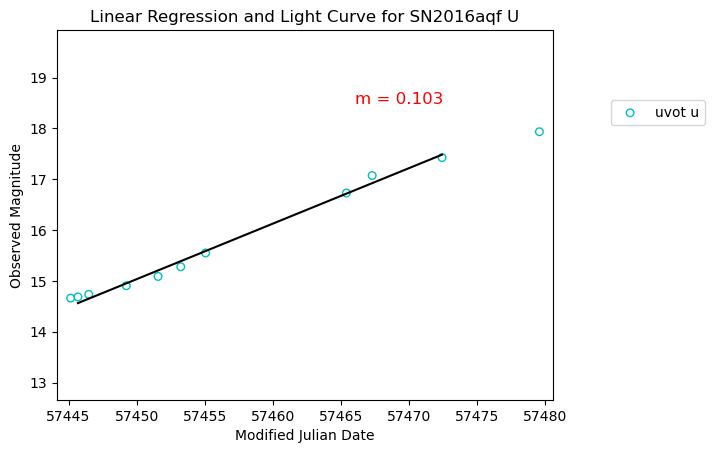

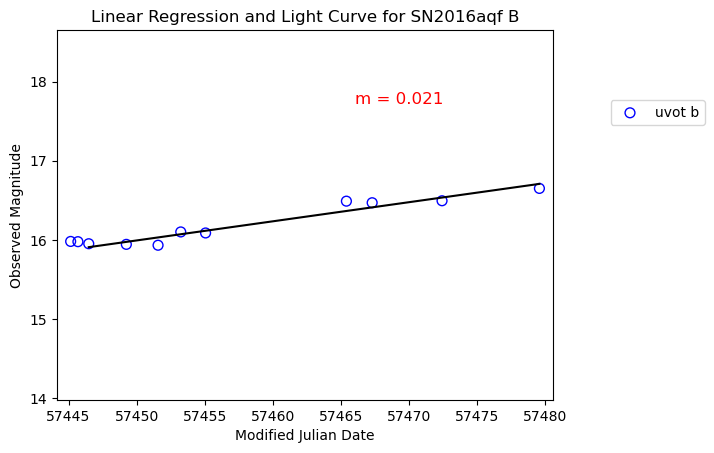

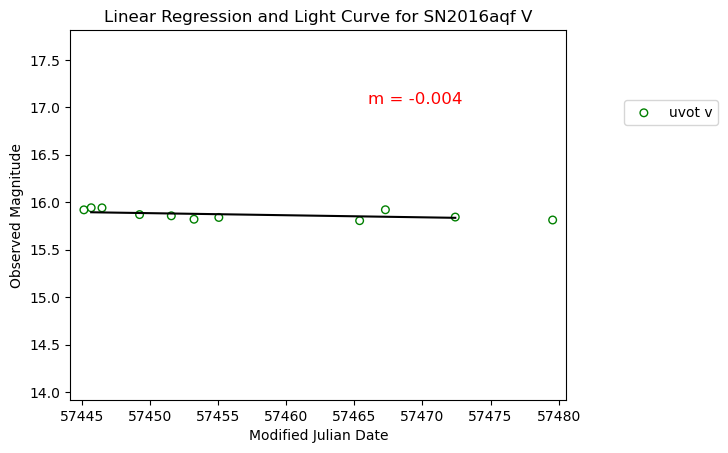

UVW2: 0.367
UVM2: 0.393
UVW1: 0.241
U: 0.103
B: 0.021
V: -0.004
Running fit for SN2016B.txt...
Trying to open: SN2016B.txt


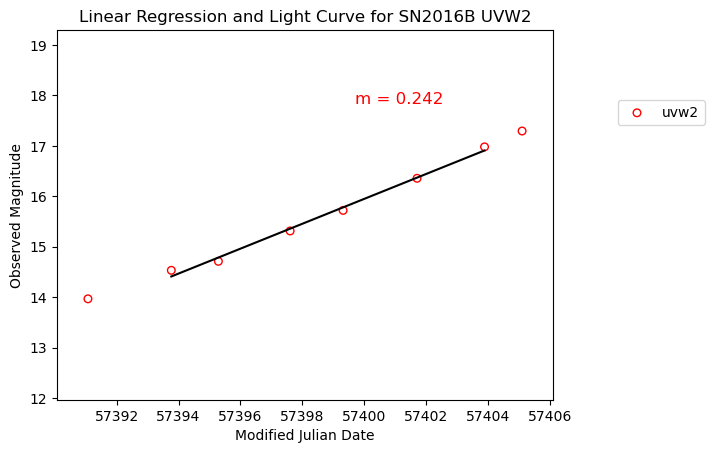

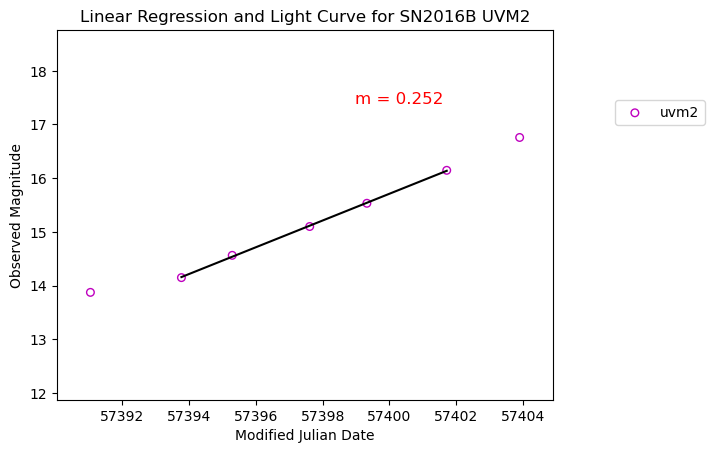

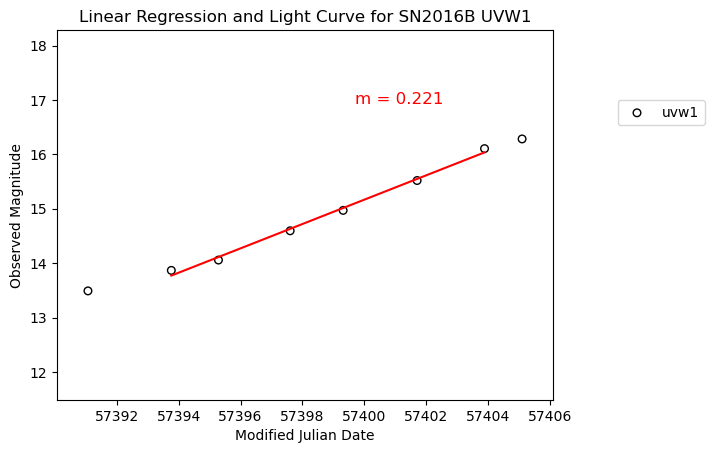

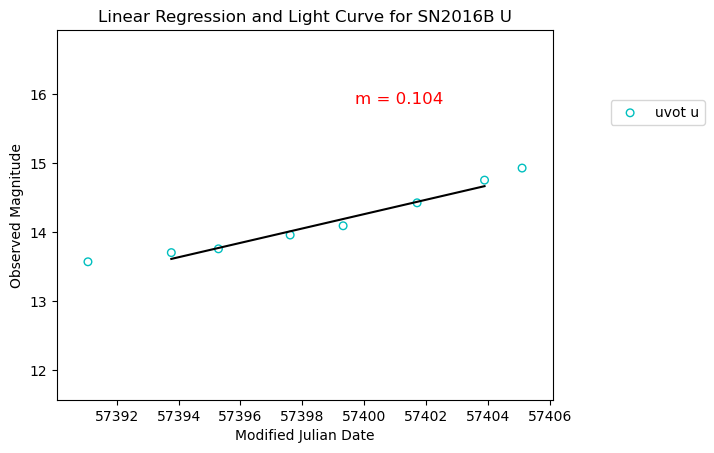

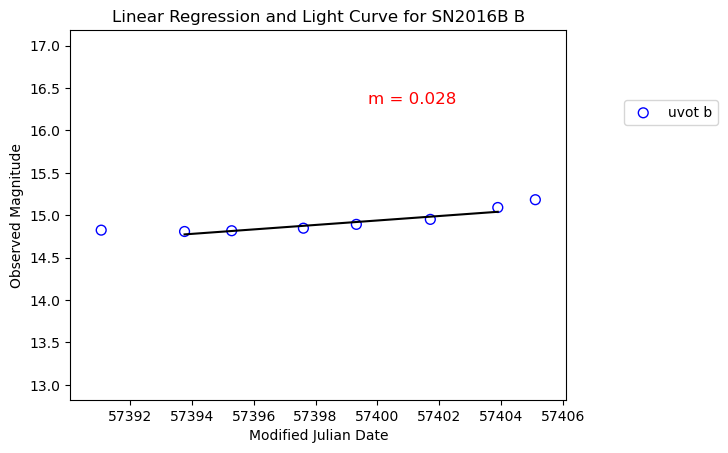

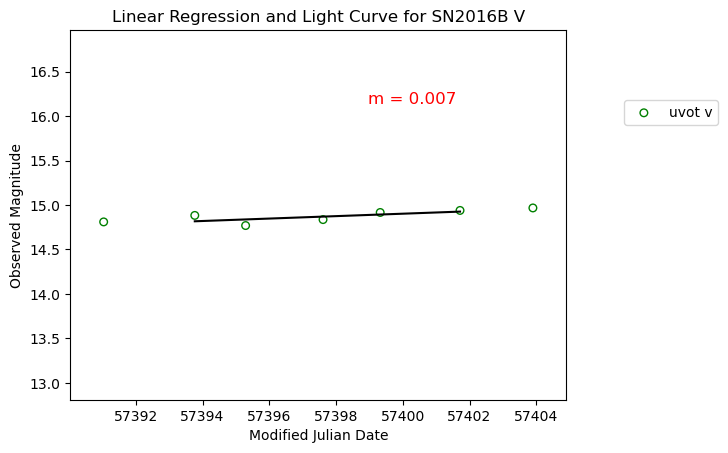

UVW2: 0.242
UVM2: 0.252
UVW1: 0.221
U: 0.104
B: 0.028
V: 0.007
Running fit for SN2016blz.txt...
Trying to open: SN2016blz.txt


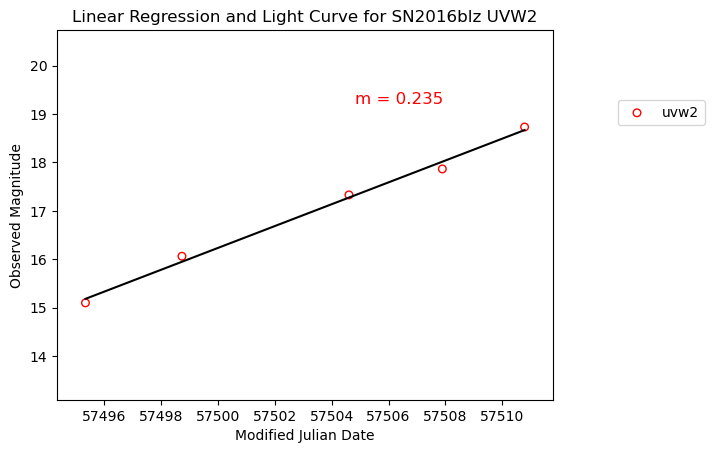

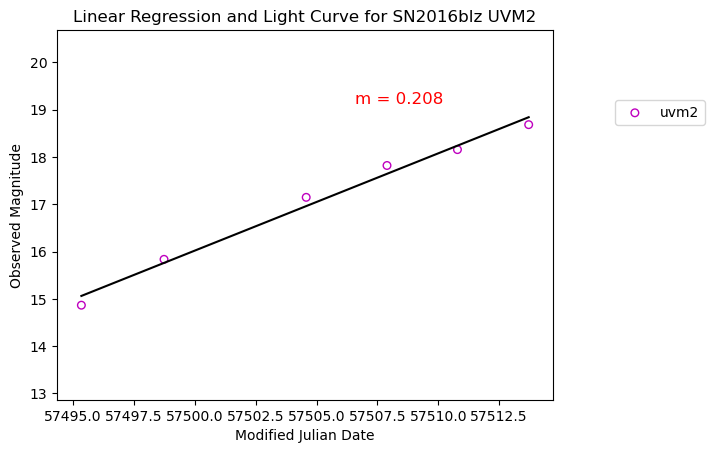

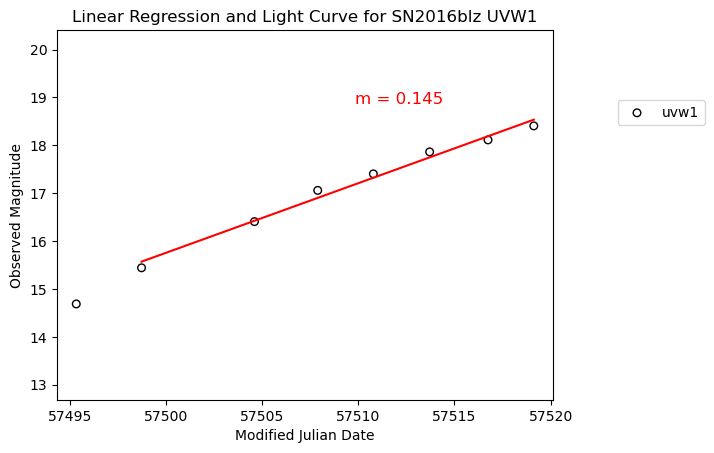

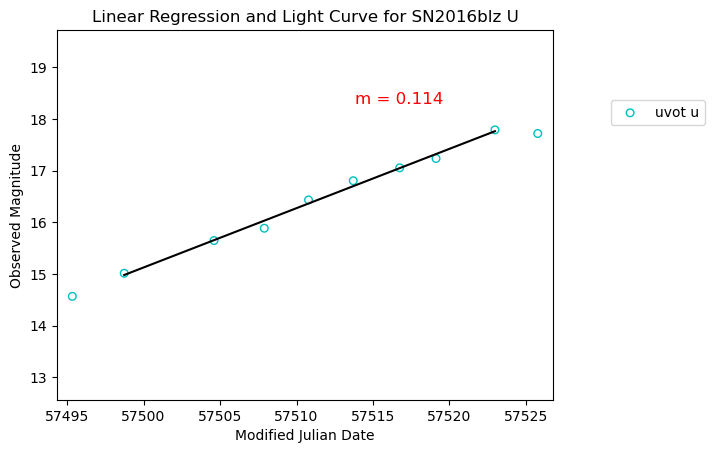

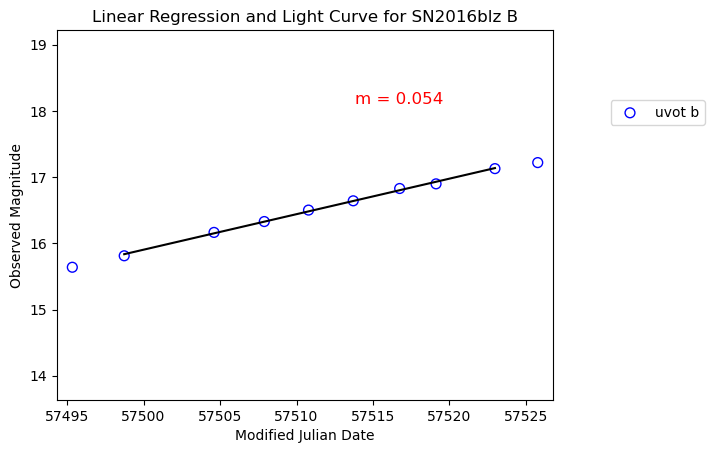

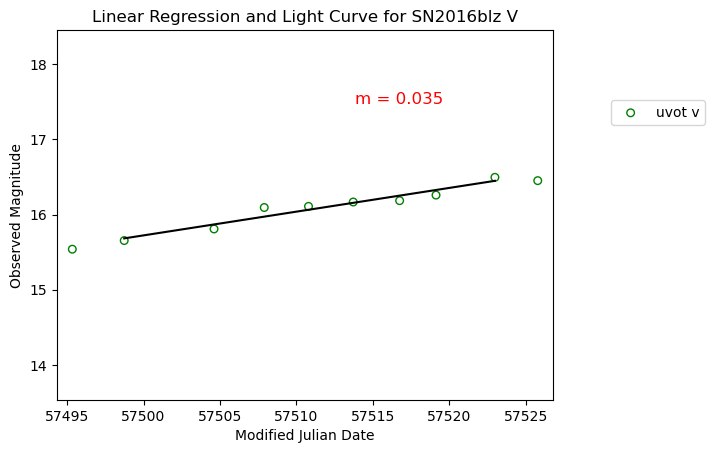

UVW2: 0.235
UVM2: 0.208
UVW1: 0.145
U: 0.114
B: 0.054
V: 0.035
Running fit for SN2016cqj.txt...
Trying to open: SN2016cqj.txt


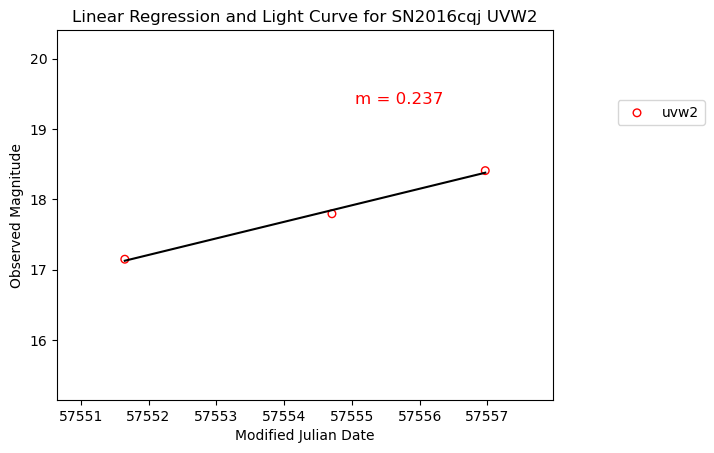

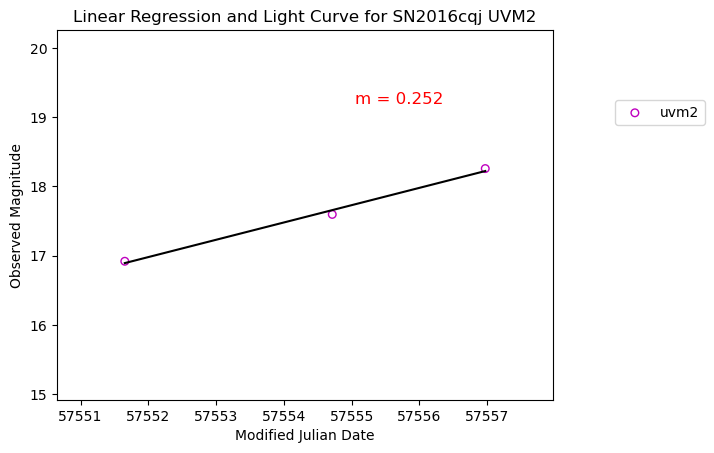

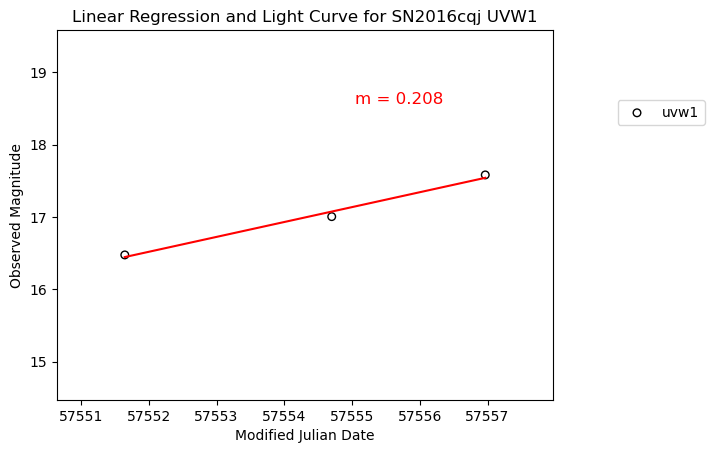

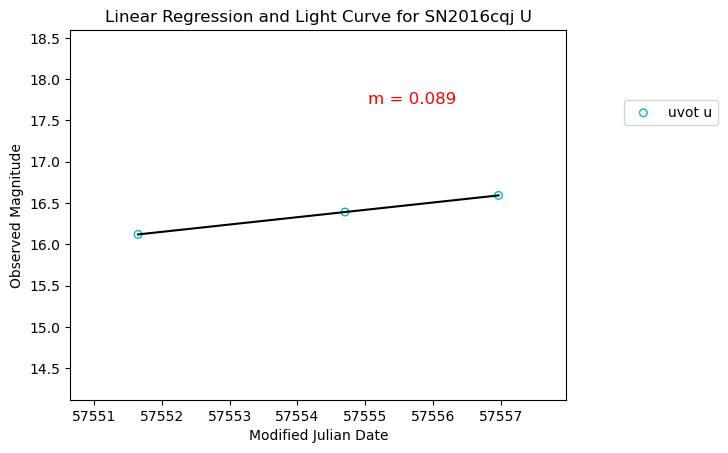

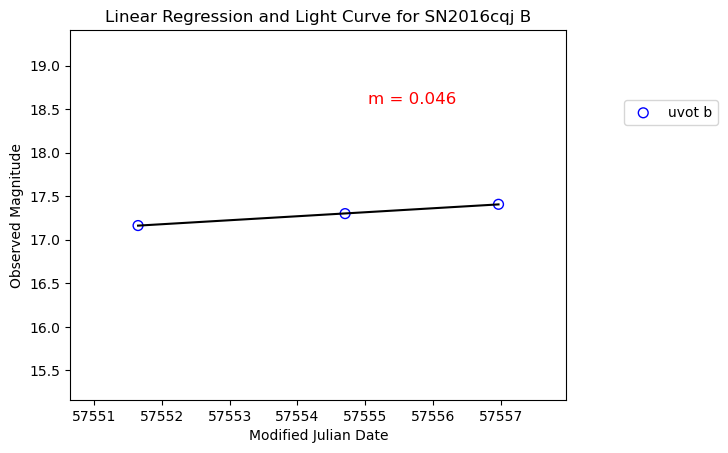

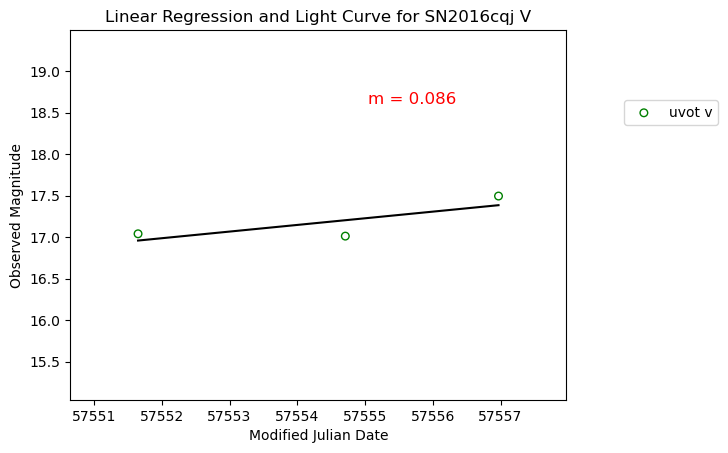

UVW2: 0.237
UVM2: 0.252
UVW1: 0.208
U: 0.089
B: 0.046
V: 0.086
Running fit for SN2016gfy.txt...
Trying to open: SN2016gfy.txt


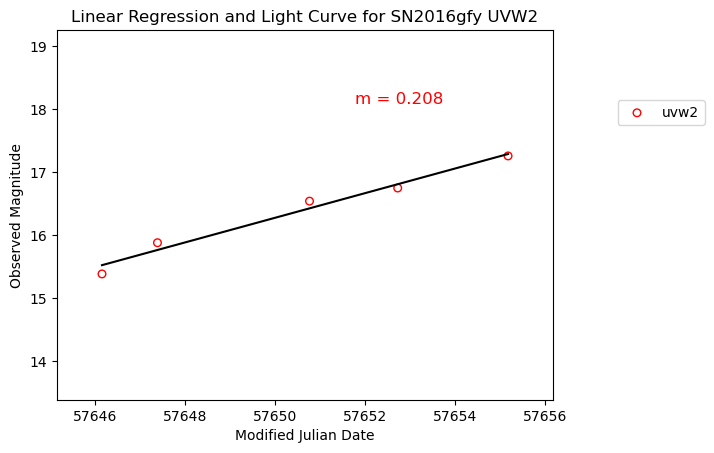

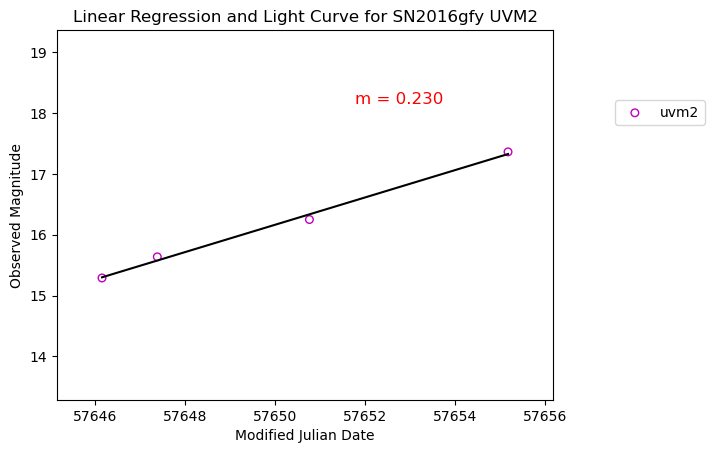

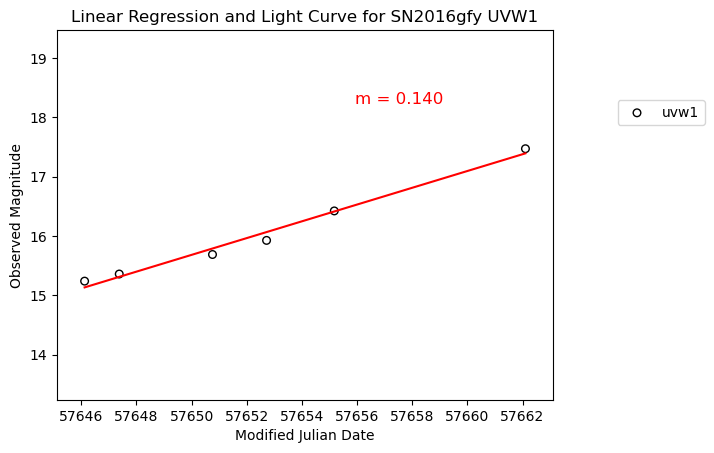

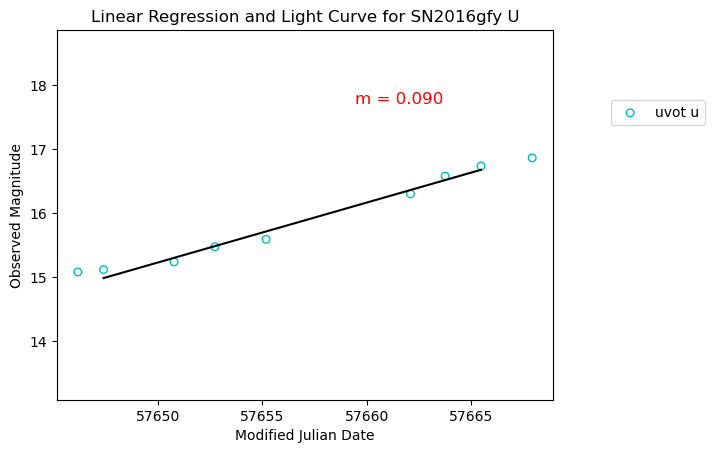

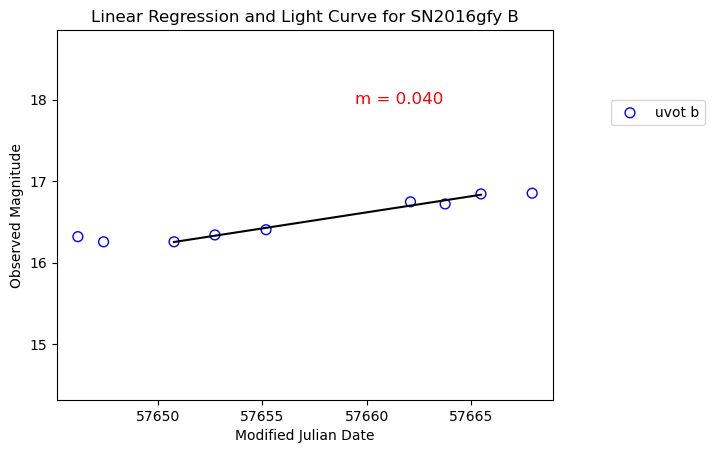

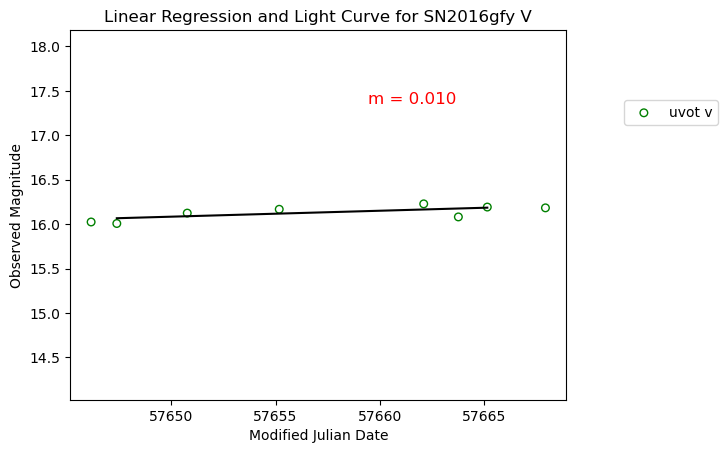

UVW2: 0.208
UVM2: 0.230
UVW1: 0.140
U: 0.090
B: 0.040
V: 0.010
Running fit for SN2017eaw.txt...
Trying to open: SN2017eaw.txt


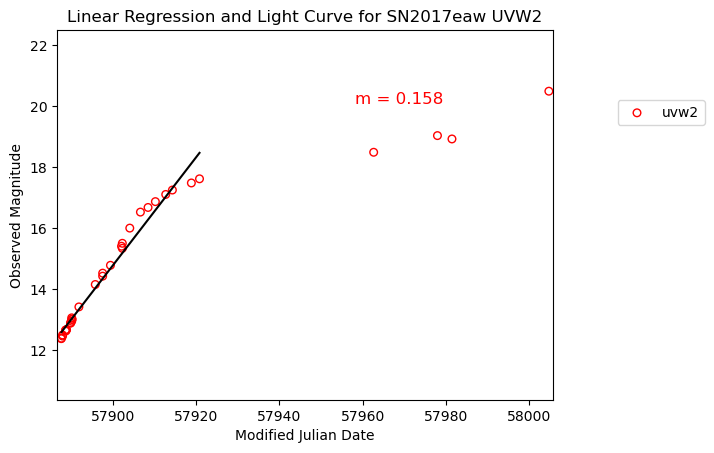

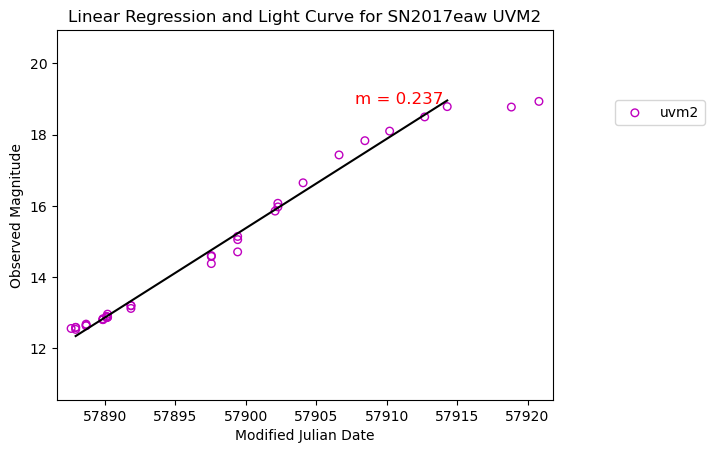

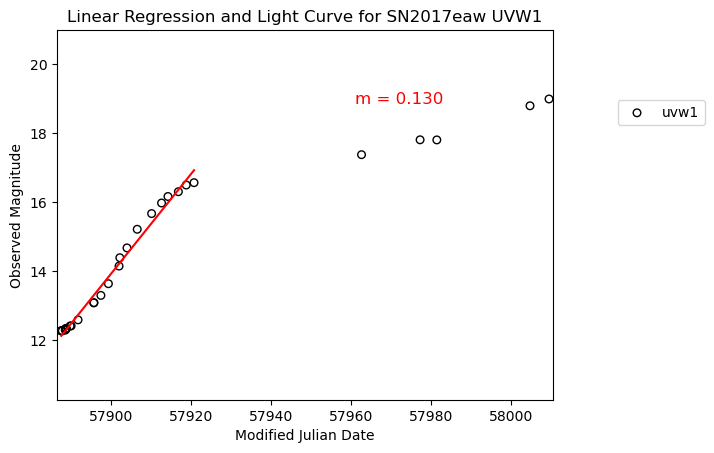

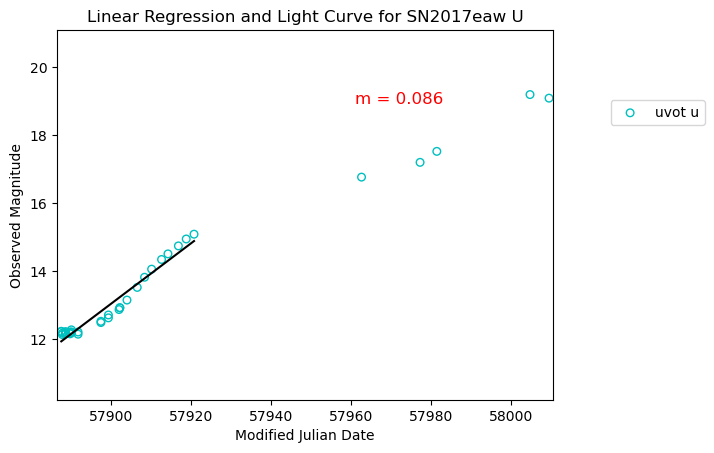

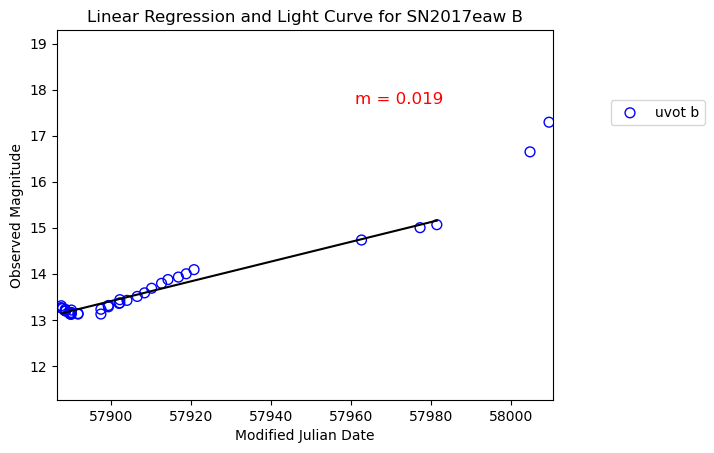

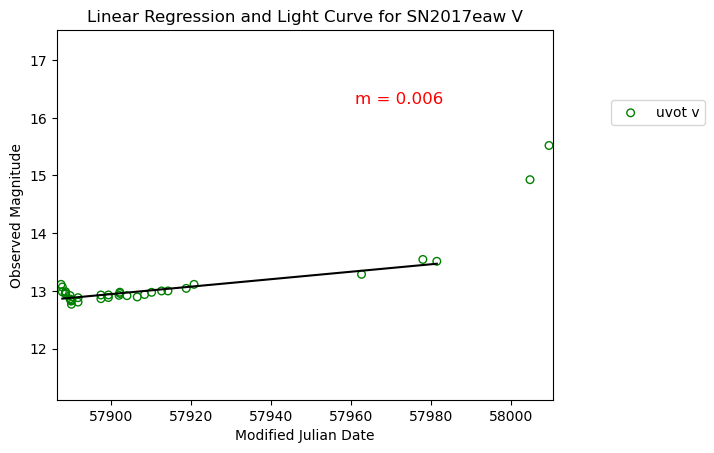

UVW2: 0.158
UVM2: 0.237
UVW1: 0.130
U: 0.086
B: 0.019
V: 0.006
Running fit for SN2018is.txt...
Trying to open: SN2018is.txt


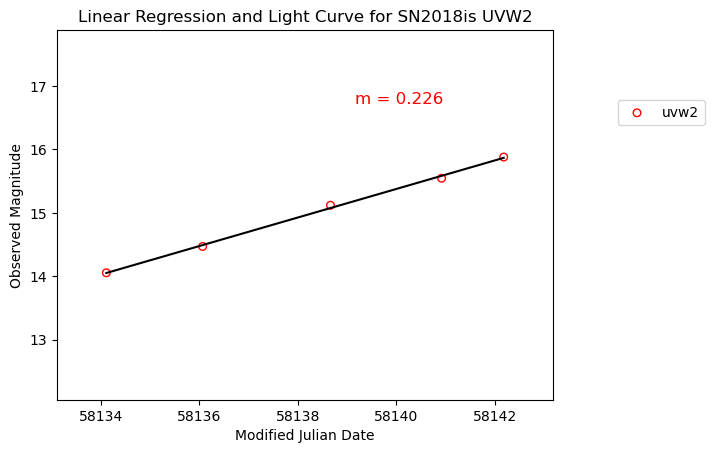

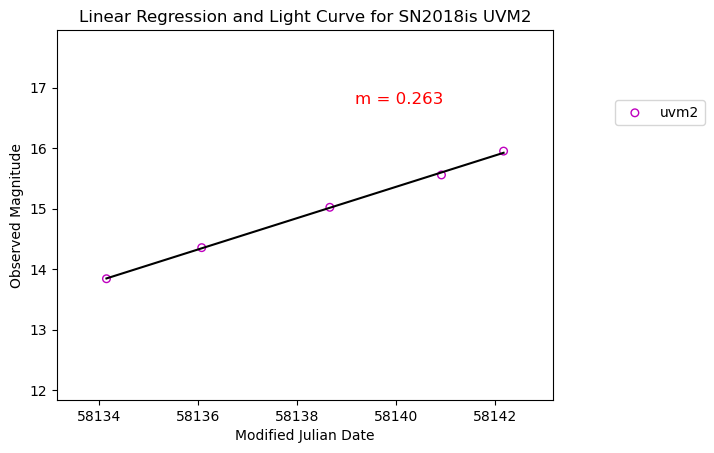

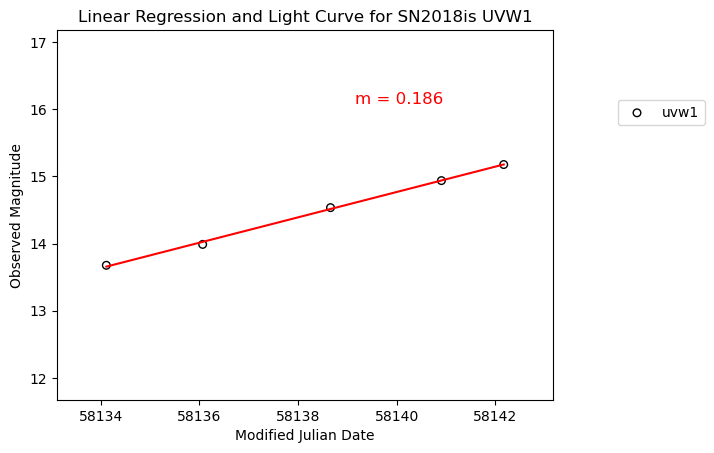

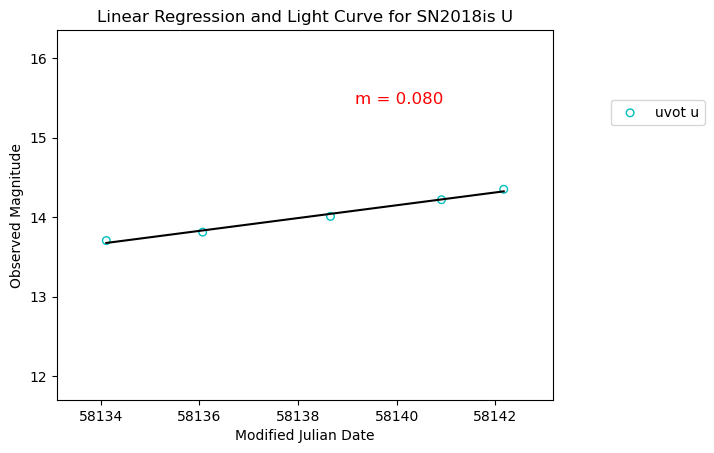

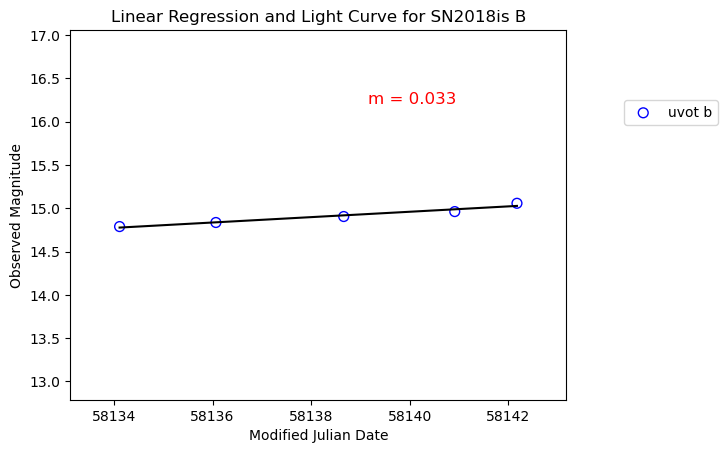

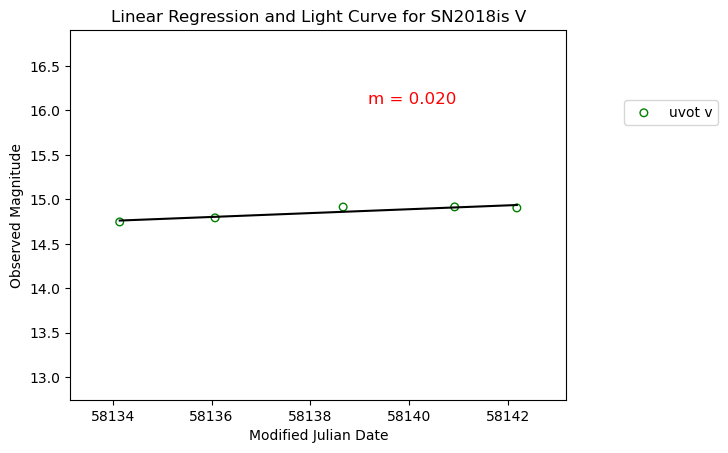

UVW2: 0.226
UVM2: 0.263
UVW1: 0.186
U: 0.080
B: 0.033
V: 0.020
Running fit for SN2018ivc.txt...
Trying to open: SN2018ivc.txt


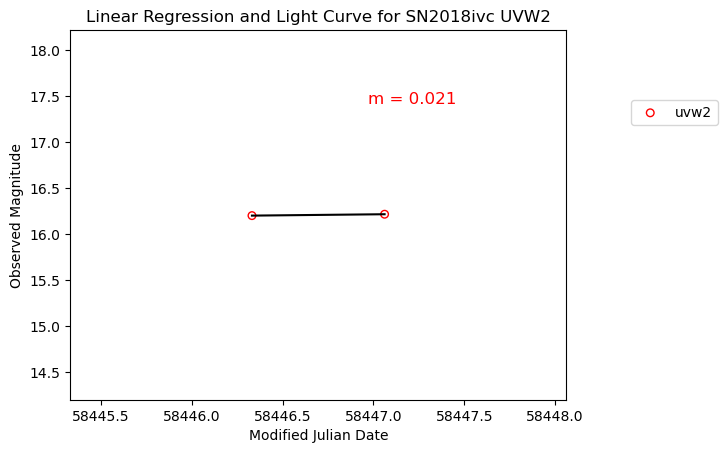

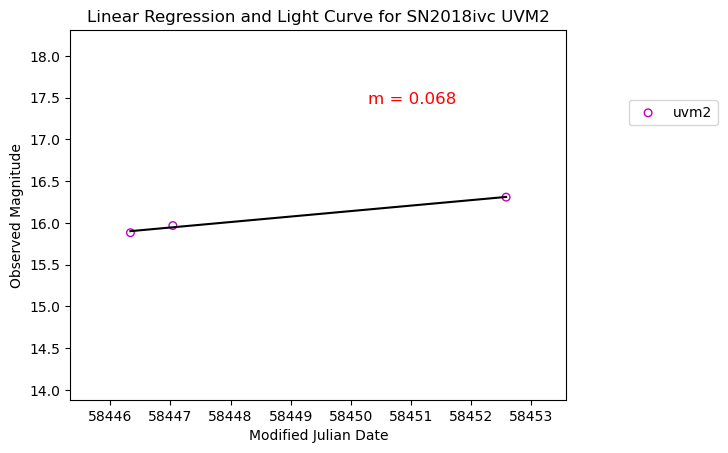

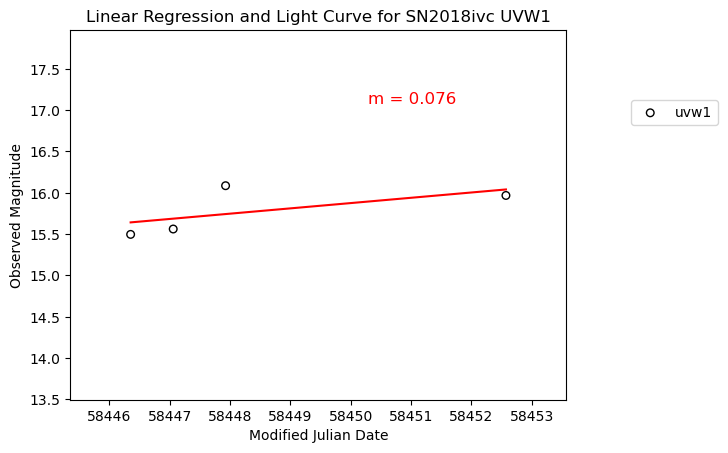

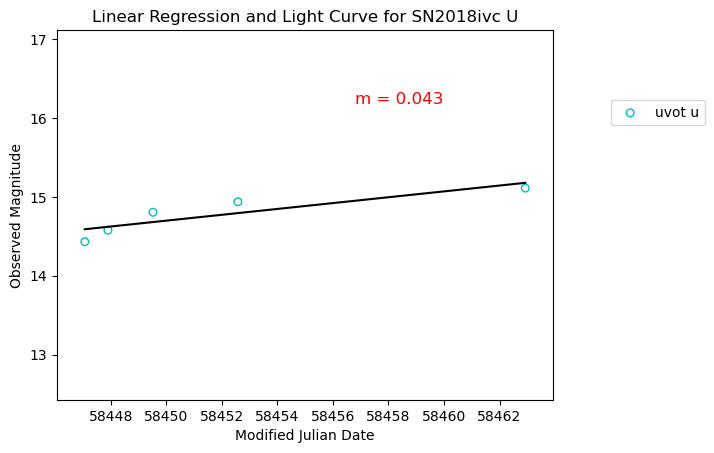

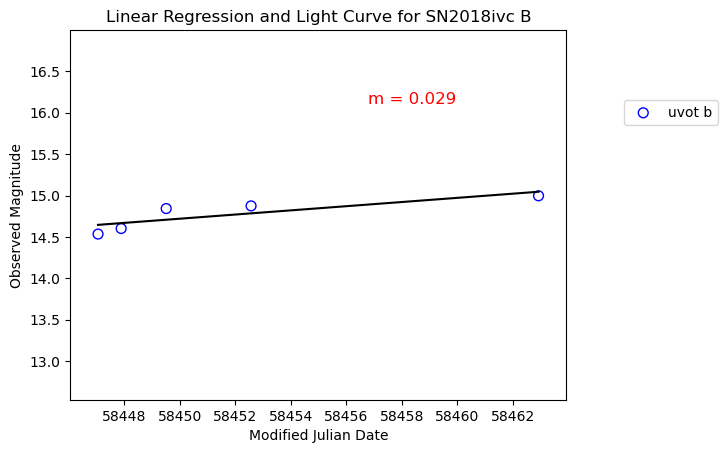

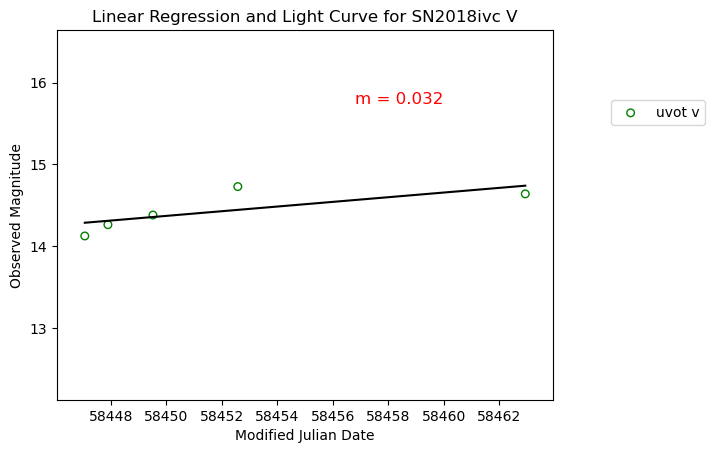

UVW2: 0.021
UVM2: 0.068
UVW1: 0.076
U: 0.043
B: 0.029
V: 0.032
Running fit for SN2013by.txt...
Trying to open: SN2013by.txt


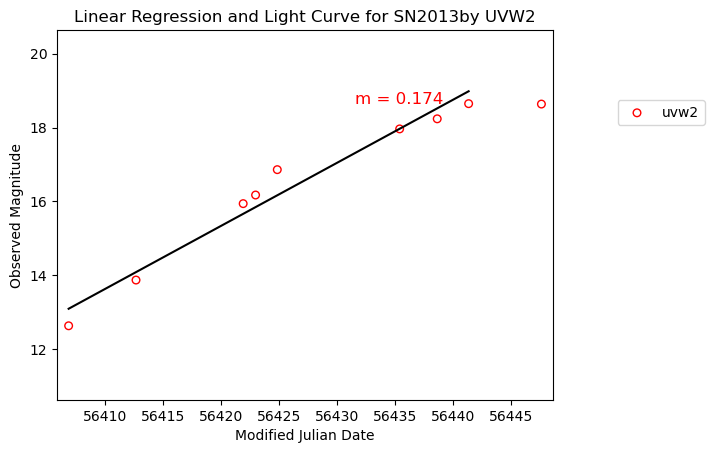

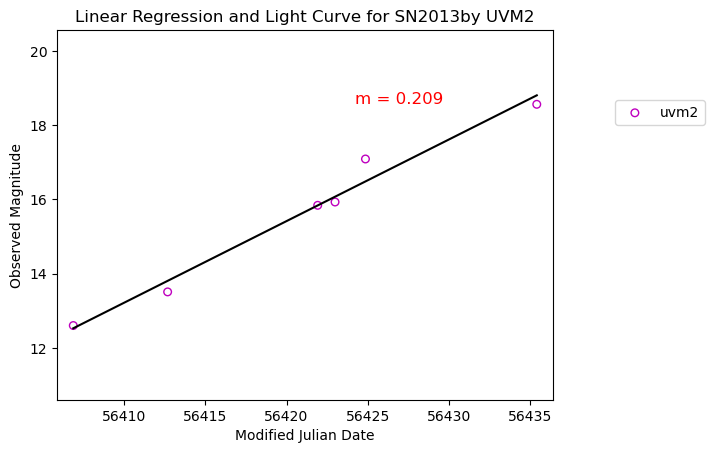

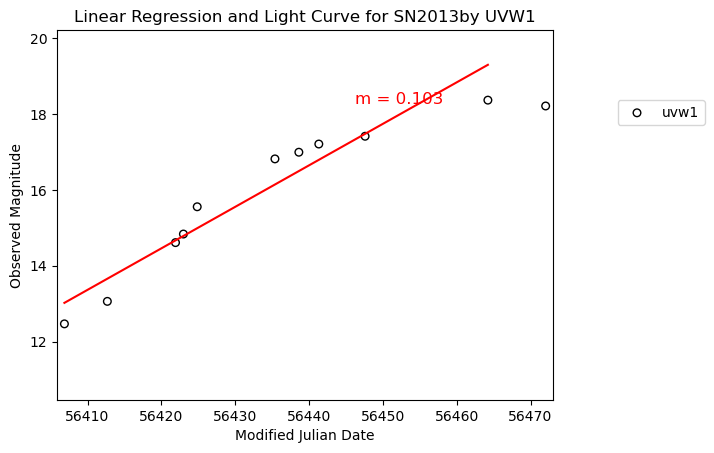

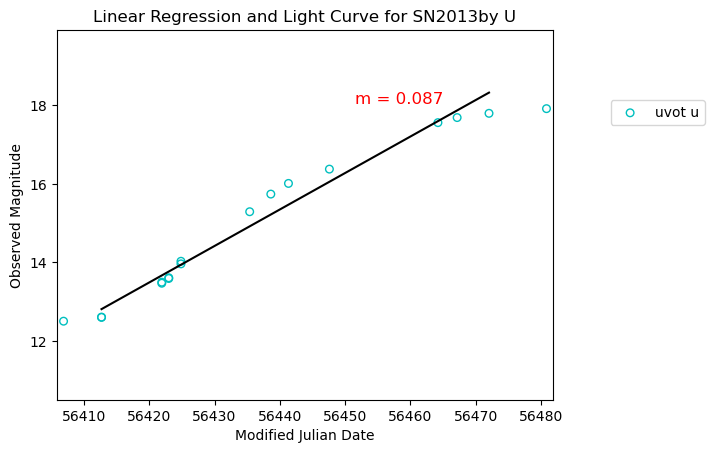

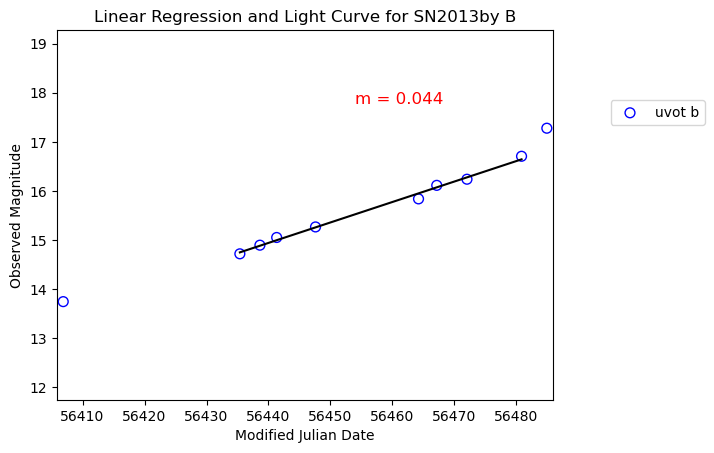

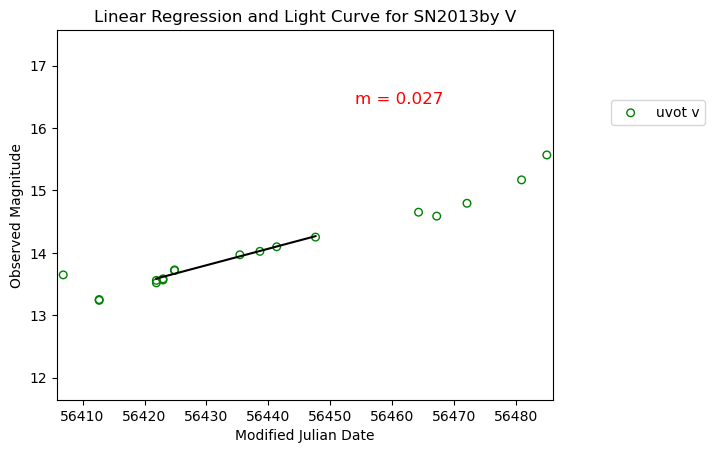

UVW2: 0.174
UVM2: 0.209
UVW1: 0.103
U: 0.087
B: 0.044
V: 0.027
Running fit for SN2013fs.txt...
Trying to open: SN2013fs.txt


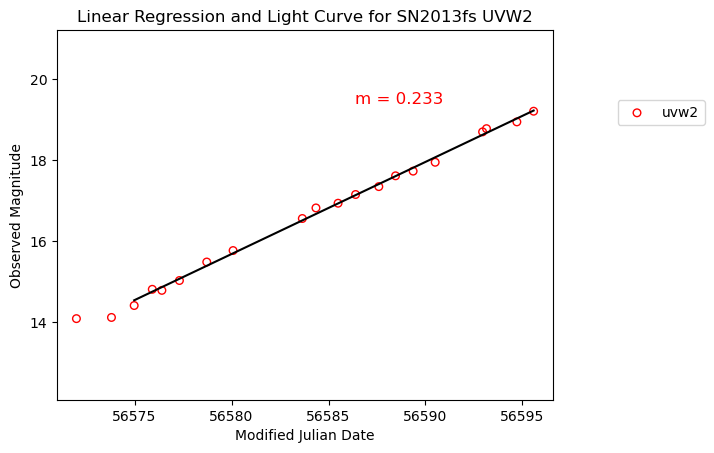

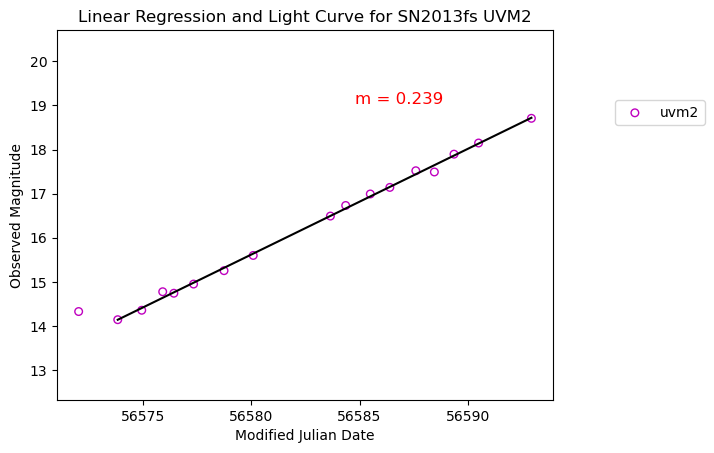

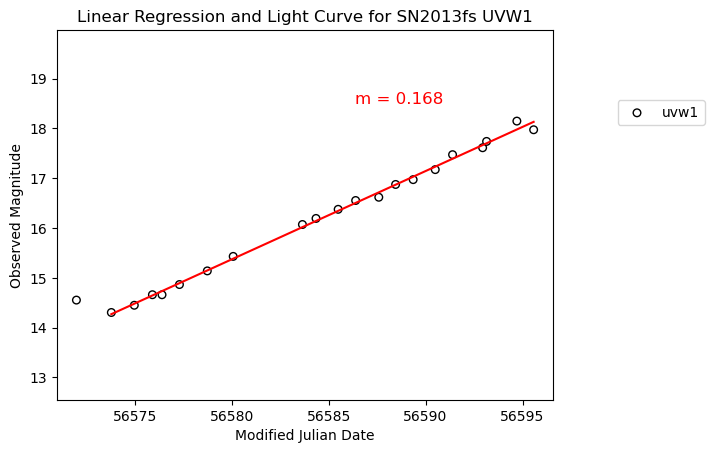

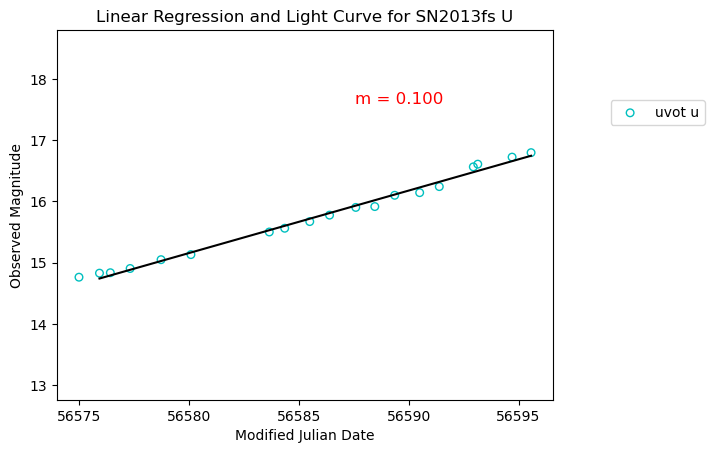

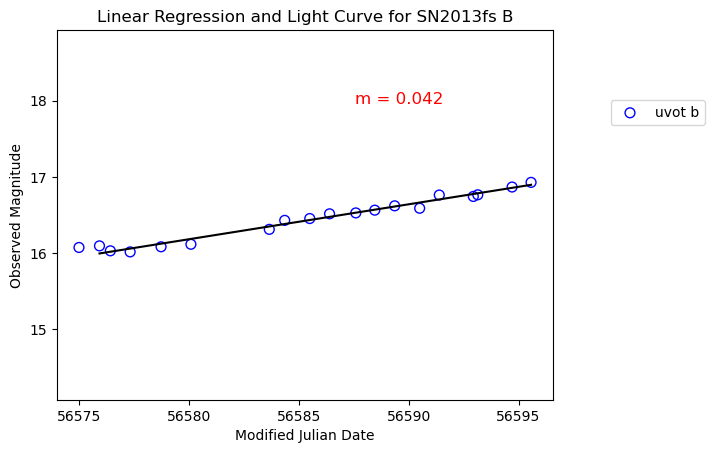

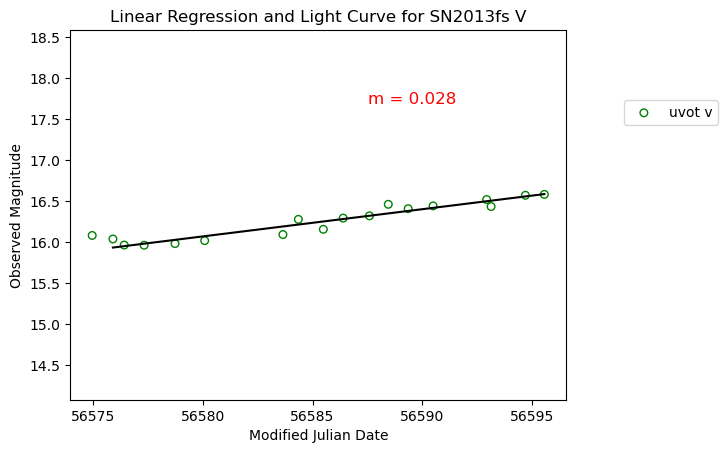

UVW2: 0.233
UVM2: 0.239
UVW1: 0.168
U: 0.100
B: 0.042
V: 0.028
Running fit for SN2009kr.txt...
Trying to open: SN2009kr.txt


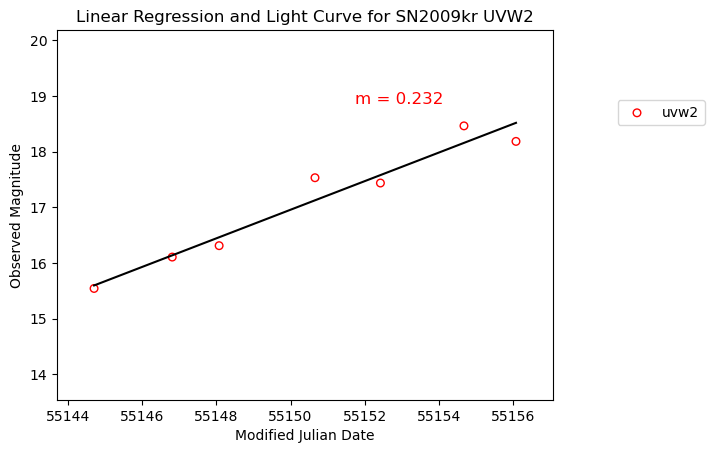

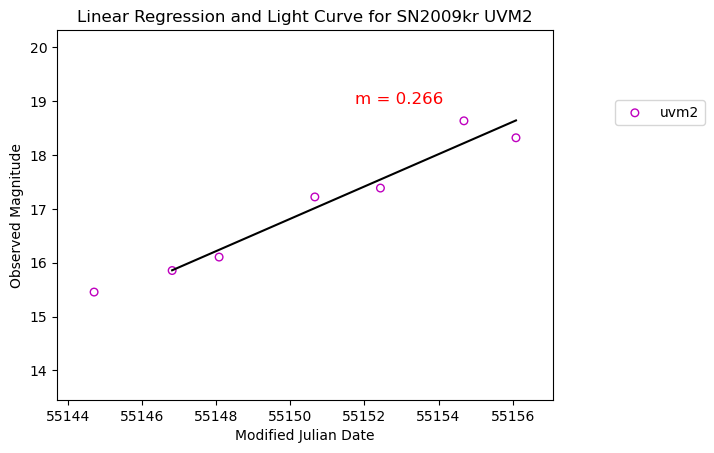

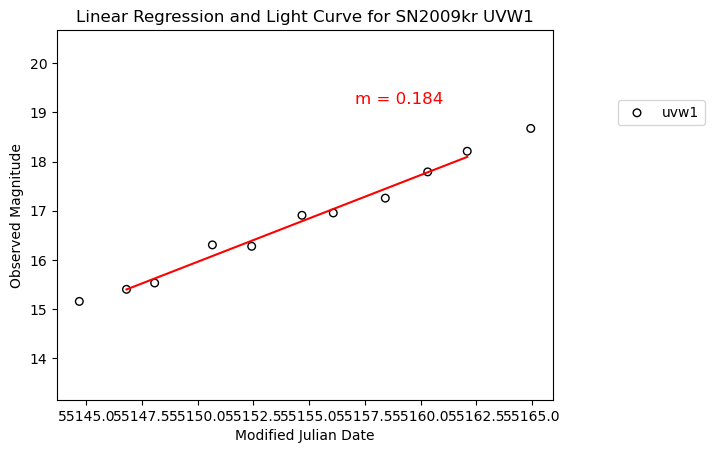

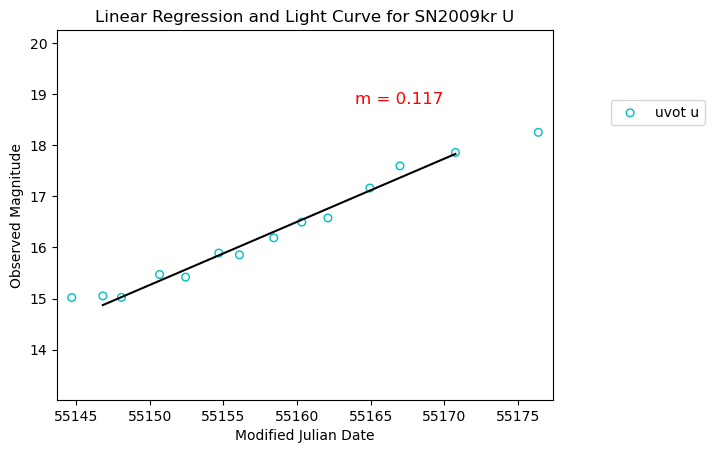

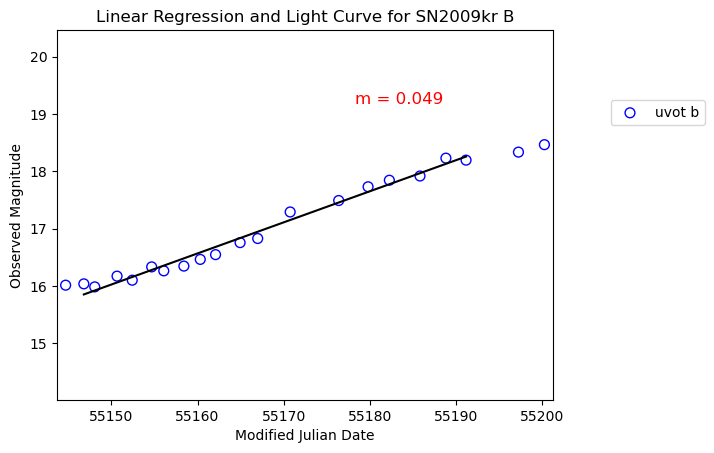

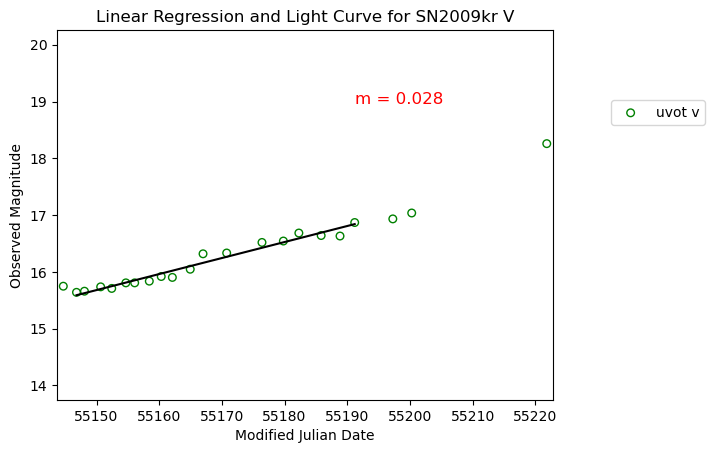

UVW2: 0.232
UVM2: 0.266
UVW1: 0.184
U: 0.117
B: 0.049
V: 0.028
Running fit for PS15cwo.txt...
Trying to open: PS15cwo.txt


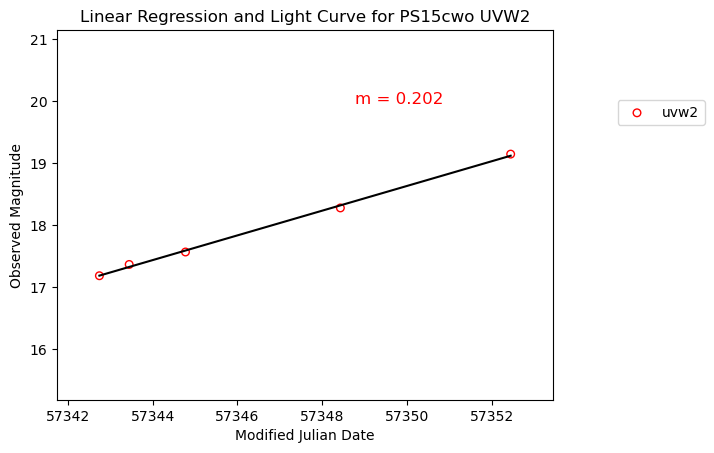

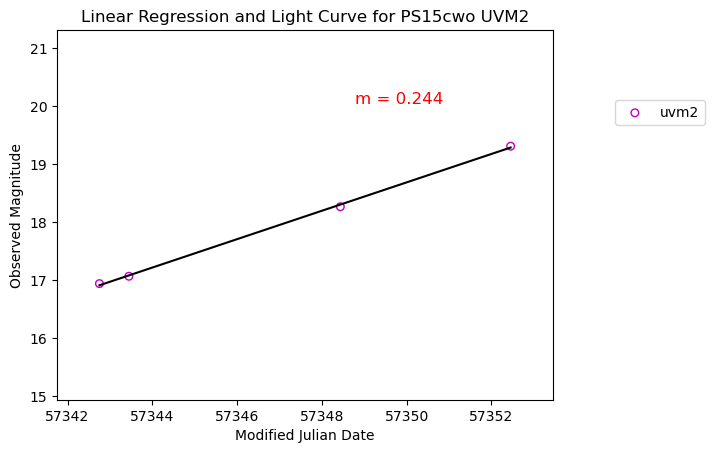

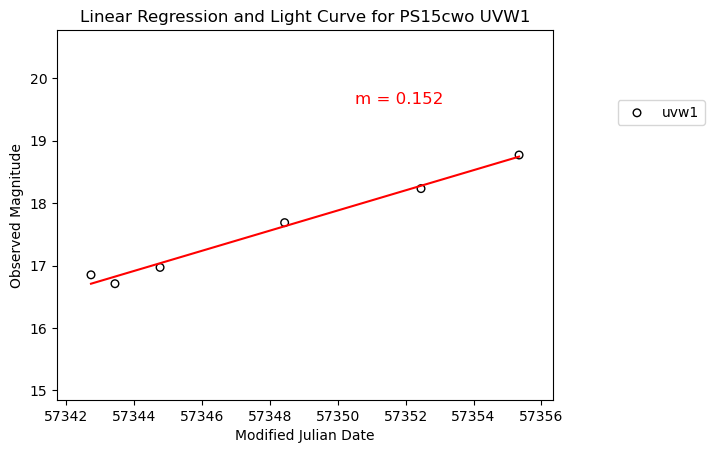

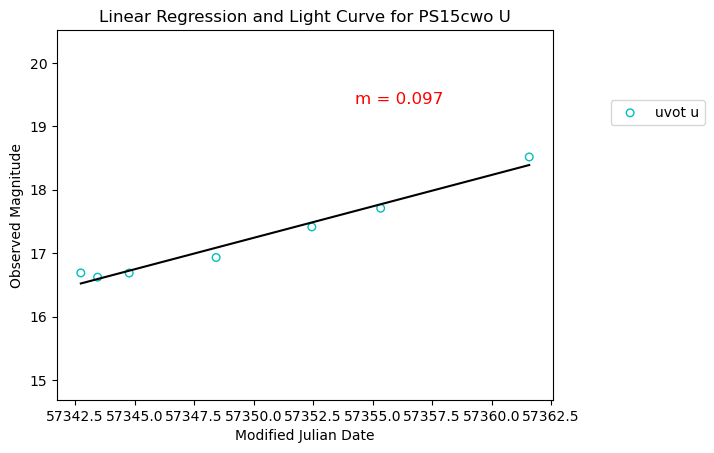

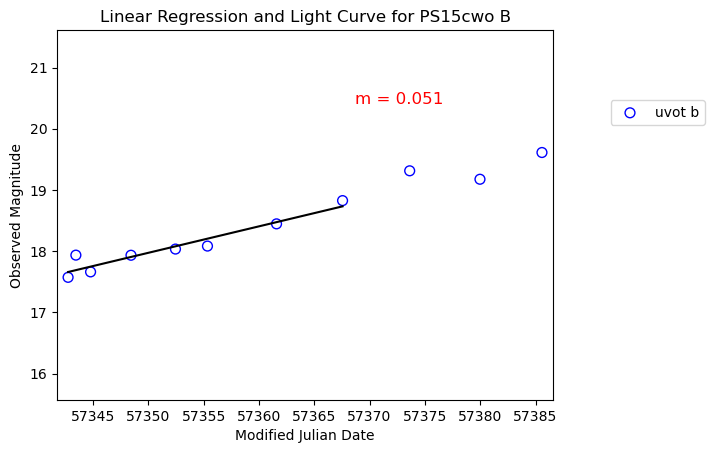

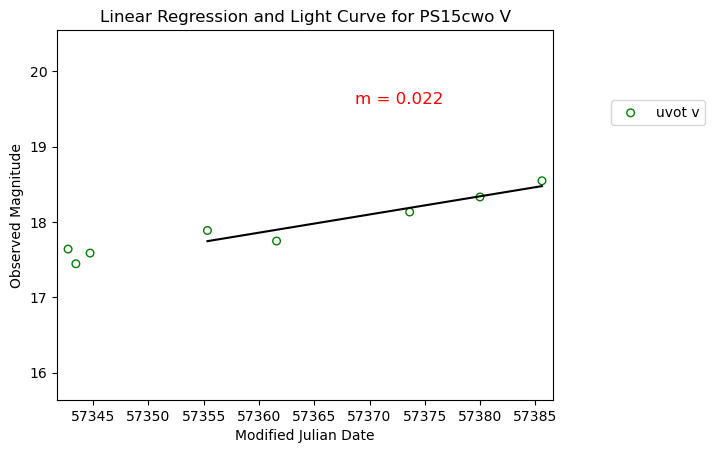

UVW2: 0.202
UVM2: 0.244
UVW1: 0.152
U: 0.097
B: 0.051
V: 0.022
Running fit for SN2006bp (New).txt...
Trying to open: SN2006bp (New).txt
Failed on SN2006bp (New).txt: [Errno 2] No such file or directory: 'SN2006bp (New).txt'
Running fit for SN2008in.txt...
Trying to open: SN2008in.txt


Traceback (most recent call last):
  File "C:\Users\Savannah Stratton\run_from_csv.py", line 29, in run_all_fits
    new_LinearR(
  File "C:\Users\Savannah Stratton\AppData\Local\Temp\ipykernel_7932\3736516747.py", line 5, in new_LinearR
    data = open(file, 'r')
           ^^^^^^^^^^^^^^^
  File "C:\Users\Savannah Stratton\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 324, in _modified_open
    return io_open(file, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
FileNotFoundError: [Errno 2] No such file or directory: 'SN2006bp (New).txt'


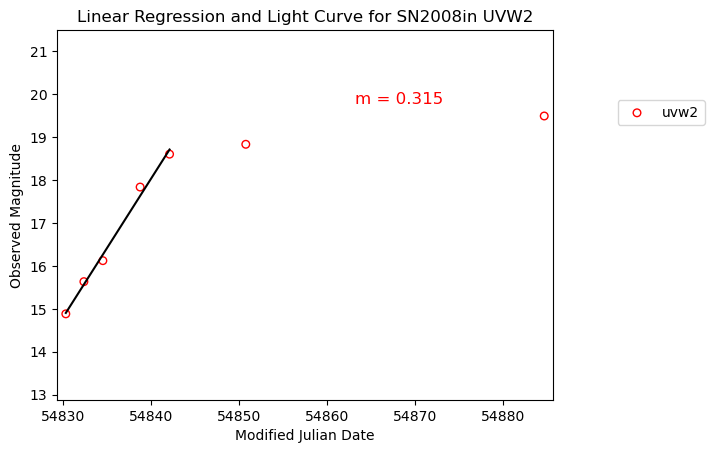

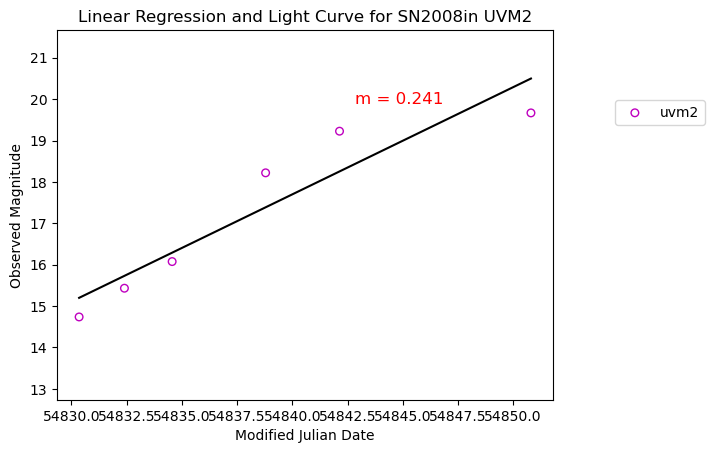

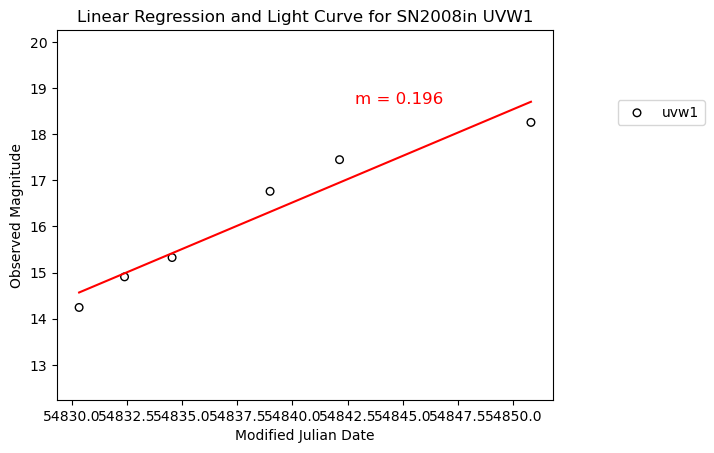

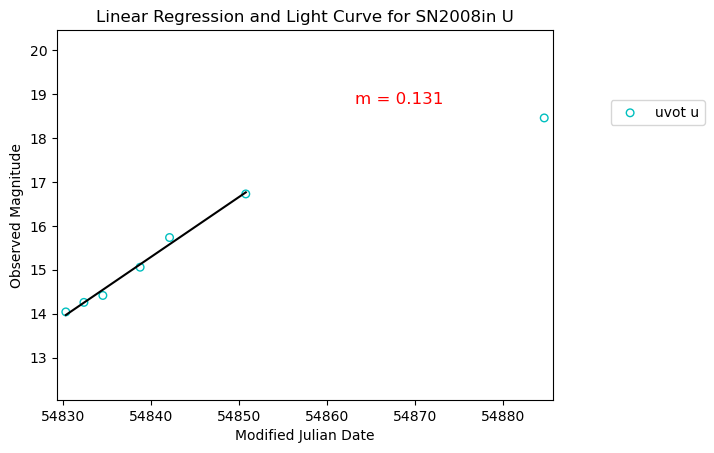

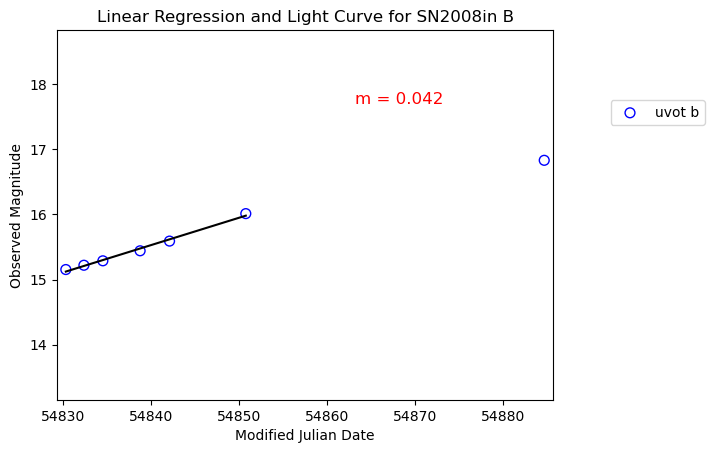

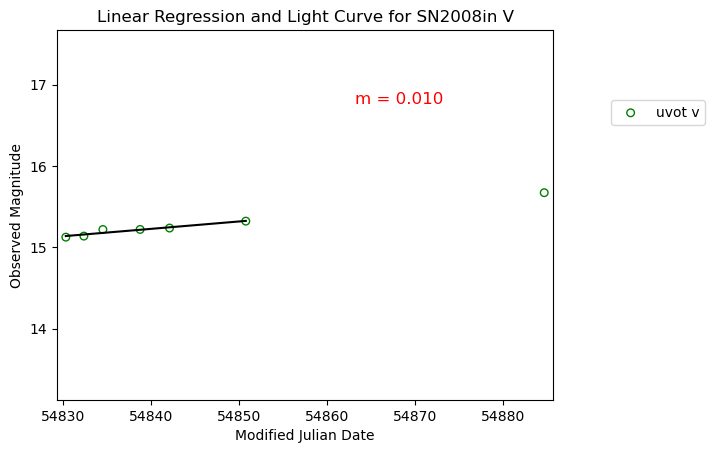

UVW2: 0.315
UVM2: 0.241
UVW1: 0.196
U: 0.131
B: 0.042
V: 0.010
Running fit for SN2009N.txt...
Trying to open: SN2009N.txt


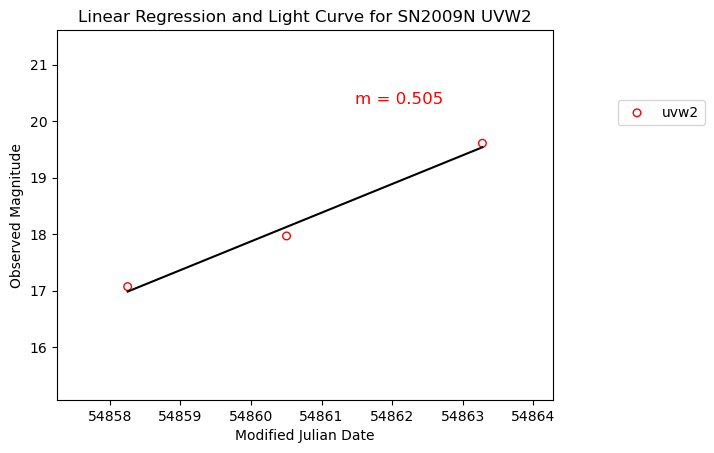

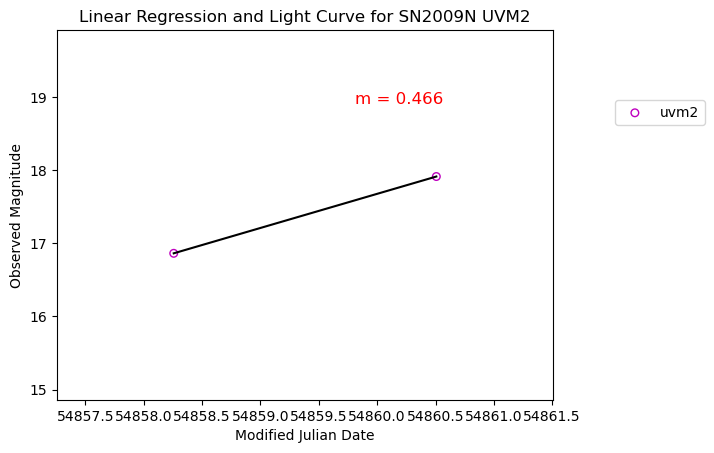

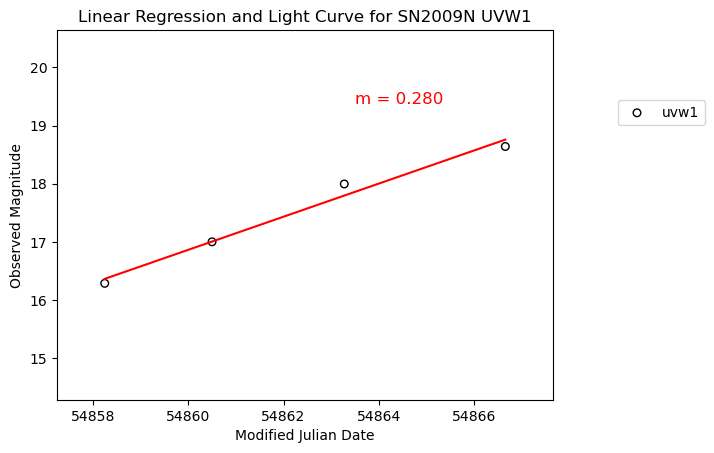

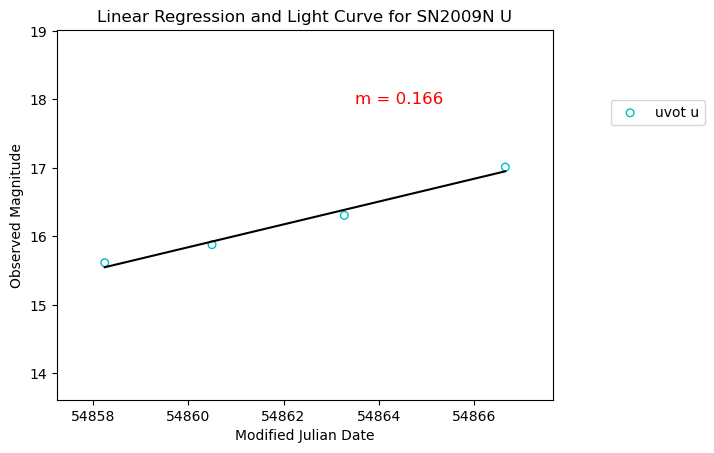

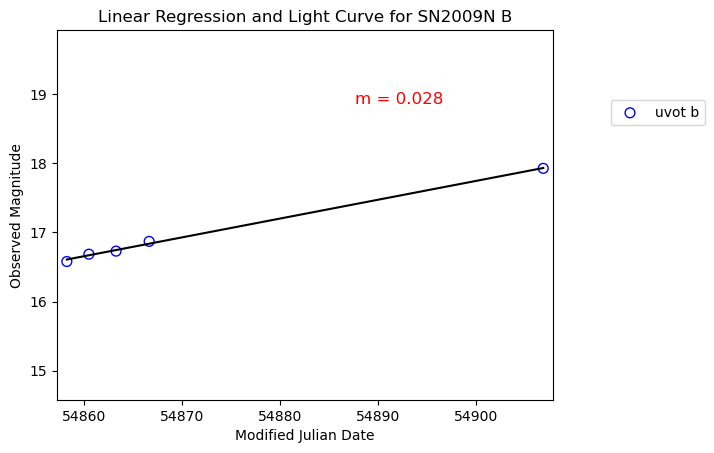

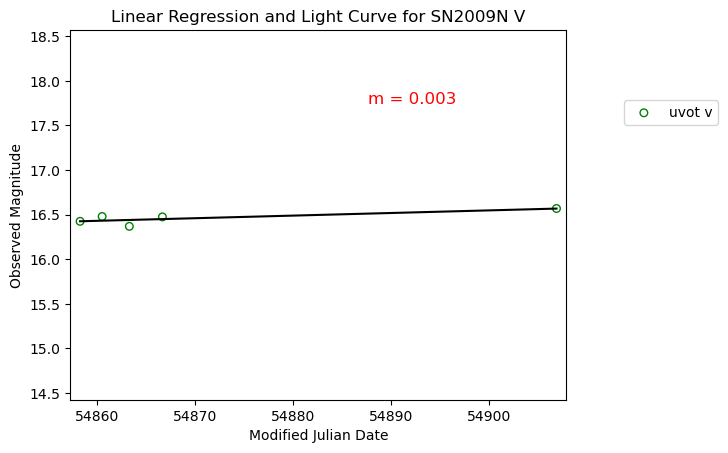

UVW2: 0.505
UVM2: 0.466
UVW1: 0.280
U: 0.166
B: 0.028
V: 0.003
Running fit for SN2013ab.txt...
Trying to open: SN2013ab.txt


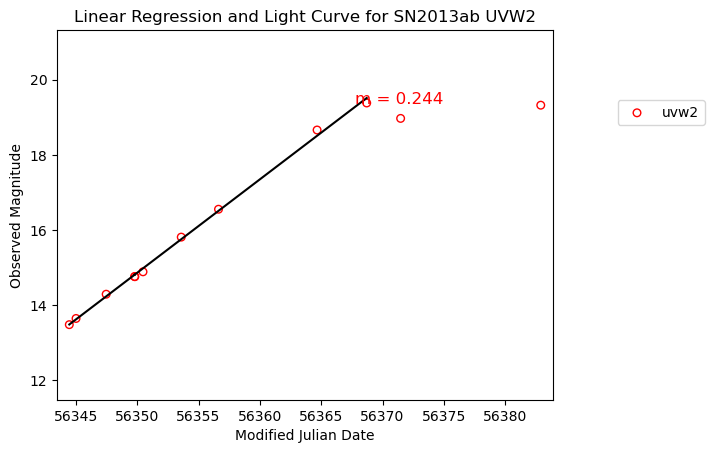

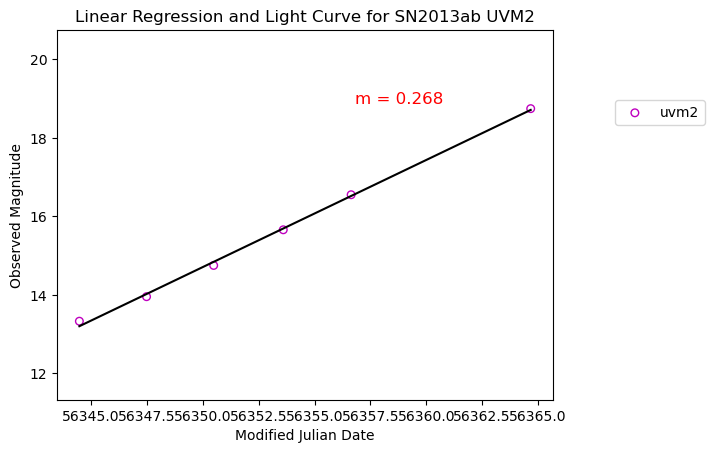

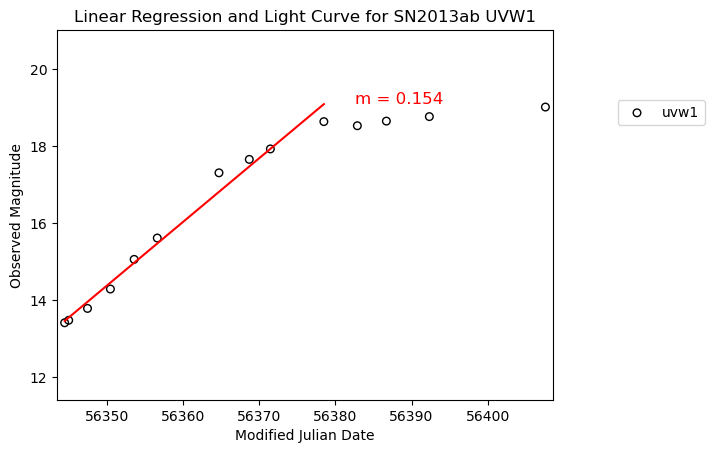

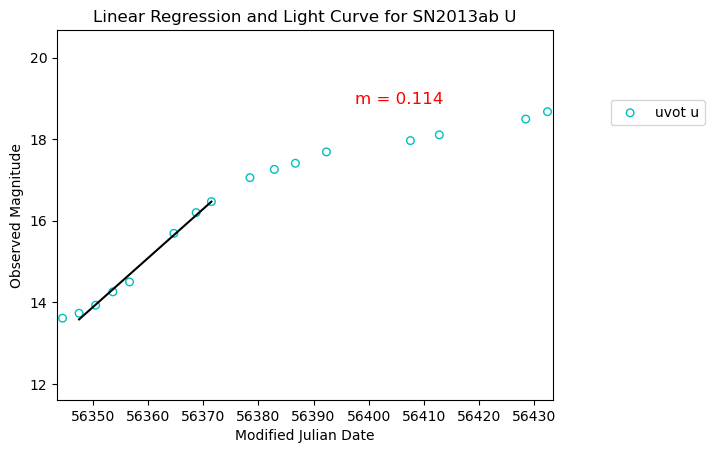

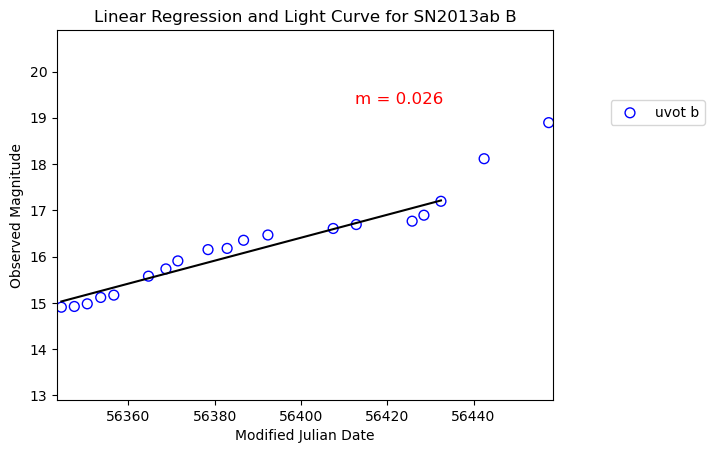

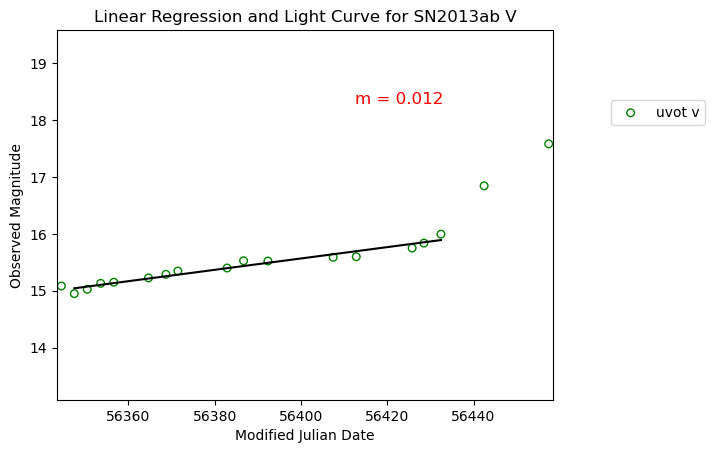

UVW2: 0.244
UVM2: 0.268
UVW1: 0.154
U: 0.114
B: 0.026
V: 0.012
Running fit for SN2016C.txt...
Trying to open: SN2016C.txt


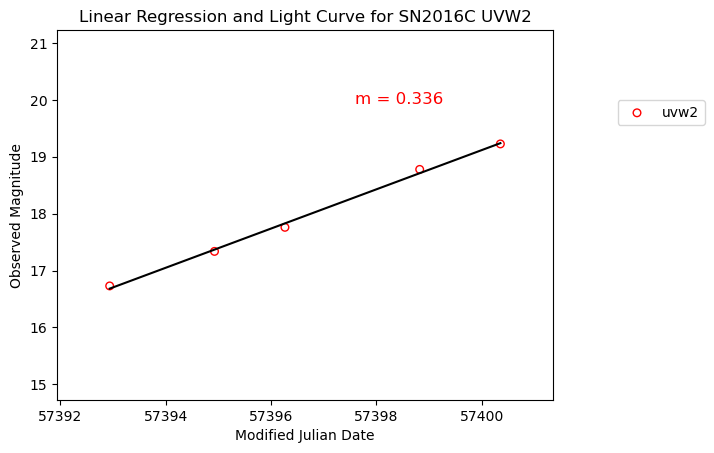

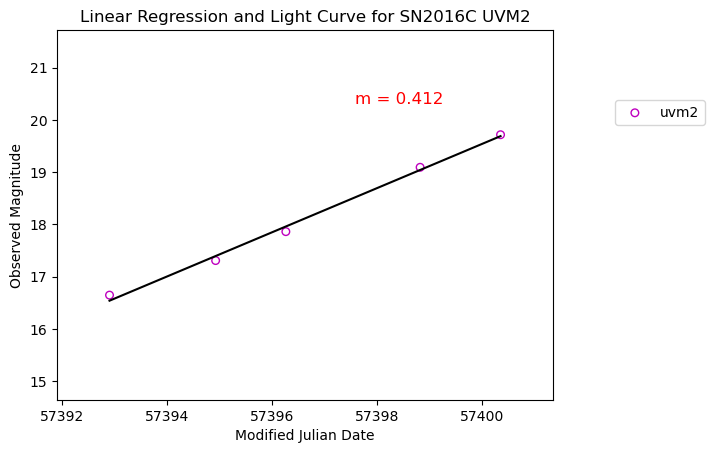

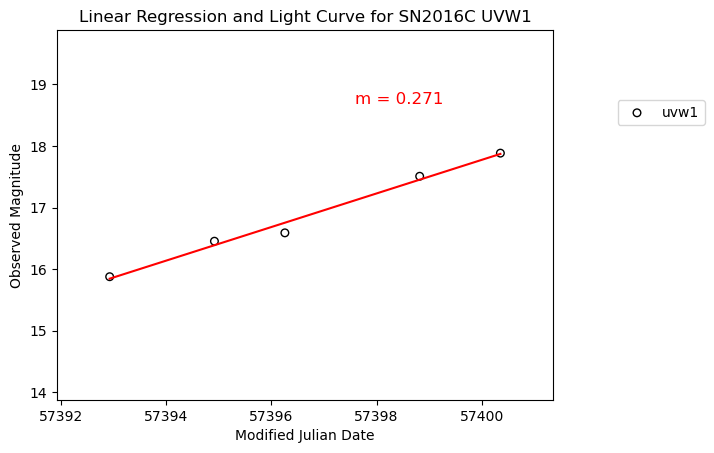

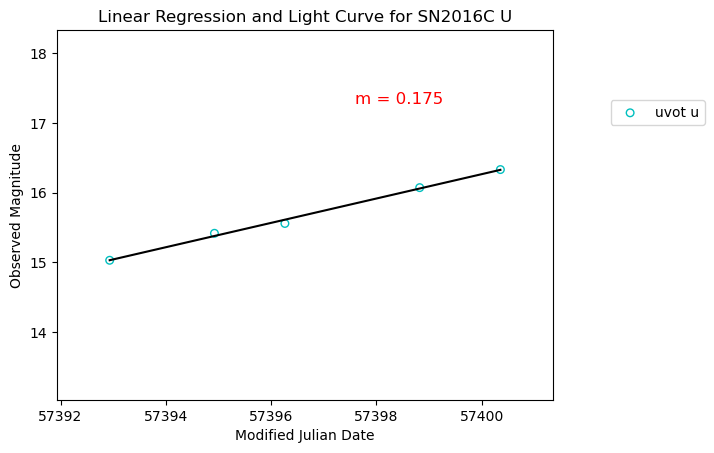

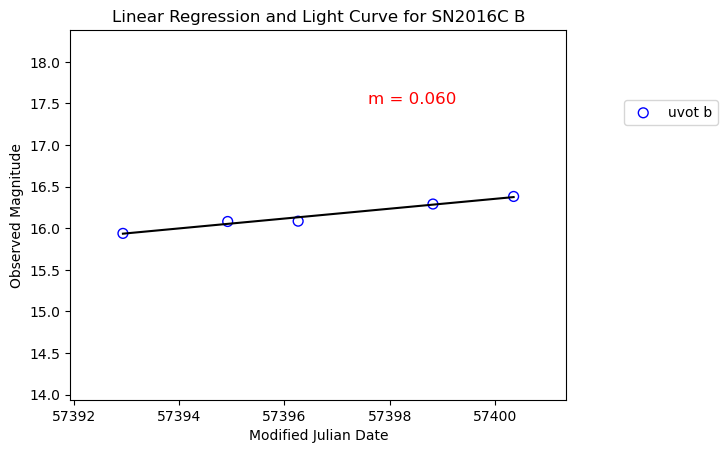

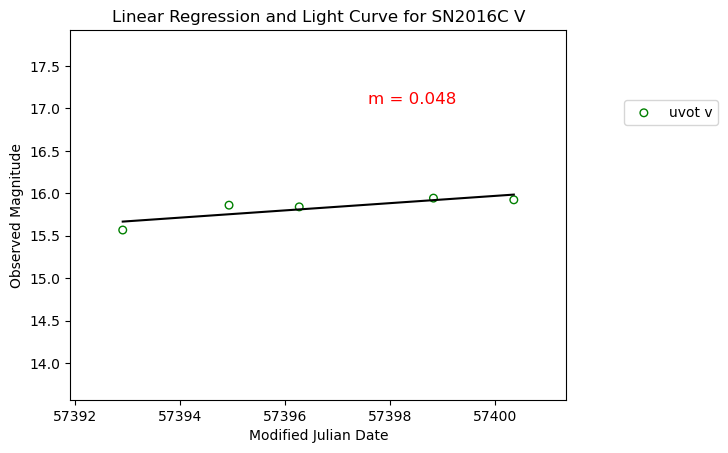

UVW2: 0.336
UVM2: 0.412
UVW1: 0.271
U: 0.175
B: 0.060
V: 0.048
Running fit for SN2016cok.txt...
Trying to open: SN2016cok.txt


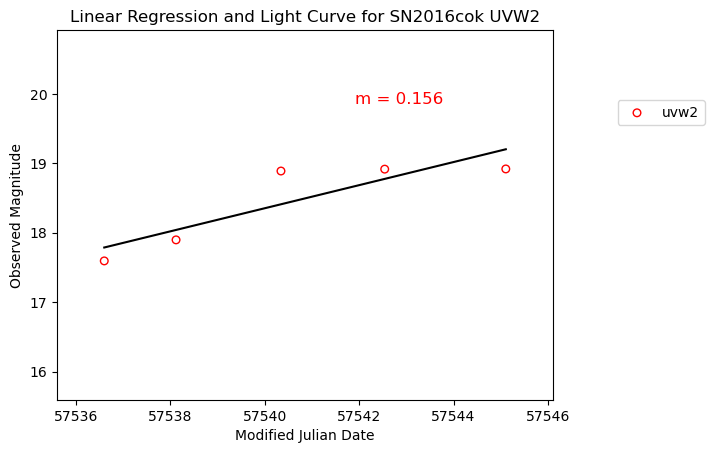

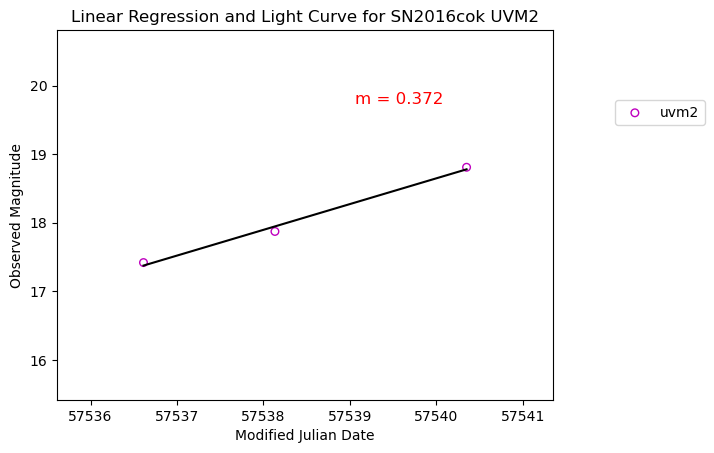

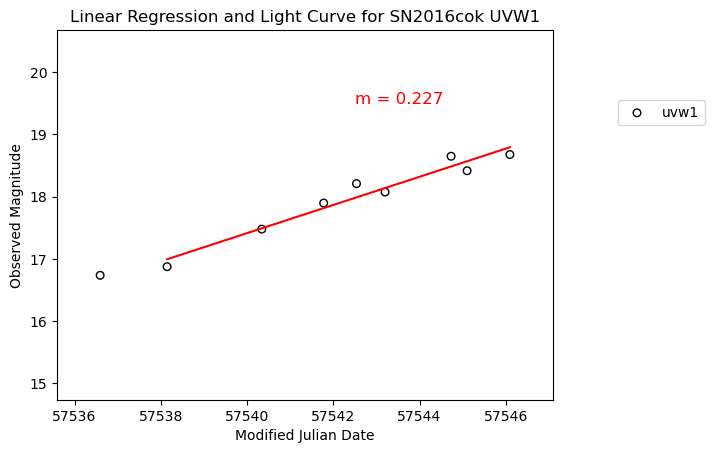

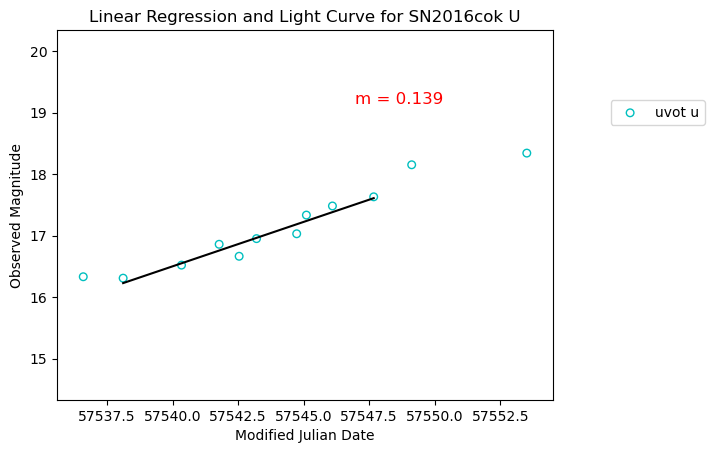

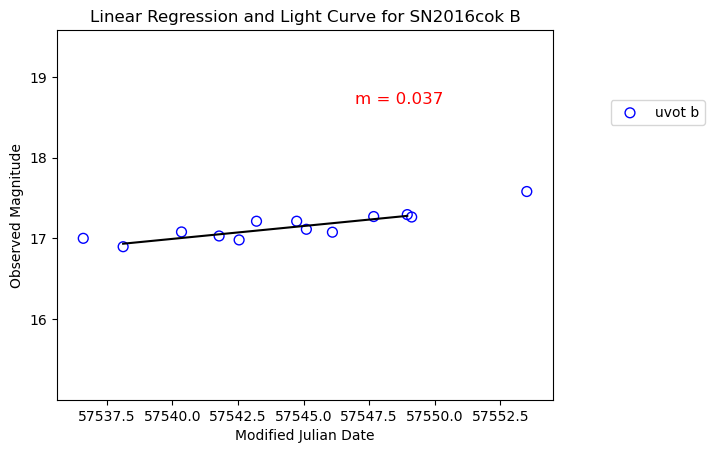

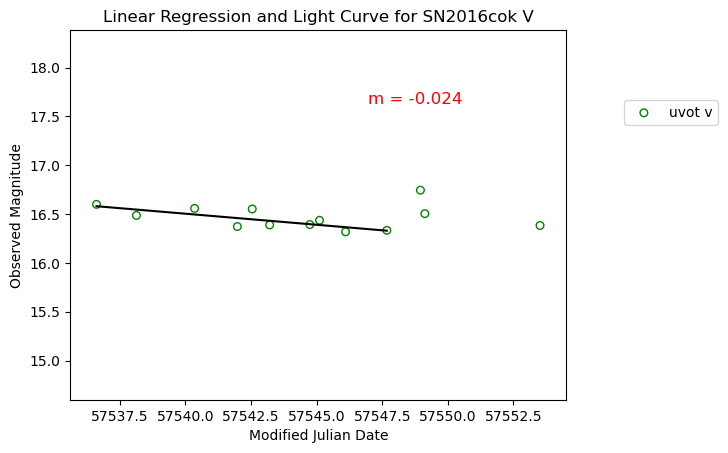

UVW2: 0.156
UVM2: 0.372
UVW1: 0.227
U: 0.139
B: 0.037
V: -0.024
Running fit for SN2016X (Graphs not saved b/c I think this one is a type IIP).txt...
Trying to open: SN2016X (Graphs not saved b/c I think this one is a type IIP).txt
Failed on SN2016X (Graphs not saved b/c I think this one is a type IIP).txt: [Errno 2] No such file or directory: 'SN2016X (Graphs not saved b/c I think this one is a type IIP).txt'


Traceback (most recent call last):
  File "C:\Users\Savannah Stratton\run_from_csv.py", line 29, in run_all_fits
    new_LinearR(
  File "C:\Users\Savannah Stratton\AppData\Local\Temp\ipykernel_7932\3736516747.py", line 5, in new_LinearR
    data = open(file, 'r')
           ^^^^^^^^^^^^^^^
  File "C:\Users\Savannah Stratton\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 324, in _modified_open
    return io_open(file, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
FileNotFoundError: [Errno 2] No such file or directory: 'SN2016X (Graphs not saved b/c I think this one is a type IIP).txt'


In [4]:
run_all_fits(new_LinearR, 'All_SNe_Cleaned.csv')